In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

s = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_1.xlsx')
s.set_index('year_month', inplace=True)
v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)
o = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_7.xlsx')
o.set_index('year_month', inplace=True)

In [3]:
df['Abstraction'] = w['Usage']
df['2526CC00033'] = s[' 2526CC00033']
df['D4N0127'] = s[' D4N0127']
df['D4N0146'] = s[' D4N0146']
df['D4N0147'] = s[' D4N0147']
df['D4N0148'] = s[' D4N0148']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  2526CC00033  D4N0127  \
year_month                                                                
1950-01-01                NaN                 NaN          NaN      NaN   
1950-02-01                NaN                 NaN          NaN      NaN   
1950-03-01                NaN                 NaN          NaN      NaN   
1950-04-01                NaN                 NaN          NaN      NaN   
1950-05-01                NaN                 NaN          NaN      NaN   
...                       ...                 ...          ...      ...   
2019-08-01                NaN                 NaN     14.04337      NaN   
2019-09-01                NaN                 NaN     14.04000      NaN   
2019-10-01                NaN                 NaN          NaN      NaN   
2019-11-01                NaN                 NaN          NaN      NaN   
2019-12-01                NaN                 NaN          NaN      NaN   

            D4N0146  D4N0147  D4N0148  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ...  
2019-08-01      NaN      NaN      NaN  
2019-09-01      NaN  

In [5]:
df = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148','Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

2526CC00033  D4N0127  D4N0146  D4N0147  D4N0148  Temperature  \
year_month                                                                 
1950-01-01          NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01          NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01          NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01          NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01          NaN      NaN      NaN      NaN      NaN        14.60   
...                 ...      ...      ...      ...      ...          ...   
2019-08-01     14.04337      NaN      NaN      NaN      NaN          NaN   
2019-09-01     14.04000      NaN      NaN      NaN      NaN          NaN   
2019-10-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01          NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01          NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 9 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['2526CC00033' ,'D4N0127','D4N0146' ,'D4N0147' ,'D4N0148']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


2526CC00033    D4N0127    D4N0146    D4N0147    D4N0148
0  1977-01-01 1976-09-01 1977-01-01 1977-01-01 1977-01-01
1  2019-09-01 2005-01-01 2011-11-01 2015-06-01 2019-04-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1976-12-01']  
gwls = gwls[gwls.index < '2011-12-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

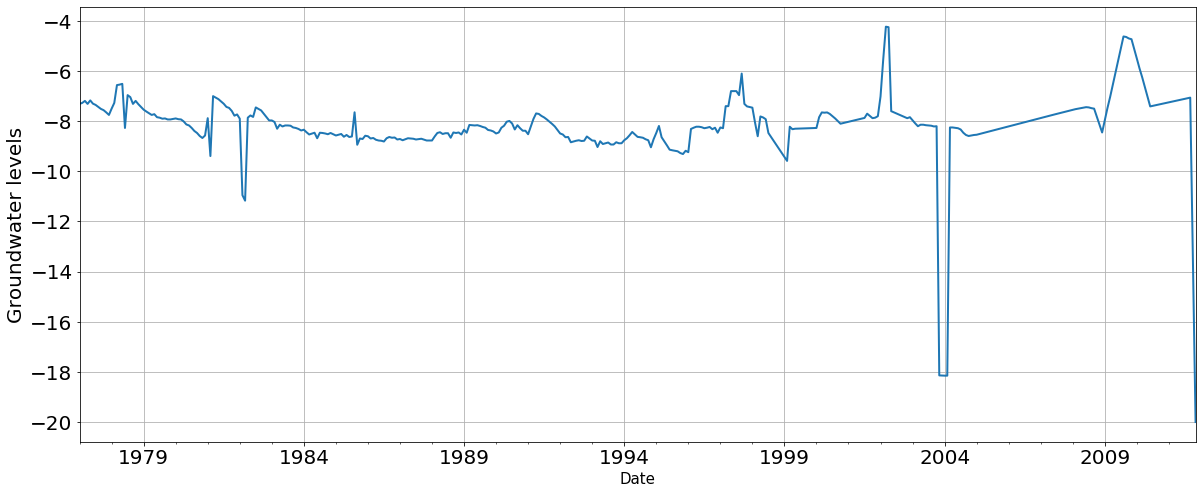

In [10]:
#visual illustration just to show all groundwater levels 

gwls['D4N0146'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [11]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

2526CC00033  D4N0127    D4N0146    D4N0147    D4N0148  \
year_month                                                          
1977-01-01   -13.290000 -24.9005  -7.310000 -18.680000 -31.500000   
1977-02-01   -13.210000 -23.8700  -7.270000 -18.566333 -31.369111   
1977-03-01   -13.110000 -23.6610  -7.190000 -18.463667 -31.250889   
1977-04-01   -13.120000 -23.7100  -7.310000 -18.350000 -31.120000   
1977-05-01   -13.180000 -23.8700  -7.170000 -18.430000 -31.220000   
...                 ...      ...        ...        ...        ...   
2011-07-01   -14.118361      NaN  -7.107484 -18.474918 -33.472787   
2011-08-01   -15.150000      NaN  -7.083742 -18.480000 -33.610000   
2011-09-01   -13.240000      NaN  -7.060000 -18.581639 -32.270000   
2011-10-01   -13.280000      NaN -13.423934 -18.680000 -32.070000   
2011-11-01   -13.370000      NaN -20.000000 -18.790000 -31.820000   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1977-01-01          NaN     49.508333      1.041  4.364772e+05  
1977-02-01        24.40     51.341667      1.092  4.364772e+05  
1977-03-01        20.70     51.983333        NaN  4.364772e+05  
1977-04-01        19.60     48.604167        NaN  4.364772e+05  
1977-05-01          NaN     48.808333      1.406  4.364772e+05  
...                 ...           ...        ...           ...  
2011-07-01         9.40     53.875000      0.669  2.424806e+06  
2011-08-01        12.90     50.033333      0.667  2.424806e+06  
2011-09-01        18.05     49.000000      0.657  2.424806e+06  
2011-10-01        19.30     44.183333      0.644  2.424806e+06  
2011-11-01        21.50     38.333333      0.633  2.424806e+06  

[419 rows x 9 columns]

### Reframing length of dataset based on bhid D4N0834 start and end dates 

In [12]:
pima = gwls.filter(['D4N0146', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1976-12-01']  
pima = pima[pima.index < '2003-05-01'] 

In [13]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0146          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [14]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [15]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0146 Temperature precip_trend  Discharge Abstraction
0 1977-01-01  1977-01-01   1977-01-01 1977-01-01  1977-01-01
1 2003-04-01  2003-04-01   2003-04-01 2003-04-01  2003-04-01

### Mutual information stats

In [16]:
from sklearn.feature_selection import mutual_info_regression

In [17]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0146']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [18]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.048593
precip_trend    0.421089
Discharge       0.841807
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [19]:
precip834  = pima.filter(['D4N0146', 'precip_trend'])
discha834  = pima.filter(['D4N0146', 'Discharge'])
temp834    = pima.filter(['D4N0146', 'Temperature'])
abstr834   = pima.filter(['D4N0146', 'Abstraction'])

In [20]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0834 = precip834.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip834[[ 'precip_trend']].shift(t) for t in lags for col in precip834})
# disharge
discha0834 = discha834.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha834[[ 'Discharge']].shift(t) for t in lags for col in discha834})
# temperature
temp0834 = temp834.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp834[[ 'Temperature']].shift(t) for t in lags for col in temp834})
# abstraction
abstr0834 = abstr834.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr834[[ 'Abstraction']].shift(t) for t in lags for col in abstr834})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

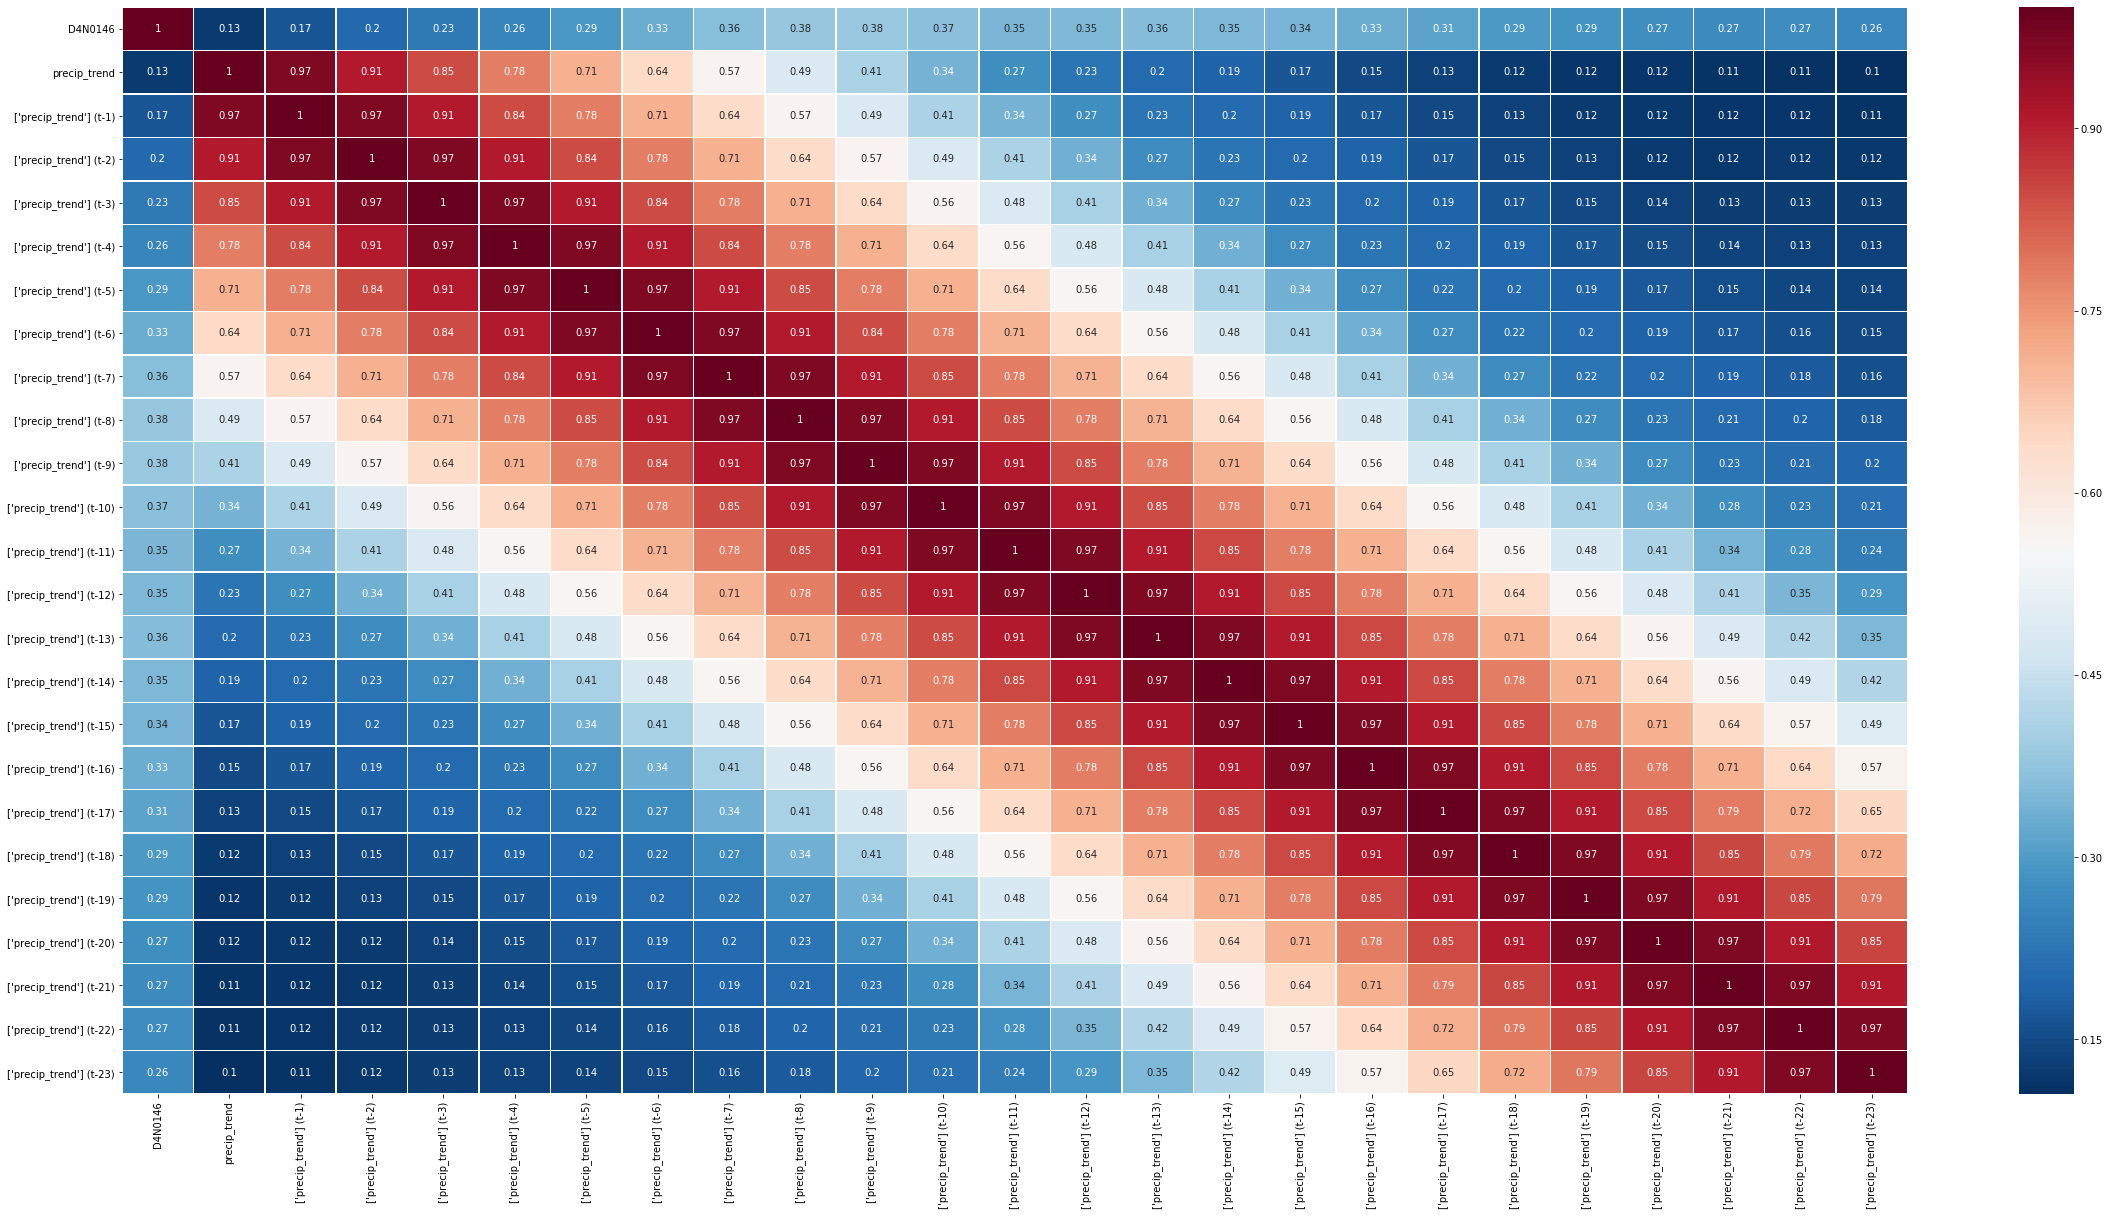

In [21]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0834.corr(method = 'spearman')
corrm2 = precip0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

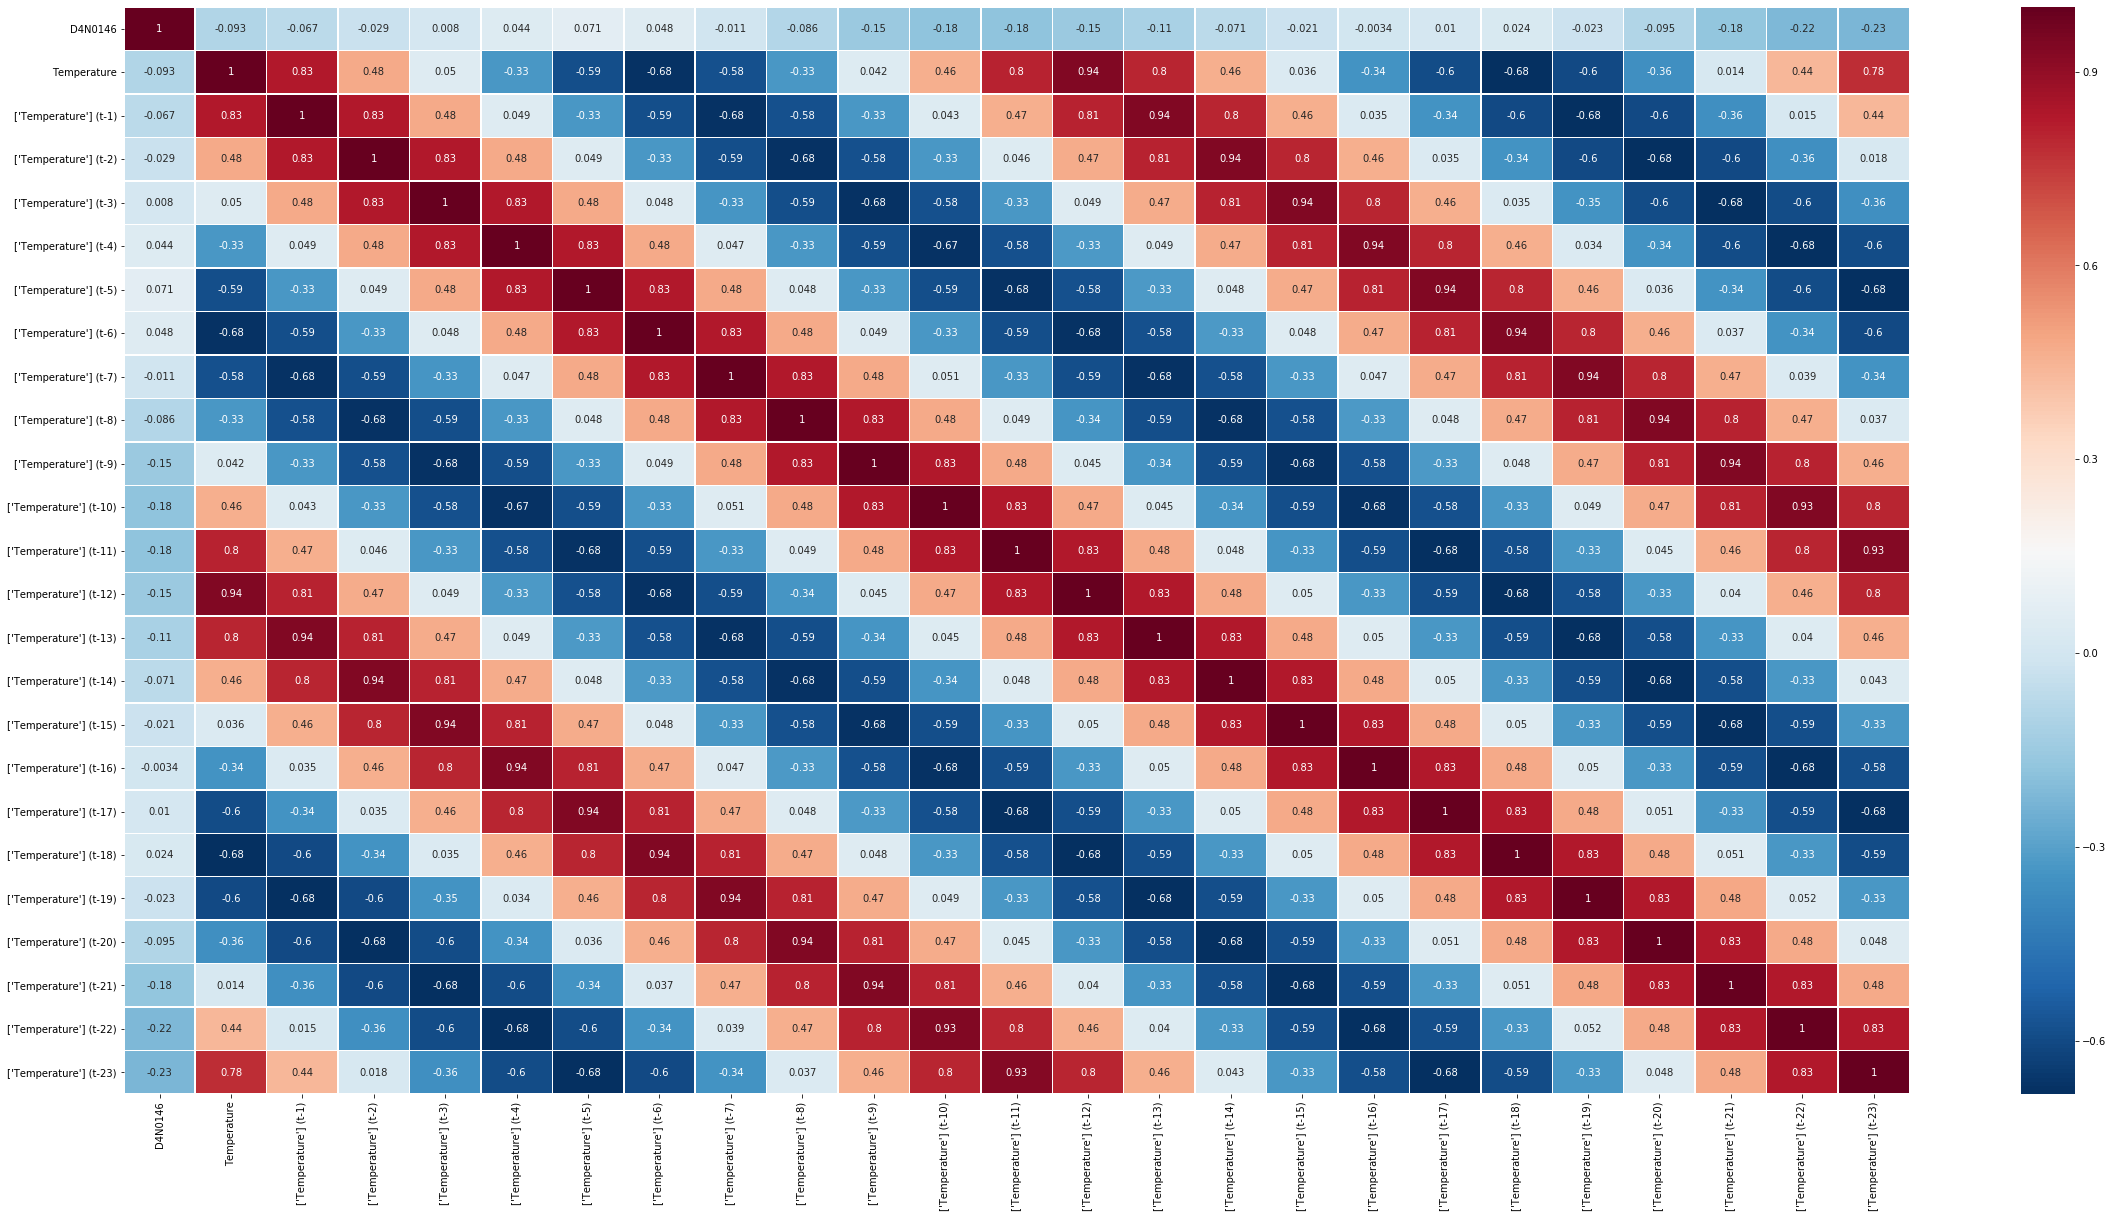

In [22]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0834.corr(method = 'spearman')
corrm2 = temp0834.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [23]:
pima['Temperature (t-5)'] = pima.Temperature.shift(4)
pima['precip_trend (t-16)'] = pima.precip_trend.shift(0)
pima

D4N0146  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                
1977-01-01   -7.310    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01   -7.270    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01   -7.190    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01   -7.310    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01   -7.170    16.231148     48.808333   1.406000  4.364772e+05   
...             ...          ...           ...        ...           ...   
2002-12-01   -7.840    21.150000     32.609964   0.471000  2.568580e+06   
2003-01-01   -7.964    22.650000     32.424909   0.484000  2.735368e+06   
2003-02-01   -8.088    22.650000     32.096558   0.483000  2.735368e+06   
2003-03-01   -8.200    20.750000     33.704891   0.501000  2.735368e+06   
2003-04-01   -8.140    19.500000     37.863225   0.485000  2.735368e+06   

            Temperature (t-5)  precip_trend (t-16)  
year_month                                          
1977-01-01                NaN            49.508333  
1977-02-01                NaN            51.341667  
1977-03-01                NaN            51.983333  
1977-04-01                NaN            48.604167  
1977-05-01              24.40            48.808333  
...                       ...                  ...  
2002-12-01              14.50            32.609964  
2003-01-01              16.50            32.424909  
2003-02-01              20.10            32.096558  
2003-03-01              20.20            33.704891  
2003-04-01              21.15            37.863225  

[316 rows x 7 columns]

In [24]:
X = pima[['Temperature (t-5)', 'precip_trend (t-16)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0146']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [25]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [26]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-5)      0.104984
precip_trend (t-16)    0.415059
Discharge              0.824814
Abstraction            1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
rainfall = X['precip_trend (t-16)']
temperature = X['Temperature (t-5)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0146']

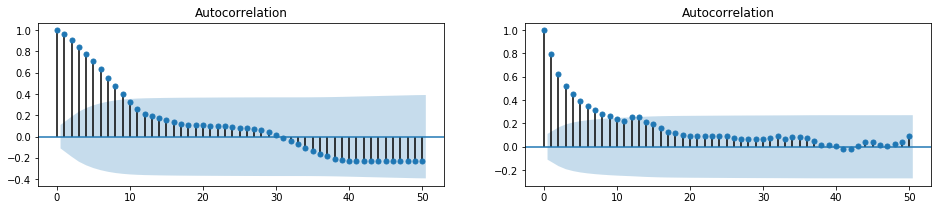

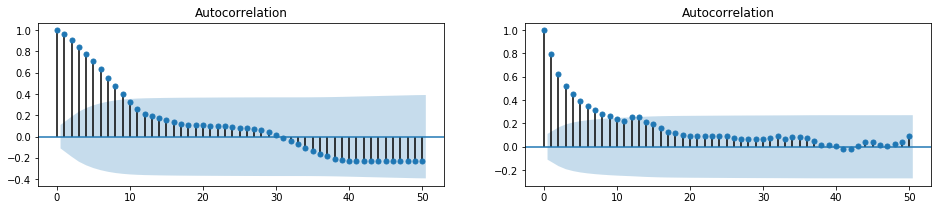

In [29]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

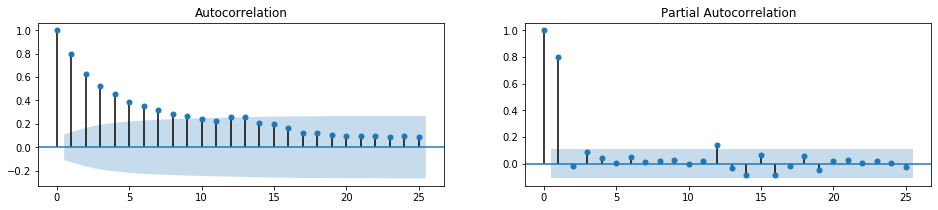

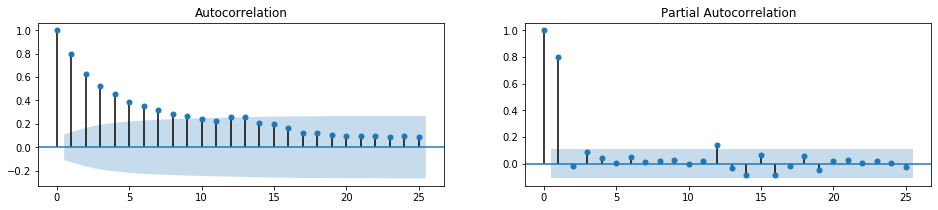

In [30]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

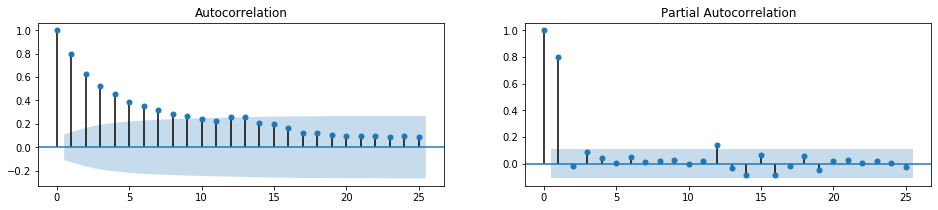

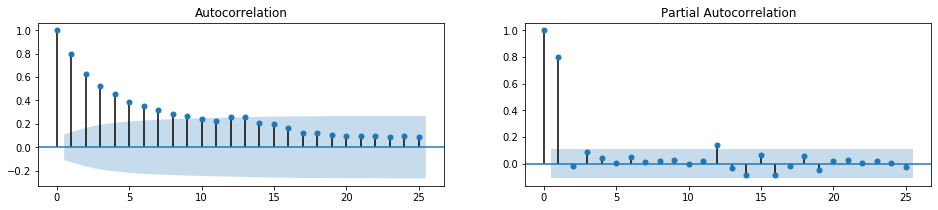

In [31]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

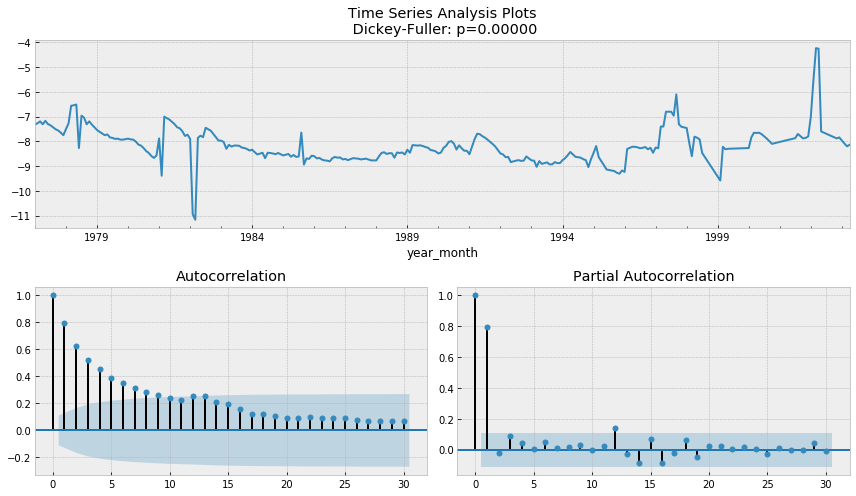

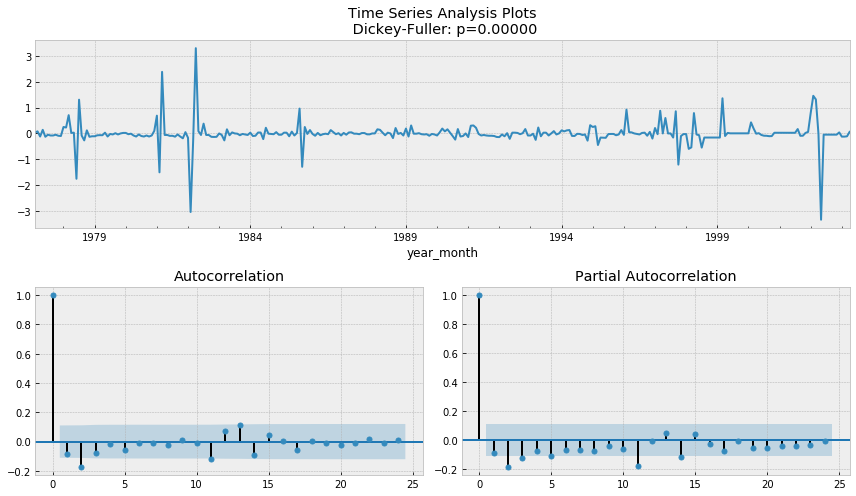

In [32]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0123_diff = bhid - bhid.shift(1)

tsplot(D4N0123_diff[1:], lags=24)

#### Rainfall

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


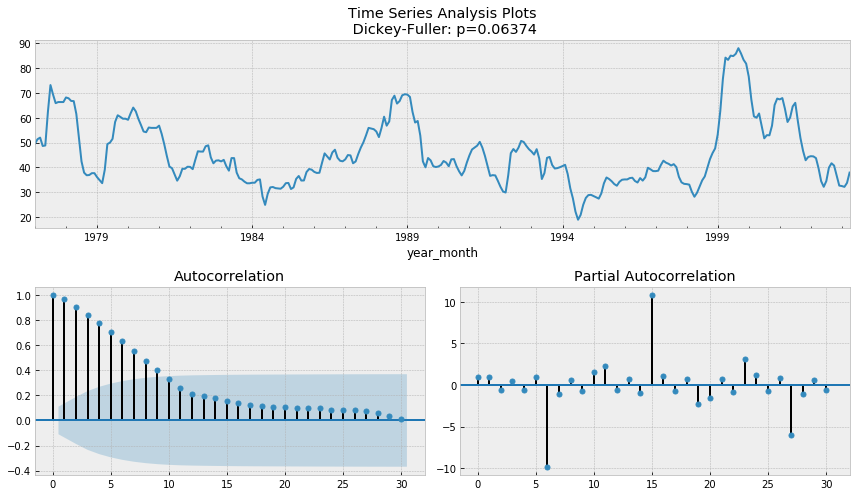

In [33]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

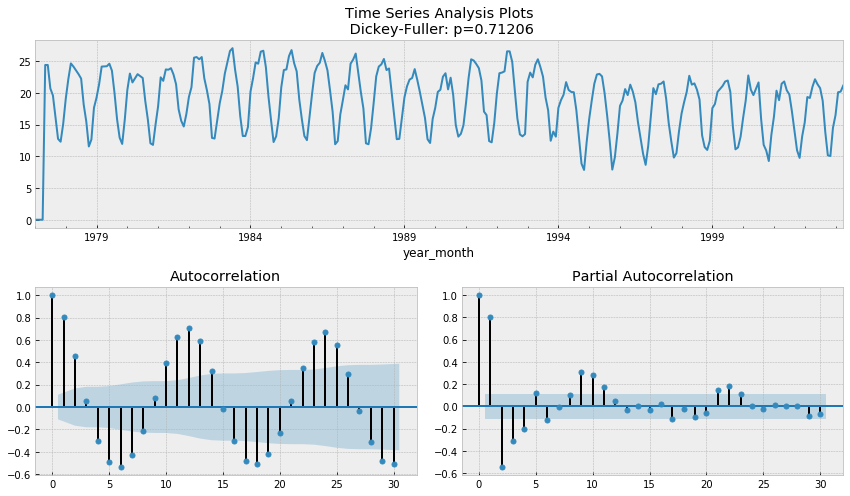

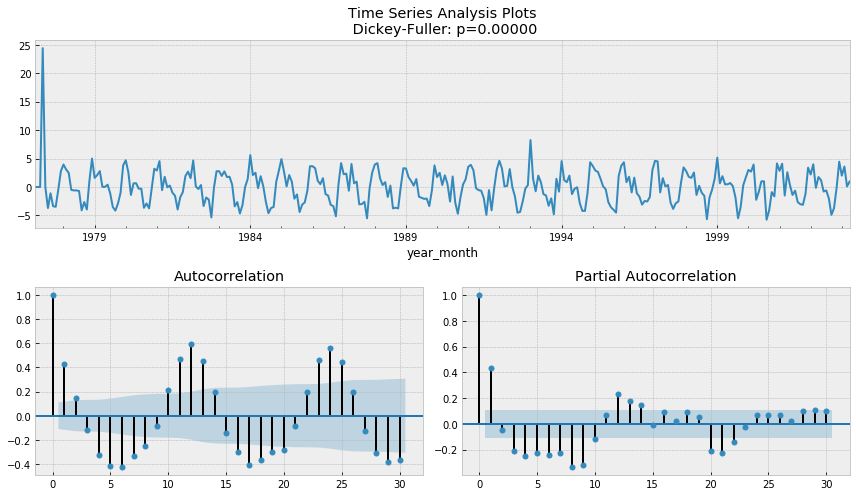

In [34]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

#Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)


tsplot(temp_diff[1:], lags=30)


#### Discharge

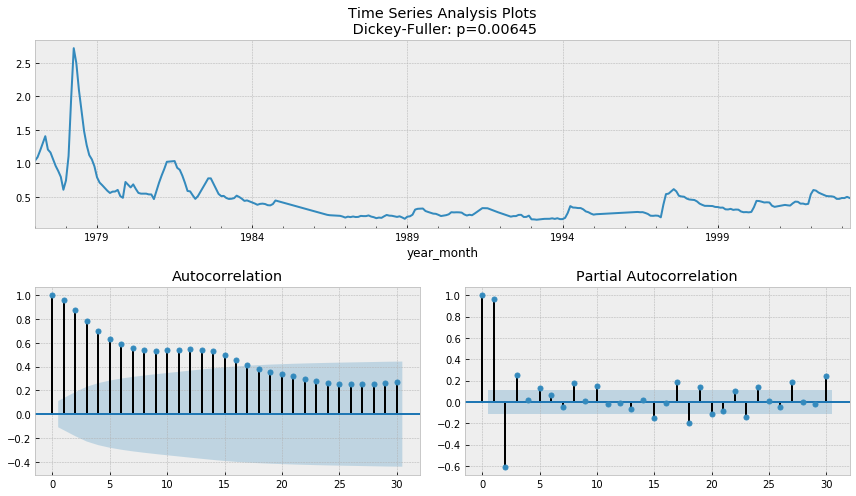

In [35]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

#### Usage

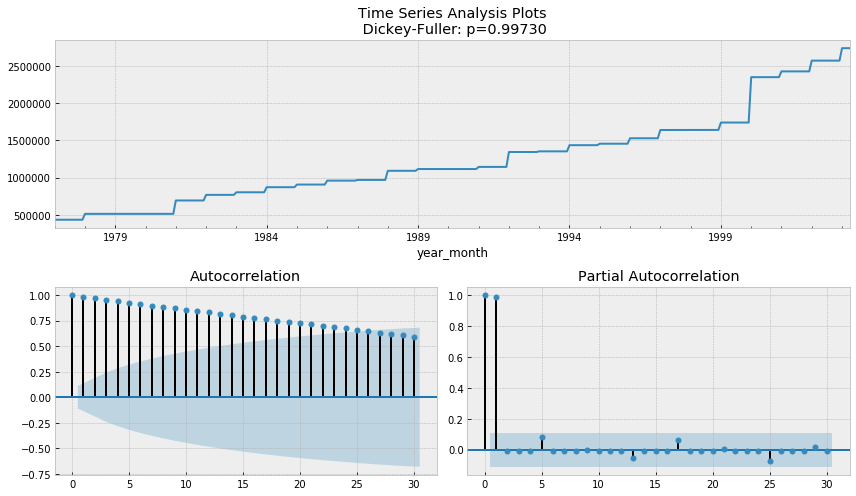

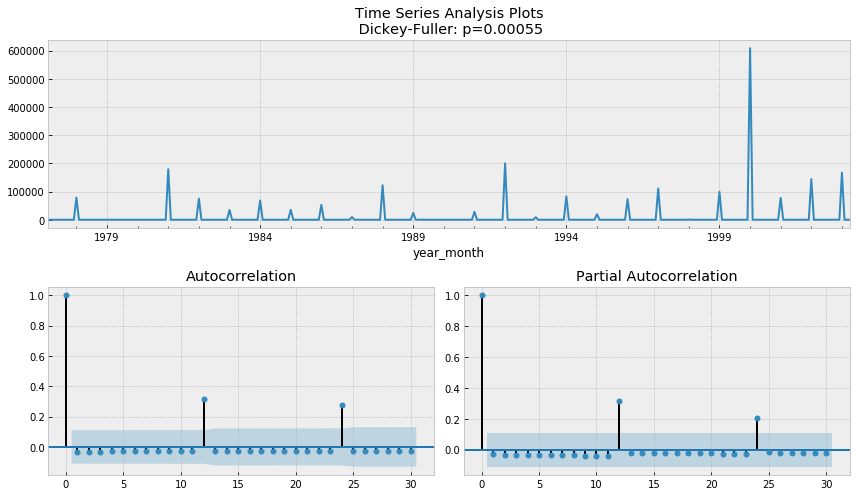

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [37]:
pima_diff = pd.DataFrame({'D4N0123': D4N0123_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': discharge, 'Abstraction': usage_diff}, columns=['D4N0123','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0123           1
Temperature       1
precip_trend    316
Discharge         0
Abstraction       1
dtype: int64

In [38]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

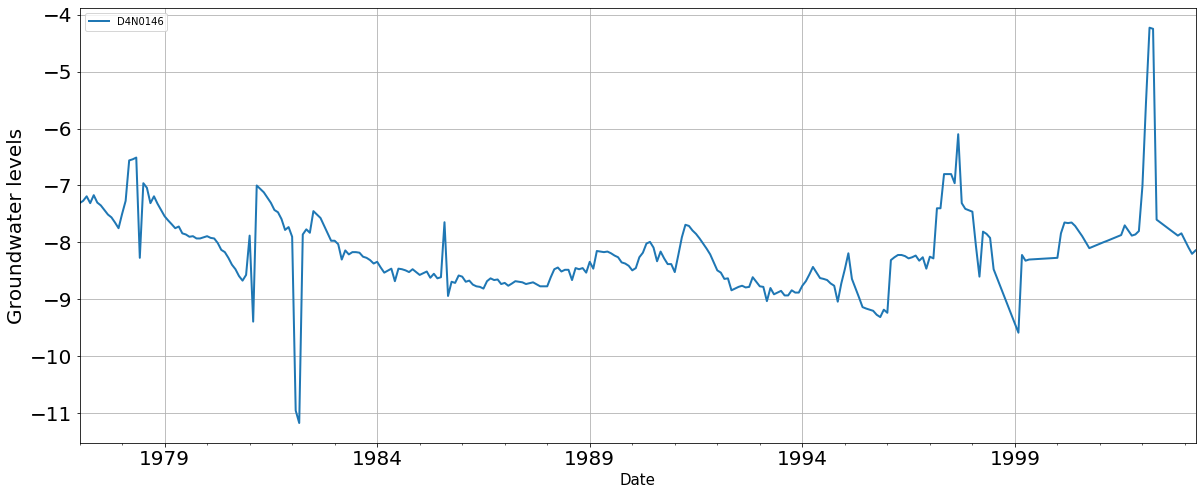

In [39]:
pima[['D4N0146']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [40]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-16)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-5)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [41]:
pima

D4N0146  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                
1977-01-01   -7.310    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01   -7.270    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01   -7.190    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01   -7.310    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01   -7.170    16.231148     48.808333   1.406000  4.364772e+05   
...             ...          ...           ...        ...           ...   
2002-12-01   -7.840    21.150000     32.609964   0.471000  2.568580e+06   
2003-01-01   -7.964    22.650000     32.424909   0.484000  2.735368e+06   
2003-02-01   -8.088    22.650000     32.096558   0.483000  2.735368e+06   
2003-03-01   -8.200    20.750000     33.704891   0.501000  2.735368e+06   
2003-04-01   -8.140    19.500000     37.863225   0.485000  2.735368e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1977-01-01                NaN            49.508333          4.922138   
1977-02-01                NaN            51.341667          4.957793   
1977-03-01                NaN            51.983333          4.969977   
1977-04-01                NaN            48.604167          4.904075   
1977-05-01              24.40            48.808333          4.908182   
...                       ...                  ...               ...   
2002-12-01              14.50            32.609964          4.514823   
2003-01-01              16.50            32.424909          4.509301   
2003-02-01              20.10            32.096558          4.499429   
2003-03-01              20.20            33.704891          4.546881   
2003-04-01              21.15            37.863225          4.660048   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-01-01              NaN       1.713440        13.986494  
1977-02-01              NaN       1.738121        13.986494  
1977-03-01              NaN       1.784261        13.986494  
1977-04-01              NaN       1.832978        13.986494  
1977-05-01         4.234749       1.877966        13.986494  
...                     ...            ...              ...  
2002-12-01         3.740840       1.385942        15.758864  
2003-01-01         3.862201       1.394741        15.821777  
2003-02-01         4.049273       1.394067        15.821777  
2003-03-01         4.054001       1.406132        15.821777  
2003-04-01         4.097837       1.395415        15.821777  

[316 rows x 11 columns]

In [42]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima['D4N0146'].shift(obs)
pima.fillna(0, inplace=True)

In [43]:
pima

D4N0146  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                
1977-01-01   -7.310    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01   -7.270    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01   -7.190    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01   -7.310    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01   -7.170    16.231148     48.808333   1.406000  4.364772e+05   
...             ...          ...           ...        ...           ...   
2002-12-01   -7.840    21.150000     32.609964   0.471000  2.568580e+06   
2003-01-01   -7.964    22.650000     32.424909   0.484000  2.735368e+06   
2003-02-01   -8.088    22.650000     32.096558   0.483000  2.735368e+06   
2003-03-01   -8.200    20.750000     33.704891   0.501000  2.735368e+06   
2003-04-01   -8.140    19.500000     37.863225   0.485000  2.735368e+06   

            Temperature (t-5)  precip_trend (t-16)  precip_trend_log  \
year_month                                                             
1977-01-01               0.00            49.508333          4.922138   
1977-02-01               0.00            51.341667          4.957793   
1977-03-01               0.00            51.983333          4.969977   
1977-04-01               0.00            48.604167          4.904075   
1977-05-01              24.40            48.808333          4.908182   
...                       ...                  ...               ...   
2002-12-01              14.50            32.609964          4.514823   
2003-01-01              16.50            32.424909          4.509301   
2003-02-01              20.10            32.096558          4.499429   
2003-03-01              20.20            33.704891          4.546881   
2003-04-01              21.15            37.863225          4.660048   

            Temperature_log  Discharge_log  Abstraction_log    t_1       t_2  \
year_month                                                                     
1977-01-01         0.000000       1.713440        13.986494  0.000  0.000000   
1977-02-01         0.000000       1.738121        13.986494 -7.310  0.000000   
1977-03-01         0.000000       1.784261        13.986494 -7.270 -7.310000   
1977-04-01         0.000000       1.832978        13.986494 -7.190 -7.270000   
1977-05-01         4.234749       1.877966        13.986494 -7.310 -7.190000   
...                     ...            ...              ...    ...       ...   
2002-12-01         3.740840       1.385942        15.758864 -7.880 -7.832826   
2003-01-01         3.862201       1.394741        15.821777 -7.840 -7.880000   
2003-02-01         4.049273       1.394067        15.821777 -7.964 -7.840000   
2003-03-01         4.054001       1.406132        15.821777 -8.088 -7.964000   
2003-04-01         4.097837       1.395415        15.821777 -8.200 -8.088000   

                 t_3       t_4  
year_month                      
1977-01-01  0.000000  0.000000  
1977-02-01  0.000000  0.000000  
1977-03-01  0.000000  0.000000  
1977-04-01 -7.310000  0.000000  
1977-05-01 -7.270000 -7.310000  
...              ...       ...  
2002-12-01 -7.787174 -7.740000  
2003-01-01 -7.832826 -7.787174  
2003-02-01 -7.880000 -7.832826  
2003-03-01 -7.840000 -7.880000  
2003-04-01 -7.964000 -7.840000  

[316 rows x 15 columns]

In [44]:
pima.shape

(316, 15)

In [45]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0146']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [46]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0146']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.057298
precip_trend_log    0.284475
Discharge_log       0.583577
Abstraction_log     0.671191
t_1                 1.000000
t_2                 0.701253
dtype: float64

In [47]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0146'].values
y = y.reshape(-1,1)

In [48]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(264, 6) (264, 1)
(52, 6) (52, 1)


In [49]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [50]:
y_test[0]

array([-1.77741521])

### LSTM

In [51]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [52]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl = -1.77741521
    test_forecast = X_test
    steps_ahead = 52
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(264, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 264 samples, validate on 52 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.73387, saving model to model.h5
264/264 - 3s - loss: 0.7413 - val_loss: 0.7339
Epoch 2/700

Epoch 00002: val_loss improved from 0.73387 to 0.72848, saving model to model.h5
264/264 - 0s - loss: 0.7137 - val_loss: 0.7285
Epoch 3/700

Epoch 00003: val_loss improved from 0.72848 to 0.72316, saving model to model.h5
264/264 - 0s - loss: 0.6870 - val_loss: 0.7232
Epoch 4/700

Epoch 00004: val_loss improved from 0.72316 to 0.71781, saving model to model.h5
264/264 - 0s - loss: 0.6638 - val_loss: 0.7178
Epoch 5/700

Epoch 00005: val_loss improved from 0.71781 to 0.71305, saving model to model.h5
264/264 - 0s - loss: 0.6412 - val_loss: 0.7131
Epoch 6/700

Epoch

264/264 - 0s - loss: 0.2672 - val_loss: 0.4127
Epoch 54/700

Epoch 00054: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2643 - val_loss: 0.4130
Epoch 55/700

Epoch 00055: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2608 - val_loss: 0.4142
Epoch 56/700

Epoch 00056: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2613 - val_loss: 0.4159
Epoch 57/700

Epoch 00057: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2572 - val_loss: 0.4181
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2623 - val_loss: 0.4213
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2575 - val_loss: 0.4253
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2593 - val_loss: 0.4298
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2556 - val_loss: 0.4343
Epoch 62/700

Epoch 00062: val_loss did not improve from 

Epoch 127/700

Epoch 00127: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2306 - val_loss: 0.4771
Epoch 128/700

Epoch 00128: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2353 - val_loss: 0.4760
Epoch 129/700

Epoch 00129: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2310 - val_loss: 0.4769
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2341 - val_loss: 0.4795
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2288 - val_loss: 0.4805
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2353 - val_loss: 0.4805
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2307 - val_loss: 0.4799
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2276 - val_loss: 0.4796
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.41270
264/264 - 0s - loss: 0.2251 - 

Epoch 37/700

Epoch 00037: val_loss improved from 0.46796 to 0.46066, saving model to model.h5
264/264 - 0s - loss: 0.2932 - val_loss: 0.4607
Epoch 38/700

Epoch 00038: val_loss improved from 0.46066 to 0.45435, saving model to model.h5
264/264 - 0s - loss: 0.2947 - val_loss: 0.4544
Epoch 39/700

Epoch 00039: val_loss improved from 0.45435 to 0.44819, saving model to model.h5
264/264 - 0s - loss: 0.2945 - val_loss: 0.4482
Epoch 40/700

Epoch 00040: val_loss improved from 0.44819 to 0.44200, saving model to model.h5
264/264 - 0s - loss: 0.2916 - val_loss: 0.4420
Epoch 41/700

Epoch 00041: val_loss improved from 0.44200 to 0.43553, saving model to model.h5
264/264 - 0s - loss: 0.2793 - val_loss: 0.4355
Epoch 42/700

Epoch 00042: val_loss improved from 0.43553 to 0.42932, saving model to model.h5
264/264 - 0s - loss: 0.2846 - val_loss: 0.4293
Epoch 43/700

Epoch 00043: val_loss improved from 0.42932 to 0.42408, saving model to model.h5
264/264 - 0s - loss: 0.2815 - val_loss: 0.4241
Epoch 

Epoch 107/700

Epoch 00107: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2324 - val_loss: 0.5179
Epoch 108/700

Epoch 00108: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2375 - val_loss: 0.5174
Epoch 109/700

Epoch 00109: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2374 - val_loss: 0.5165
Epoch 110/700

Epoch 00110: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2332 - val_loss: 0.5158
Epoch 111/700

Epoch 00111: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2325 - val_loss: 0.5150
Epoch 112/700

Epoch 00112: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2275 - val_loss: 0.5151
Epoch 113/700

Epoch 00113: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2334 - val_loss: 0.5151
Epoch 114/700

Epoch 00114: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2354 - val_loss: 0.5156
Epoch 115/700

Epoch 00115: val_loss did not improve from 0.41209
264/264 - 0s - loss: 0.2372 - 


Epoch 00024: val_loss improved from 0.61785 to 0.60951, saving model to model.h5
264/264 - 0s - loss: 0.3289 - val_loss: 0.6095
Epoch 25/700

Epoch 00025: val_loss improved from 0.60951 to 0.60159, saving model to model.h5
264/264 - 0s - loss: 0.3238 - val_loss: 0.6016
Epoch 26/700

Epoch 00026: val_loss improved from 0.60159 to 0.59278, saving model to model.h5
264/264 - 0s - loss: 0.3171 - val_loss: 0.5928
Epoch 27/700

Epoch 00027: val_loss improved from 0.59278 to 0.58252, saving model to model.h5
264/264 - 0s - loss: 0.3163 - val_loss: 0.5825
Epoch 28/700

Epoch 00028: val_loss improved from 0.58252 to 0.57136, saving model to model.h5
264/264 - 0s - loss: 0.3130 - val_loss: 0.5714
Epoch 29/700

Epoch 00029: val_loss improved from 0.57136 to 0.56062, saving model to model.h5
264/264 - 0s - loss: 0.3076 - val_loss: 0.5606
Epoch 30/700

Epoch 00030: val_loss improved from 0.56062 to 0.54992, saving model to model.h5
264/264 - 0s - loss: 0.3091 - val_loss: 0.5499
Epoch 31/700

Epoch

Epoch 90/700

Epoch 00090: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2392 - val_loss: 0.5103
Epoch 91/700

Epoch 00091: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2387 - val_loss: 0.5099
Epoch 92/700

Epoch 00092: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2411 - val_loss: 0.5094
Epoch 93/700

Epoch 00093: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2363 - val_loss: 0.5095
Epoch 94/700

Epoch 00094: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2370 - val_loss: 0.5089
Epoch 95/700

Epoch 00095: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2357 - val_loss: 0.5088
Epoch 96/700

Epoch 00096: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2381 - val_loss: 0.5102
Epoch 97/700

Epoch 00097: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2395 - val_loss: 0.5104
Epoch 98/700

Epoch 00098: val_loss did not improve from 0.40754
264/264 - 0s - loss: 0.2397 - val_loss:

264/264 - 0s - loss: 0.5632 - val_loss: 0.6522
Epoch 10/700

Epoch 00010: val_loss improved from 0.65218 to 0.64701, saving model to model.h5
264/264 - 0s - loss: 0.5459 - val_loss: 0.6470
Epoch 11/700

Epoch 00011: val_loss improved from 0.64701 to 0.64144, saving model to model.h5
264/264 - 0s - loss: 0.5261 - val_loss: 0.6414
Epoch 12/700

Epoch 00012: val_loss improved from 0.64144 to 0.63544, saving model to model.h5
264/264 - 0s - loss: 0.5088 - val_loss: 0.6354
Epoch 13/700

Epoch 00013: val_loss improved from 0.63544 to 0.62899, saving model to model.h5
264/264 - 0s - loss: 0.4936 - val_loss: 0.6290
Epoch 14/700

Epoch 00014: val_loss improved from 0.62899 to 0.62202, saving model to model.h5
264/264 - 0s - loss: 0.4696 - val_loss: 0.6220
Epoch 15/700

Epoch 00015: val_loss improved from 0.62202 to 0.61481, saving model to model.h5
264/264 - 0s - loss: 0.4531 - val_loss: 0.6148
Epoch 16/700

Epoch 00016: val_loss improved from 0.61481 to 0.60774, saving model to model.h5
264/26

Epoch 73/700

Epoch 00073: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2496 - val_loss: 0.5155
Epoch 74/700

Epoch 00074: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2551 - val_loss: 0.5193
Epoch 75/700

Epoch 00075: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2519 - val_loss: 0.5222
Epoch 76/700

Epoch 00076: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2495 - val_loss: 0.5241
Epoch 77/700

Epoch 00077: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2491 - val_loss: 0.5250
Epoch 78/700

Epoch 00078: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2500 - val_loss: 0.5259
Epoch 79/700

Epoch 00079: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2416 - val_loss: 0.5263
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2470 - val_loss: 0.5269
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2418 - val_loss:

Epoch 146/700

Epoch 00146: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2298 - val_loss: 0.5058
Epoch 147/700

Epoch 00147: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2248 - val_loss: 0.5073
Epoch 148/700

Epoch 00148: val_loss did not improve from 0.41719
264/264 - 0s - loss: 0.2276 - val_loss: 0.5057
Running fold 5
(264, 6)
Train on 264 samples, validate on 52 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.67288, saving model to model.h5
264/264 - 5s - loss: 0.6768 - val_loss: 0.6729
Epoch 2/700

Epoch 00002: val_loss improved from 0.67288 to 0.66822, saving model to model.h5
264/264 - 0s - loss: 0.6449 - val_loss: 0.6682
Epoch 3/700

Epoch 00003: val_loss improved from 0.66822 to 0.66378, saving model to model.h5
264/264 - 0s - loss: 0.6204 - val_loss: 0.6638
Epoch 4/700

Epoch 00004: val_loss improved from 0.66378 to 0.65965, saving model to model.h5
264/264 - 0s - loss: 0.5930 - val_loss: 0.6596
Epoch 5/700

Epoch 00005: val_lo

Epoch 58/700

Epoch 00058: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2553 - val_loss: 0.4502
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2559 - val_loss: 0.4549
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2513 - val_loss: 0.4602
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2583 - val_loss: 0.4651
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2560 - val_loss: 0.4697
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2552 - val_loss: 0.4740
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2553 - val_loss: 0.4775
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2532 - val_loss: 0.4809
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2514 - val_loss:

Epoch 131/700

Epoch 00131: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2341 - val_loss: 0.5144
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2320 - val_loss: 0.5145
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2332 - val_loss: 0.5143
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2343 - val_loss: 0.5145
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2288 - val_loss: 0.5152
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2255 - val_loss: 0.5151
Epoch 137/700

Epoch 00137: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2294 - val_loss: 0.5160
Epoch 138/700

Epoch 00138: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2307 - val_loss: 0.5163
Epoch 139/700

Epoch 00139: val_loss did not improve from 0.41078
264/264 - 0s - loss: 0.2366 - 

Epoch 44/700

Epoch 00044: val_loss improved from 0.42629 to 0.42381, saving model to model.h5
264/264 - 0s - loss: 0.2845 - val_loss: 0.4238
Epoch 45/700

Epoch 00045: val_loss improved from 0.42381 to 0.42202, saving model to model.h5
264/264 - 0s - loss: 0.2814 - val_loss: 0.4220
Epoch 46/700

Epoch 00046: val_loss improved from 0.42202 to 0.42153, saving model to model.h5
264/264 - 0s - loss: 0.2788 - val_loss: 0.4215
Epoch 47/700

Epoch 00047: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2792 - val_loss: 0.4216
Epoch 48/700

Epoch 00048: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2806 - val_loss: 0.4224
Epoch 49/700

Epoch 00049: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2745 - val_loss: 0.4237
Epoch 50/700

Epoch 00050: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2747 - val_loss: 0.4256
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2765 - val_loss: 0.4278
Epoch 52/700



Epoch 117/700

Epoch 00117: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2383 - val_loss: 0.5277
Epoch 118/700

Epoch 00118: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2416 - val_loss: 0.5269
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2417 - val_loss: 0.5270
Epoch 120/700

Epoch 00120: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2392 - val_loss: 0.5272
Epoch 121/700

Epoch 00121: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2343 - val_loss: 0.5273
Epoch 122/700

Epoch 00122: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2376 - val_loss: 0.5280
Epoch 123/700

Epoch 00123: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2361 - val_loss: 0.5275
Epoch 124/700

Epoch 00124: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2374 - val_loss: 0.5269
Epoch 125/700

Epoch 00125: val_loss did not improve from 0.42153
264/264 - 0s - loss: 0.2328 - 

264/264 - 0s - loss: 0.2940 - val_loss: 0.4698
Epoch 35/700

Epoch 00035: val_loss improved from 0.46985 to 0.46180, saving model to model.h5
264/264 - 0s - loss: 0.2853 - val_loss: 0.4618
Epoch 36/700

Epoch 00036: val_loss improved from 0.46180 to 0.45410, saving model to model.h5
264/264 - 0s - loss: 0.2857 - val_loss: 0.4541
Epoch 37/700

Epoch 00037: val_loss improved from 0.45410 to 0.44671, saving model to model.h5
264/264 - 0s - loss: 0.2874 - val_loss: 0.4467
Epoch 38/700

Epoch 00038: val_loss improved from 0.44671 to 0.44015, saving model to model.h5
264/264 - 0s - loss: 0.2822 - val_loss: 0.4402
Epoch 39/700

Epoch 00039: val_loss improved from 0.44015 to 0.43376, saving model to model.h5
264/264 - 0s - loss: 0.2789 - val_loss: 0.4338
Epoch 40/700

Epoch 00040: val_loss improved from 0.43376 to 0.42777, saving model to model.h5
264/264 - 0s - loss: 0.2778 - val_loss: 0.4278
Epoch 41/700

Epoch 00041: val_loss improved from 0.42777 to 0.42172, saving model to model.h5
264/26

Epoch 104/700

Epoch 00104: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2366 - val_loss: 0.4954
Epoch 105/700

Epoch 00105: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2389 - val_loss: 0.4936
Epoch 106/700

Epoch 00106: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2319 - val_loss: 0.4925
Epoch 107/700

Epoch 00107: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2411 - val_loss: 0.4916
Epoch 108/700

Epoch 00108: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2384 - val_loss: 0.4902
Epoch 109/700

Epoch 00109: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2360 - val_loss: 0.4897
Epoch 110/700

Epoch 00110: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2341 - val_loss: 0.4887
Epoch 111/700

Epoch 00111: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2329 - val_loss: 0.4883
Epoch 112/700

Epoch 00112: val_loss did not improve from 0.40214
264/264 - 0s - loss: 0.2345 - 

Epoch 22/700

Epoch 00022: val_loss improved from 0.56447 to 0.55696, saving model to model.h5
264/264 - 0s - loss: 0.3174 - val_loss: 0.5570
Epoch 23/700

Epoch 00023: val_loss improved from 0.55696 to 0.54960, saving model to model.h5
264/264 - 0s - loss: 0.3145 - val_loss: 0.5496
Epoch 24/700

Epoch 00024: val_loss improved from 0.54960 to 0.54195, saving model to model.h5
264/264 - 0s - loss: 0.3088 - val_loss: 0.5419
Epoch 25/700

Epoch 00025: val_loss improved from 0.54195 to 0.53412, saving model to model.h5
264/264 - 0s - loss: 0.3032 - val_loss: 0.5341
Epoch 26/700

Epoch 00026: val_loss improved from 0.53412 to 0.52615, saving model to model.h5
264/264 - 0s - loss: 0.3005 - val_loss: 0.5262
Epoch 27/700

Epoch 00027: val_loss improved from 0.52615 to 0.51729, saving model to model.h5
264/264 - 0s - loss: 0.3066 - val_loss: 0.5173
Epoch 28/700

Epoch 00028: val_loss improved from 0.51729 to 0.50810, saving model to model.h5
264/264 - 0s - loss: 0.2960 - val_loss: 0.5081
Epoch 

Epoch 89/700

Epoch 00089: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2399 - val_loss: 0.5099
Epoch 90/700

Epoch 00090: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2417 - val_loss: 0.5066
Epoch 91/700

Epoch 00091: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2453 - val_loss: 0.5041
Epoch 92/700

Epoch 00092: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2440 - val_loss: 0.5014
Epoch 93/700

Epoch 00093: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2404 - val_loss: 0.5008
Epoch 94/700

Epoch 00094: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2355 - val_loss: 0.5006
Epoch 95/700

Epoch 00095: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2386 - val_loss: 0.5012
Epoch 96/700

Epoch 00096: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2417 - val_loss: 0.5027
Epoch 97/700

Epoch 00097: val_loss did not improve from 0.41324
264/264 - 0s - loss: 0.2352 - val_loss:

Epoch 14/700

Epoch 00014: val_loss improved from 0.60630 to 0.60304, saving model to model.h5
264/264 - 0s - loss: 0.4510 - val_loss: 0.6030
Epoch 15/700

Epoch 00015: val_loss improved from 0.60304 to 0.59963, saving model to model.h5
264/264 - 0s - loss: 0.4301 - val_loss: 0.5996
Epoch 16/700

Epoch 00016: val_loss improved from 0.59963 to 0.59600, saving model to model.h5
264/264 - 0s - loss: 0.4104 - val_loss: 0.5960
Epoch 17/700

Epoch 00017: val_loss improved from 0.59600 to 0.59253, saving model to model.h5
264/264 - 0s - loss: 0.3950 - val_loss: 0.5925
Epoch 18/700

Epoch 00018: val_loss improved from 0.59253 to 0.58879, saving model to model.h5
264/264 - 0s - loss: 0.3768 - val_loss: 0.5888
Epoch 19/700

Epoch 00019: val_loss improved from 0.58879 to 0.58498, saving model to model.h5
264/264 - 0s - loss: 0.3611 - val_loss: 0.5850
Epoch 20/700

Epoch 00020: val_loss improved from 0.58498 to 0.58216, saving model to model.h5
264/264 - 0s - loss: 0.3412 - val_loss: 0.5822
Epoch 

Epoch 77/700

Epoch 00077: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2532 - val_loss: 0.4852
Epoch 78/700

Epoch 00078: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2455 - val_loss: 0.4862
Epoch 79/700

Epoch 00079: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2493 - val_loss: 0.4874
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2415 - val_loss: 0.4883
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2433 - val_loss: 0.4892
Epoch 82/700

Epoch 00082: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2441 - val_loss: 0.4897
Epoch 83/700

Epoch 00083: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2429 - val_loss: 0.4903
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2470 - val_loss: 0.4904
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2425 - val_loss:

Epoch 150/700

Epoch 00150: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2313 - val_loss: 0.4939
Epoch 151/700

Epoch 00151: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2301 - val_loss: 0.4947
Epoch 152/700

Epoch 00152: val_loss did not improve from 0.40602
264/264 - 0s - loss: 0.2273 - val_loss: 0.4942
Running fold 10
(264, 6)
Train on 264 samples, validate on 52 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.75955, saving model to model.h5
264/264 - 6s - loss: 0.6680 - val_loss: 0.7596
Epoch 2/700

Epoch 00002: val_loss improved from 0.75955 to 0.75699, saving model to model.h5
264/264 - 0s - loss: 0.6432 - val_loss: 0.7570
Epoch 3/700

Epoch 00003: val_loss improved from 0.75699 to 0.75412, saving model to model.h5
264/264 - 0s - loss: 0.6205 - val_loss: 0.7541
Epoch 4/700

Epoch 00004: val_loss improved from 0.75412 to 0.75075, saving model to model.h5
264/264 - 0s - loss: 0.5981 - val_loss: 0.7507
Epoch 5/700

Epoch 00005: val_l

Epoch 56/700

Epoch 00056: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2587 - val_loss: 0.4052
Epoch 57/700

Epoch 00057: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2591 - val_loss: 0.4063
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2572 - val_loss: 0.4083
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2572 - val_loss: 0.4124
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2512 - val_loss: 0.4175
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2559 - val_loss: 0.4229
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2556 - val_loss: 0.4280
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2470 - val_loss: 0.4333
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2464 - val_loss:

Epoch 129/700

Epoch 00129: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2314 - val_loss: 0.4904
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2315 - val_loss: 0.4914
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2319 - val_loss: 0.4901
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2320 - val_loss: 0.4889
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2283 - val_loss: 0.4891
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2246 - val_loss: 0.4901
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2237 - val_loss: 0.4926
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2265 - val_loss: 0.4917
Epoch 137/700

Epoch 00137: val_loss did not improve from 0.40505
264/264 - 0s - loss: 0.2287 - 

In [53]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.683      0.827    0.566     0.521
1   Iteration_2     0.723      0.850    0.541     0.552
2   Iteration_3     0.689      0.830    0.563     0.552
3   Iteration_4     0.717      0.847    0.544     0.574
4   Iteration_5     0.725      0.852    0.540     0.585
5   Iteration_6     0.778      0.882    0.506     0.616
6   Iteration_7     0.692      0.832    0.560     0.543
7   Iteration_8     0.737      0.858    0.532     0.597
8   Iteration_9     0.718      0.848    0.544     0.564
9  Iteration_10     0.692      0.832    0.561     0.552

In [54]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values

In [55]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[264:316, 6].values


In [56]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:264]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[264:316]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.251
Root mean squared error is: 0.501
Mean absolute error is: 0.217
R^2 score is:  0.696

The model performance for the test set
--------------------------------------
R^2 score is:  0.546
Mean squared error is: 0.715
Root mean squared error is: 0.846
Mean absolute error is: 0.566
Stdv    0.018
dtype: float32


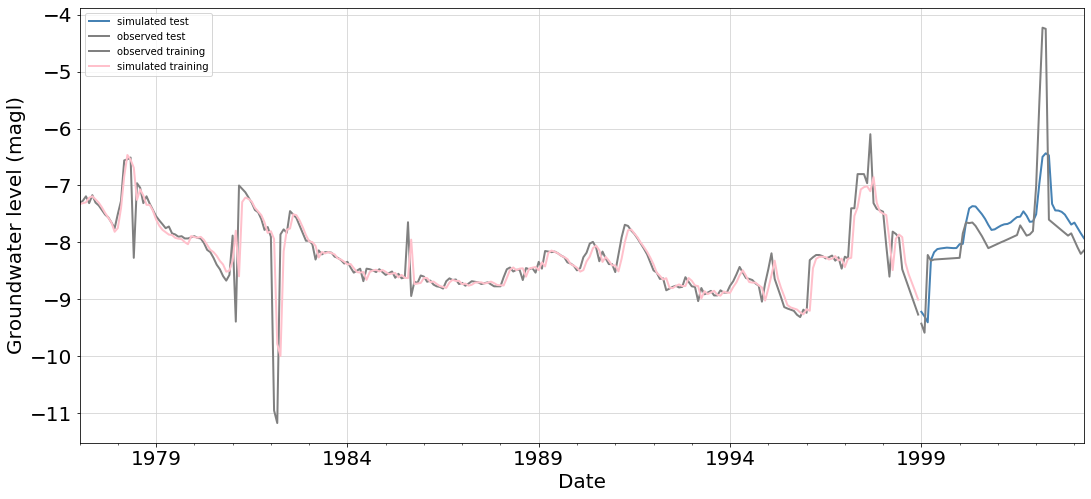

In [57]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [58]:
y_lstm = out_df['simulated test']

### GRU

In [59]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [60]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(52, 6)

    #running function
    gwl = -1.77741521
    test_forecast = X_test
    steps_ahead = 52
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_pred
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(264, 6)
Train on 264 samples, validate on 52 samples
Epoch 1/1000
 96/264 [=========>....................] - ETA: 5s - loss: 0.4881 - mean_squared_error: 0.4881
Epoch 00001: val_loss improved from inf to 2.02052, saving model to model.h5
264/264 [==============================] - 7s 27ms/sample - loss: 0.6630 - mean_squared_error: 0.6630 - val_loss: 2.0205 - val_mean_squared_error: 2.0205
Epoch 2/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6189 - mean_squared_error: 0.6189
Epoch 00002: val_loss improved from 2.02052 to 1.97603, saving model to model.h5
264/264 [==============================] - 0s 191us/sample - loss: 0.5961 - mean_squared_error: 0.5961 - val_loss: 1.9760 - val_mean_squared_error: 1.9760
Epoch 3/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6545 - mean_squared_error: 0.6545
Epoch 00003: val_loss improved from 1.97603 to 1.93794, saving model to model.h5
264/264 [==============================] - 0s 168us/sample 

Epoch 25/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3388 - mean_squared_error: 0.3388
Epoch 00025: val_loss improved from 1.22052 to 1.19599, saving model to model.h5
264/264 [==============================] - 0s 169us/sample - loss: 0.3484 - mean_squared_error: 0.3484 - val_loss: 1.1960 - val_mean_squared_error: 1.1960
Epoch 26/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3072 - mean_squared_error: 0.3072
Epoch 00026: val_loss improved from 1.19599 to 1.17504, saving model to model.h5
264/264 [==============================] - 0s 175us/sample - loss: 0.3422 - mean_squared_error: 0.3422 - val_loss: 1.1750 - val_mean_squared_error: 1.1750
Epoch 27/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4217 - mean_squared_error: 0.4217
Epoch 00027: val_loss improved from 1.17504 to 1.15579, saving model to model.h5
264/264 [==============================] - 0s 169us/sample - loss: 0.3454 - mean_squared_error: 0.3454 - val_loss: 1.155

Epoch 49/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3104 - mean_squared_error: 0.3104
Epoch 00049: val_loss improved from 0.90568 to 0.90209, saving model to model.h5
264/264 [==============================] - 0s 212us/sample - loss: 0.2856 - mean_squared_error: 0.2856 - val_loss: 0.9021 - val_mean_squared_error: 0.9021
Epoch 50/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4035 - mean_squared_error: 0.4035
Epoch 00050: val_loss improved from 0.90209 to 0.89740, saving model to model.h5
264/264 [==============================] - 0s 197us/sample - loss: 0.2931 - mean_squared_error: 0.2931 - val_loss: 0.8974 - val_mean_squared_error: 0.8974
Epoch 51/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2203 - mean_squared_error: 0.2203
Epoch 00051: val_loss improved from 0.89740 to 0.89373, saving model to model.h5
264/264 [==============================] - 0s 214us/sample - loss: 0.2822 - mean_squared_error: 0.2822 - val_loss: 0.893

Epoch 73/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1832 - mean_squared_error: 0.1832
Epoch 00073: val_loss improved from 0.83610 to 0.83597, saving model to model.h5
264/264 [==============================] - 0s 199us/sample - loss: 0.2632 - mean_squared_error: 0.2632 - val_loss: 0.8360 - val_mean_squared_error: 0.8360
Epoch 74/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 00074: val_loss improved from 0.83597 to 0.83543, saving model to model.h5
264/264 [==============================] - 0s 200us/sample - loss: 0.2746 - mean_squared_error: 0.2746 - val_loss: 0.8354 - val_mean_squared_error: 0.8354
Epoch 75/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4065 - mean_squared_error: 0.4065
Epoch 00075: val_loss improved from 0.83543 to 0.83281, saving model to model.h5
264/264 [==============================] - 0s 381us/sample - loss: 0.2661 - mean_squared_error: 0.2661 - val_loss: 0.832

Epoch 122/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 00122: val_loss did not improve from 0.76747
264/264 [==============================] - 0s 106us/sample - loss: 0.2597 - mean_squared_error: 0.2597 - val_loss: 0.7679 - val_mean_squared_error: 0.7679
Epoch 123/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2003 - mean_squared_error: 0.2003
Epoch 00123: val_loss did not improve from 0.76747
264/264 [==============================] - 0s 126us/sample - loss: 0.2433 - mean_squared_error: 0.2433 - val_loss: 0.7683 - val_mean_squared_error: 0.7683
Epoch 124/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2773 - mean_squared_error: 0.2773
Epoch 00124: val_loss did not improve from 0.76747
264/264 [==============================] - 0s 183us/sample - loss: 0.2534 - mean_squared_error: 0.2534 - val_loss: 0.7694 - val_mean_squared_error: 0.7694
Epoch 125/1000
 96/264 [=========>..................

Epoch 147/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3015 - mean_squared_error: 0.3015
Epoch 00147: val_loss did not improve from 0.74504
264/264 [==============================] - 0s 136us/sample - loss: 0.2512 - mean_squared_error: 0.2512 - val_loss: 0.7451 - val_mean_squared_error: 0.7451
Epoch 148/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3305 - mean_squared_error: 0.3305
Epoch 00148: val_loss did not improve from 0.74504
264/264 [==============================] - 0s 122us/sample - loss: 0.2500 - mean_squared_error: 0.2500 - val_loss: 0.7469 - val_mean_squared_error: 0.7469
Epoch 149/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3105 - mean_squared_error: 0.3105
Epoch 00149: val_loss did not improve from 0.74504
264/264 [==============================] - 0s 146us/sample - loss: 0.2411 - mean_squared_error: 0.2411 - val_loss: 0.7454 - val_mean_squared_error: 0.7454
Epoch 150/1000
 96/264 [=========>..................

Epoch 172/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2264 - mean_squared_error: 0.2264
Epoch 00172: val_loss did not improve from 0.73401
264/264 [==============================] - 0s 127us/sample - loss: 0.2440 - mean_squared_error: 0.2440 - val_loss: 0.7365 - val_mean_squared_error: 0.7365
Epoch 173/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00173: val_loss did not improve from 0.73401
264/264 [==============================] - 0s 99us/sample - loss: 0.2382 - mean_squared_error: 0.2382 - val_loss: 0.7345 - val_mean_squared_error: 0.7345
Epoch 174/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3050 - mean_squared_error: 0.3050
Epoch 00174: val_loss improved from 0.73401 to 0.73257, saving model to model.h5
264/264 [==============================] - 0s 184us/sample - loss: 0.2479 - mean_squared_error: 0.2479 - val_loss: 0.7326 - val_mean_squared_error: 0.7326
Epoch 175/1000
 96/264 

Epoch 197/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2104 - mean_squared_error: 0.2104
Epoch 00197: val_loss improved from 0.71649 to 0.71625, saving model to model.h5
264/264 [==============================] - 0s 325us/sample - loss: 0.2385 - mean_squared_error: 0.2385 - val_loss: 0.7163 - val_mean_squared_error: 0.7163
Epoch 198/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 00198: val_loss did not improve from 0.71625
264/264 [==============================] - 0s 118us/sample - loss: 0.2410 - mean_squared_error: 0.2410 - val_loss: 0.7219 - val_mean_squared_error: 0.7219
Epoch 199/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1933 - mean_squared_error: 0.1933
Epoch 00199: val_loss did not improve from 0.71625
264/264 [==============================] - 0s 129us/sample - loss: 0.2393 - mean_squared_error: 0.2393 - val_loss: 0.7187 - val_mean_squared_error: 0.7187
Epoch 200/1000
 96/264

Epoch 222/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2104 - mean_squared_error: 0.2104
Epoch 00222: val_loss did not improve from 0.70168
264/264 [==============================] - 0s 100us/sample - loss: 0.2236 - mean_squared_error: 0.2236 - val_loss: 0.7034 - val_mean_squared_error: 0.7034
Epoch 223/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3264 - mean_squared_error: 0.3264
Epoch 00223: val_loss did not improve from 0.70168
264/264 [==============================] - 0s 87us/sample - loss: 0.2261 - mean_squared_error: 0.2261 - val_loss: 0.7040 - val_mean_squared_error: 0.7040
Epoch 224/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1376 - mean_squared_error: 0.1376
Epoch 00224: val_loss did not improve from 0.70168
264/264 [==============================] - 0s 91us/sample - loss: 0.2356 - mean_squared_error: 0.2356 - val_loss: 0.7067 - val_mean_squared_error: 0.7067
Epoch 225/1000
 96/264 [=========>....................

Epoch 248/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3408 - mean_squared_error: 0.3408
Epoch 00248: val_loss did not improve from 0.70062
264/264 [==============================] - 0s 89us/sample - loss: 0.2236 - mean_squared_error: 0.2236 - val_loss: 0.7031 - val_mean_squared_error: 0.7031
Epoch 249/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00249: val_loss improved from 0.70062 to 0.69931, saving model to model.h5
264/264 [==============================] - 0s 200us/sample - loss: 0.2230 - mean_squared_error: 0.2230 - val_loss: 0.6993 - val_mean_squared_error: 0.6993
Epoch 250/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1575 - mean_squared_error: 0.1575
Epoch 00250: val_loss did not improve from 0.69931
264/264 [==============================] - 0s 124us/sample - loss: 0.2324 - mean_squared_error: 0.2324 - val_loss: 0.7010 - val_mean_squared_error: 0.7010
Epoch 251/1000
 96/264 

Epoch 274/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1497 - mean_squared_error: 0.1497
Epoch 00274: val_loss did not improve from 0.69727
264/264 [==============================] - 0s 94us/sample - loss: 0.2246 - mean_squared_error: 0.2246 - val_loss: 0.7051 - val_mean_squared_error: 0.7051
Epoch 275/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0951 - mean_squared_error: 0.0951
Epoch 00275: val_loss did not improve from 0.69727
264/264 [==============================] - 0s 95us/sample - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 0.7019 - val_mean_squared_error: 0.7019
Epoch 276/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3220 - mean_squared_error: 0.3220
Epoch 00276: val_loss did not improve from 0.69727
264/264 [==============================] - 0s 107us/sample - loss: 0.2226 - mean_squared_error: 0.2226 - val_loss: 0.6997 - val_mean_squared_error: 0.6997
Epoch 277/1000
 96/264 [=========>....................

Epoch 300/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1284 - mean_squared_error: 0.1284
Epoch 00300: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 87us/sample - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.7017 - val_mean_squared_error: 0.7017
Epoch 301/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1928 - mean_squared_error: 0.1928
Epoch 00301: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 98us/sample - loss: 0.2118 - mean_squared_error: 0.2118 - val_loss: 0.7013 - val_mean_squared_error: 0.7013
Epoch 302/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 00302: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 98us/sample - loss: 0.2138 - mean_squared_error: 0.2138 - val_loss: 0.7024 - val_mean_squared_error: 0.7024
Epoch 303/1000
 96/264 [=========>....................]

Epoch 326/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1628 - mean_squared_error: 0.1628
Epoch 00326: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 94us/sample - loss: 0.2186 - mean_squared_error: 0.2186 - val_loss: 0.7094 - val_mean_squared_error: 0.7094
Epoch 327/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2985 - mean_squared_error: 0.2985
Epoch 00327: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 91us/sample - loss: 0.2083 - mean_squared_error: 0.2083 - val_loss: 0.7108 - val_mean_squared_error: 0.7108
Epoch 328/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00328: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 94us/sample - loss: 0.2121 - mean_squared_error: 0.2121 - val_loss: 0.7132 - val_mean_squared_error: 0.7132
Epoch 329/1000
 96/264 [=========>....................]

Epoch 352/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4446 - mean_squared_error: 0.4446
Epoch 00352: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 102us/sample - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 0.7180 - val_mean_squared_error: 0.7180
Epoch 353/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1439 - mean_squared_error: 0.1439
Epoch 00353: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 97us/sample - loss: 0.2045 - mean_squared_error: 0.2045 - val_loss: 0.7189 - val_mean_squared_error: 0.7189
Epoch 354/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 00354: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 146us/sample - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.7248 - val_mean_squared_error: 0.7248
Epoch 355/1000
 96/264 [=========>...................

Epoch 378/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1866 - mean_squared_error: 0.1866
Epoch 00378: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 96us/sample - loss: 0.2014 - mean_squared_error: 0.2014 - val_loss: 0.7410 - val_mean_squared_error: 0.7410
Epoch 379/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0678 - mean_squared_error: 0.0678
Epoch 00379: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 137us/sample - loss: 0.2074 - mean_squared_error: 0.2074 - val_loss: 0.7405 - val_mean_squared_error: 0.7405
Epoch 380/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2855 - mean_squared_error: 0.2855
Epoch 00380: val_loss did not improve from 0.69267
264/264 [==============================] - 0s 93us/sample - loss: 0.2078 - mean_squared_error: 0.2078 - val_loss: 0.7406 - val_mean_squared_error: 0.7406
Epoch 381/1000
 96/264 [=========>....................

Epoch 41/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1315 - mean_squared_error: 0.1315
Epoch 00041: val_loss improved from 0.99718 to 0.98448, saving model to model.h5
264/264 [==============================] - 0s 219us/sample - loss: 0.3061 - mean_squared_error: 0.3061 - val_loss: 0.9845 - val_mean_squared_error: 0.9845
Epoch 42/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2221 - mean_squared_error: 0.2221
Epoch 00042: val_loss improved from 0.98448 to 0.97643, saving model to model.h5
264/264 [==============================] - 0s 200us/sample - loss: 0.3140 - mean_squared_error: 0.3140 - val_loss: 0.9764 - val_mean_squared_error: 0.9764
Epoch 43/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.5403 - mean_squared_error: 0.5403
Epoch 00043: val_loss improved from 0.97643 to 0.96530, saving model to model.h5
264/264 [==============================] - 0s 160us/sample - loss: 0.2990 - mean_squared_error: 0.2990 - val_loss: 0.965

Epoch 65/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3272 - mean_squared_error: 0.3272
Epoch 00065: val_loss improved from 0.87585 to 0.87283, saving model to model.h5
264/264 [==============================] - 0s 258us/sample - loss: 0.2794 - mean_squared_error: 0.2794 - val_loss: 0.8728 - val_mean_squared_error: 0.8728
Epoch 66/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2091 - mean_squared_error: 0.2091
Epoch 00066: val_loss improved from 0.87283 to 0.87251, saving model to model.h5
264/264 [==============================] - 0s 205us/sample - loss: 0.2742 - mean_squared_error: 0.2742 - val_loss: 0.8725 - val_mean_squared_error: 0.8725
Epoch 67/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1362 - mean_squared_error: 0.1362
Epoch 00067: val_loss did not improve from 0.87251
264/264 [==============================] - 0s 121us/sample - loss: 0.2717 - mean_squared_error: 0.2717 - val_loss: 0.8730 - val_mean_squared_error: 0.

264/264 [==============================] - 0s 158us/sample - loss: 0.2509 - mean_squared_error: 0.2509 - val_loss: 0.8400 - val_mean_squared_error: 0.8400
Epoch 90/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2950 - mean_squared_error: 0.2950
Epoch 00090: val_loss improved from 0.84004 to 0.83956, saving model to model.h5
264/264 [==============================] - 0s 165us/sample - loss: 0.2540 - mean_squared_error: 0.2540 - val_loss: 0.8396 - val_mean_squared_error: 0.8396
Epoch 91/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3218 - mean_squared_error: 0.3218
Epoch 00091: val_loss improved from 0.83956 to 0.83745, saving model to model.h5
264/264 [==============================] - 0s 160us/sample - loss: 0.2579 - mean_squared_error: 0.2579 - val_loss: 0.8375 - val_mean_squared_error: 0.8375
Epoch 92/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2680 - mean_squared_error: 0.2680
Epoch 00092: val_loss improved from 0.83745 to

Epoch 114/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1192 - mean_squared_error: 0.1192
Epoch 00114: val_loss improved from 0.80979 to 0.80824, saving model to model.h5
264/264 [==============================] - 0s 203us/sample - loss: 0.2415 - mean_squared_error: 0.2415 - val_loss: 0.8082 - val_mean_squared_error: 0.8082
Epoch 115/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3913 - mean_squared_error: 0.3913
Epoch 00115: val_loss improved from 0.80824 to 0.80682, saving model to model.h5
264/264 [==============================] - 0s 206us/sample - loss: 0.2445 - mean_squared_error: 0.2445 - val_loss: 0.8068 - val_mean_squared_error: 0.8068
Epoch 116/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 00116: val_loss did not improve from 0.80682
264/264 [==============================] - 0s 111us/sample - loss: 0.2486 - mean_squared_error: 0.2486 - val_loss: 0.8078 - val_mean_squared_error:

 96/264 [=========>....................] - ETA: 0s - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 00163: val_loss did not improve from 0.77259
264/264 [==============================] - 0s 159us/sample - loss: 0.2307 - mean_squared_error: 0.2307 - val_loss: 0.7728 - val_mean_squared_error: 0.7728
Epoch 164/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3843 - mean_squared_error: 0.3843
Epoch 00164: val_loss did not improve from 0.77259
264/264 [==============================] - 0s 161us/sample - loss: 0.2436 - mean_squared_error: 0.2436 - val_loss: 0.7760 - val_mean_squared_error: 0.7760
Epoch 165/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3303 - mean_squared_error: 0.3303
Epoch 00165: val_loss did not improve from 0.77259
264/264 [==============================] - 0s 81us/sample - loss: 0.2353 - mean_squared_error: 0.2353 - val_loss: 0.7736 - val_mean_squared_error: 0.7736
Epoch 166/1000
 96/264 [=========>....................] - ETA: 0s - 

Epoch 189/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0959 - mean_squared_error: 0.0959
Epoch 00189: val_loss did not improve from 0.76391
264/264 [==============================] - 0s 172us/sample - loss: 0.2243 - mean_squared_error: 0.2243 - val_loss: 0.7672 - val_mean_squared_error: 0.7672
Epoch 190/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3572 - mean_squared_error: 0.3572
Epoch 00190: val_loss did not improve from 0.76391
264/264 [==============================] - 0s 120us/sample - loss: 0.2328 - mean_squared_error: 0.2328 - val_loss: 0.7661 - val_mean_squared_error: 0.7661
Epoch 191/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3620 - mean_squared_error: 0.3620
Epoch 00191: val_loss did not improve from 0.76391
264/264 [==============================] - 0s 142us/sample - loss: 0.2295 - mean_squared_error: 0.2295 - val_loss: 0.7651 - val_mean_squared_error: 0.7651
Epoch 192/1000
 96/264 [=========>..................

Epoch 215/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 00215: val_loss improved from 0.76171 to 0.75921, saving model to model.h5
264/264 [==============================] - 0s 152us/sample - loss: 0.2088 - mean_squared_error: 0.2088 - val_loss: 0.7592 - val_mean_squared_error: 0.7592
Epoch 216/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3589 - mean_squared_error: 0.3589
Epoch 00216: val_loss improved from 0.75921 to 0.75662, saving model to model.h5
264/264 [==============================] - 0s 234us/sample - loss: 0.2100 - mean_squared_error: 0.2100 - val_loss: 0.7566 - val_mean_squared_error: 0.7566
Epoch 217/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3472 - mean_squared_error: 0.3472
Epoch 00217: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 127us/sample - loss: 0.2253 - mean_squared_error: 0.2253 - val_loss: 0.7571 - val_mean_squared_error:

Epoch 241/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0630 - mean_squared_error: 0.0630
Epoch 00241: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 111us/sample - loss: 0.2210 - mean_squared_error: 0.2210 - val_loss: 0.7658 - val_mean_squared_error: 0.7658
Epoch 242/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1419 - mean_squared_error: 0.1419
Epoch 00242: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 100us/sample - loss: 0.2171 - mean_squared_error: 0.2171 - val_loss: 0.7616 - val_mean_squared_error: 0.7616
Epoch 243/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 00243: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 117us/sample - loss: 0.2176 - mean_squared_error: 0.2176 - val_loss: 0.7651 - val_mean_squared_error: 0.7651
Epoch 244/1000
 96/264 [=========>..................

Epoch 267/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1177 - mean_squared_error: 0.1177
Epoch 00267: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 193us/sample - loss: 0.2186 - mean_squared_error: 0.2186 - val_loss: 0.7715 - val_mean_squared_error: 0.7715
Epoch 268/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2440 - mean_squared_error: 0.2440
Epoch 00268: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 132us/sample - loss: 0.2250 - mean_squared_error: 0.2250 - val_loss: 0.7715 - val_mean_squared_error: 0.7715
Epoch 269/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1806 - mean_squared_error: 0.1806
Epoch 00269: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 118us/sample - loss: 0.2005 - mean_squared_error: 0.2005 - val_loss: 0.7746 - val_mean_squared_error: 0.7746
Epoch 270/1000
 96/264 [=========>..................

Epoch 293/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1973 - mean_squared_error: 0.1973
Epoch 00293: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 87us/sample - loss: 0.2056 - mean_squared_error: 0.2056 - val_loss: 0.7844 - val_mean_squared_error: 0.7844
Epoch 294/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1620 - mean_squared_error: 0.1620
Epoch 00294: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 82us/sample - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 0.7843 - val_mean_squared_error: 0.7843
Epoch 295/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3886 - mean_squared_error: 0.3886
Epoch 00295: val_loss did not improve from 0.75662
264/264 [==============================] - 0s 87us/sample - loss: 0.2186 - mean_squared_error: 0.2186 - val_loss: 0.7812 - val_mean_squared_error: 0.7812
Epoch 296/1000
 96/264 [=========>....................]

Epoch 3/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.7376 - mean_squared_error: 0.7376
Epoch 00003: val_loss improved from 2.25482 to 2.23903, saving model to model.h5
264/264 [==============================] - 0s 208us/sample - loss: 0.7659 - mean_squared_error: 0.7659 - val_loss: 2.2390 - val_mean_squared_error: 2.2390
Epoch 4/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.7727 - mean_squared_error: 0.7727
Epoch 00004: val_loss improved from 2.23903 to 2.22387, saving model to model.h5
264/264 [==============================] - 0s 218us/sample - loss: 0.7203 - mean_squared_error: 0.7203 - val_loss: 2.2239 - val_mean_squared_error: 2.2239
Epoch 5/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.8344 - mean_squared_error: 0.8344
Epoch 00005: val_loss improved from 2.22387 to 2.20700, saving model to model.h5
264/264 [==============================] - 0s 188us/sample - loss: 0.6990 - mean_squared_error: 0.6990 - val_loss: 2.2070 -

Epoch 27/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3774 - mean_squared_error: 0.3774
Epoch 00027: val_loss improved from 1.59456 to 1.55840, saving model to model.h5
264/264 [==============================] - 0s 148us/sample - loss: 0.3681 - mean_squared_error: 0.3681 - val_loss: 1.5584 - val_mean_squared_error: 1.5584
Epoch 28/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6269 - mean_squared_error: 0.6269
Epoch 00028: val_loss improved from 1.55840 to 1.52328, saving model to model.h5
264/264 [==============================] - 0s 157us/sample - loss: 0.3820 - mean_squared_error: 0.3820 - val_loss: 1.5233 - val_mean_squared_error: 1.5233
Epoch 29/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6036 - mean_squared_error: 0.6036
Epoch 00029: val_loss improved from 1.52328 to 1.48977, saving model to model.h5
264/264 [==============================] - 0s 195us/sample - loss: 0.3783 - mean_squared_error: 0.3783 - val_loss: 1.489

Epoch 51/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3741 - mean_squared_error: 0.3741
Epoch 00051: val_loss improved from 0.98294 to 0.96516, saving model to model.h5
264/264 [==============================] - 0s 282us/sample - loss: 0.2969 - mean_squared_error: 0.2969 - val_loss: 0.9652 - val_mean_squared_error: 0.9652
Epoch 52/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3535 - mean_squared_error: 0.3535
Epoch 00052: val_loss improved from 0.96516 to 0.95253, saving model to model.h5
264/264 [==============================] - 0s 259us/sample - loss: 0.2976 - mean_squared_error: 0.2976 - val_loss: 0.9525 - val_mean_squared_error: 0.9525
Epoch 53/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3046 - mean_squared_error: 0.3046
Epoch 00053: val_loss improved from 0.95253 to 0.93975, saving model to model.h5
264/264 [==============================] - 0s 199us/sample - loss: 0.3011 - mean_squared_error: 0.3011 - val_loss: 0.939

Epoch 75/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2255 - mean_squared_error: 0.2255
Epoch 00075: val_loss improved from 0.80914 to 0.80709, saving model to model.h5
264/264 [==============================] - 0s 201us/sample - loss: 0.2757 - mean_squared_error: 0.2757 - val_loss: 0.8071 - val_mean_squared_error: 0.8071
Epoch 76/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2593 - mean_squared_error: 0.2593
Epoch 00076: val_loss improved from 0.80709 to 0.80451, saving model to model.h5
264/264 [==============================] - 0s 161us/sample - loss: 0.2687 - mean_squared_error: 0.2687 - val_loss: 0.8045 - val_mean_squared_error: 0.8045
Epoch 77/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2199 - mean_squared_error: 0.2199
Epoch 00077: val_loss did not improve from 0.80451
264/264 [==============================] - 0s 91us/sample - loss: 0.2688 - mean_squared_error: 0.2688 - val_loss: 0.8056 - val_mean_squared_error: 0.8

Epoch 100/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4776 - mean_squared_error: 0.4776
Epoch 00100: val_loss did not improve from 0.78779
264/264 [==============================] - 0s 90us/sample - loss: 0.2765 - mean_squared_error: 0.2765 - val_loss: 0.7897 - val_mean_squared_error: 0.7897
Epoch 101/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4025 - mean_squared_error: 0.4025
Epoch 00101: val_loss did not improve from 0.78779
264/264 [==============================] - 0s 132us/sample - loss: 0.2599 - mean_squared_error: 0.2599 - val_loss: 0.7894 - val_mean_squared_error: 0.7894
Epoch 102/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2350 - mean_squared_error: 0.2350
Epoch 00102: val_loss did not improve from 0.78779
264/264 [==============================] - 0s 84us/sample - loss: 0.2718 - mean_squared_error: 0.2718 - val_loss: 0.7905 - val_mean_squared_error: 0.7905
Epoch 103/1000
 96/264 [=========>....................

Epoch 126/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2525 - mean_squared_error: 0.2525
Epoch 00126: val_loss improved from 0.78779 to 0.78600, saving model to model.h5
264/264 [==============================] - 0s 171us/sample - loss: 0.2514 - mean_squared_error: 0.2514 - val_loss: 0.7860 - val_mean_squared_error: 0.7860
Epoch 127/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3854 - mean_squared_error: 0.3854
Epoch 00127: val_loss did not improve from 0.78600
264/264 [==============================] - 0s 85us/sample - loss: 0.2503 - mean_squared_error: 0.2503 - val_loss: 0.7860 - val_mean_squared_error: 0.7860
Epoch 128/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1660 - mean_squared_error: 0.1660
Epoch 00128: val_loss improved from 0.78600 to 0.78554, saving model to model.h5
264/264 [==============================] - 0s 212us/sample - loss: 0.2601 - mean_squared_error: 0.2601 - val_loss: 0.7855 - val_mean_squared_error: 

Epoch 152/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2030 - mean_squared_error: 0.2030
Epoch 00152: val_loss did not improve from 0.78370
264/264 [==============================] - 0s 172us/sample - loss: 0.2449 - mean_squared_error: 0.2449 - val_loss: 0.7911 - val_mean_squared_error: 0.7911
Epoch 153/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0981 - mean_squared_error: 0.0981
Epoch 00153: val_loss did not improve from 0.78370
264/264 [==============================] - 0s 152us/sample - loss: 0.2438 - mean_squared_error: 0.2438 - val_loss: 0.7900 - val_mean_squared_error: 0.7900
Epoch 154/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2281 - mean_squared_error: 0.2281
Epoch 00154: val_loss did not improve from 0.78370
264/264 [==============================] - 0s 120us/sample - loss: 0.2374 - mean_squared_error: 0.2374 - val_loss: 0.7899 - val_mean_squared_error: 0.7899
Epoch 155/1000
 96/264 [=========>..................

Epoch 178/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3419 - mean_squared_error: 0.3419
Epoch 00178: val_loss did not improve from 0.78370
264/264 [==============================] - 0s 112us/sample - loss: 0.2408 - mean_squared_error: 0.2408 - val_loss: 0.7851 - val_mean_squared_error: 0.7851
Epoch 179/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4962 - mean_squared_error: 0.4962
Epoch 00179: val_loss did not improve from 0.78370
264/264 [==============================] - 0s 124us/sample - loss: 0.2477 - mean_squared_error: 0.2477 - val_loss: 0.7837 - val_mean_squared_error: 0.7837
Epoch 180/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1637 - mean_squared_error: 0.1637
Epoch 00180: val_loss did not improve from 0.78370
264/264 [==============================] - 0s 109us/sample - loss: 0.2310 - mean_squared_error: 0.2310 - val_loss: 0.7852 - val_mean_squared_error: 0.7852
Epoch 181/1000
 96/264 [=========>..................

Epoch 204/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3240 - mean_squared_error: 0.3240
Epoch 00204: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 119us/sample - loss: 0.2336 - mean_squared_error: 0.2336 - val_loss: 0.7917 - val_mean_squared_error: 0.7917
Epoch 205/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2918 - mean_squared_error: 0.2918
Epoch 00205: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 188us/sample - loss: 0.2269 - mean_squared_error: 0.2269 - val_loss: 0.7883 - val_mean_squared_error: 0.7883
Epoch 206/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4208 - mean_squared_error: 0.4208
Epoch 00206: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 149us/sample - loss: 0.2266 - mean_squared_error: 0.2266 - val_loss: 0.7889 - val_mean_squared_error: 0.7889
Epoch 207/1000
 96/264 [=========>..................

Epoch 230/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1211 - mean_squared_error: 0.1211
Epoch 00230: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 117us/sample - loss: 0.2272 - mean_squared_error: 0.2272 - val_loss: 0.8032 - val_mean_squared_error: 0.8032
Epoch 231/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3395 - mean_squared_error: 0.3395
Epoch 00231: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 117us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.8028 - val_mean_squared_error: 0.8028
Epoch 232/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1895 - mean_squared_error: 0.1895
Epoch 00232: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 135us/sample - loss: 0.2284 - mean_squared_error: 0.2284 - val_loss: 0.8030 - val_mean_squared_error: 0.8030
Epoch 233/1000
 96/264 [=========>..................

Epoch 256/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2148 - mean_squared_error: 0.2148
Epoch 00256: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 126us/sample - loss: 0.2260 - mean_squared_error: 0.2260 - val_loss: 0.8056 - val_mean_squared_error: 0.8056
Epoch 257/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00257: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 91us/sample - loss: 0.2216 - mean_squared_error: 0.2216 - val_loss: 0.8081 - val_mean_squared_error: 0.8081
Epoch 258/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 00258: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 94us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.8073 - val_mean_squared_error: 0.8073
Epoch 259/1000
 96/264 [=========>....................

Epoch 282/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1188 - mean_squared_error: 0.1188
Epoch 00282: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 80us/sample - loss: 0.2176 - mean_squared_error: 0.2176 - val_loss: 0.8269 - val_mean_squared_error: 0.8269
Epoch 283/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2097 - mean_squared_error: 0.2097
Epoch 00283: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 84us/sample - loss: 0.2063 - mean_squared_error: 0.2063 - val_loss: 0.8254 - val_mean_squared_error: 0.8254
Epoch 284/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00284: val_loss did not improve from 0.78277
264/264 [==============================] - 0s 87us/sample - loss: 0.2271 - mean_squared_error: 0.2271 - val_loss: 0.8248 - val_mean_squared_error: 0.8248
Running fold 4
(264, 6)
Train on 264 samples, validate 

Epoch 22/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6002 - mean_squared_error: 0.6002
Epoch 00022: val_loss improved from 1.74608 to 1.69577, saving model to model.h5
264/264 [==============================] - 0s 181us/sample - loss: 0.4017 - mean_squared_error: 0.4017 - val_loss: 1.6958 - val_mean_squared_error: 1.6958
Epoch 23/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4485 - mean_squared_error: 0.4485
Epoch 00023: val_loss improved from 1.69577 to 1.64332, saving model to model.h5
264/264 [==============================] - 0s 545us/sample - loss: 0.4041 - mean_squared_error: 0.4041 - val_loss: 1.6433 - val_mean_squared_error: 1.6433
Epoch 24/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3517 - mean_squared_error: 0.3517
Epoch 00024: val_loss improved from 1.64332 to 1.59247, saving model to model.h5
264/264 [==============================] - 0s 226us/sample - loss: 0.3992 - mean_squared_error: 0.3992 - val_loss: 1.592

Epoch 46/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1697 - mean_squared_error: 0.1697
Epoch 00046: val_loss improved from 0.89587 to 0.87522, saving model to model.h5
264/264 [==============================] - 0s 162us/sample - loss: 0.2856 - mean_squared_error: 0.2856 - val_loss: 0.8752 - val_mean_squared_error: 0.8752
Epoch 47/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4634 - mean_squared_error: 0.4634
Epoch 00047: val_loss improved from 0.87522 to 0.85637, saving model to model.h5
264/264 [==============================] - 0s 175us/sample - loss: 0.2956 - mean_squared_error: 0.2956 - val_loss: 0.8564 - val_mean_squared_error: 0.8564
Epoch 48/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3064 - mean_squared_error: 0.3064
Epoch 00048: val_loss improved from 0.85637 to 0.84314, saving model to model.h5
264/264 [==============================] - 0s 174us/sample - loss: 0.2836 - mean_squared_error: 0.2836 - val_loss: 0.843

Epoch 70/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3783 - mean_squared_error: 0.3783
Epoch 00070: val_loss improved from 0.69747 to 0.69270, saving model to model.h5
264/264 [==============================] - 0s 160us/sample - loss: 0.2529 - mean_squared_error: 0.2529 - val_loss: 0.6927 - val_mean_squared_error: 0.6927
Epoch 71/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1955 - mean_squared_error: 0.1955
Epoch 00071: val_loss did not improve from 0.69270
264/264 [==============================] - 0s 93us/sample - loss: 0.2579 - mean_squared_error: 0.2579 - val_loss: 0.6933 - val_mean_squared_error: 0.6933
Epoch 72/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1438 - mean_squared_error: 0.1438
Epoch 00072: val_loss improved from 0.69270 to 0.68931, saving model to model.h5
264/264 [==============================] - 0s 208us/sample - loss: 0.2625 - mean_squared_error: 0.2625 - val_loss: 0.6893 - val_mean_squared_error: 0.6

Epoch 95/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2735 - mean_squared_error: 0.2735
Epoch 00095: val_loss did not improve from 0.66690
264/264 [==============================] - 0s 114us/sample - loss: 0.2499 - mean_squared_error: 0.2499 - val_loss: 0.6670 - val_mean_squared_error: 0.6670
Epoch 96/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1620 - mean_squared_error: 0.1620
Epoch 00096: val_loss improved from 0.66690 to 0.66382, saving model to model.h5
264/264 [==============================] - 0s 244us/sample - loss: 0.2509 - mean_squared_error: 0.2509 - val_loss: 0.6638 - val_mean_squared_error: 0.6638
Epoch 97/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4376 - mean_squared_error: 0.4376
Epoch 00097: val_loss improved from 0.66382 to 0.66342, saving model to model.h5
264/264 [==============================] - 0s 243us/sample - loss: 0.2809 - mean_squared_error: 0.2809 - val_loss: 0.6634 - val_mean_squared_error: 0.

Epoch 120/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 00120: val_loss did not improve from 0.65307
264/264 [==============================] - 0s 110us/sample - loss: 0.2370 - mean_squared_error: 0.2370 - val_loss: 0.6532 - val_mean_squared_error: 0.6532
Epoch 121/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3121 - mean_squared_error: 0.3121
Epoch 00121: val_loss did not improve from 0.65307
264/264 [==============================] - 0s 139us/sample - loss: 0.2398 - mean_squared_error: 0.2398 - val_loss: 0.6545 - val_mean_squared_error: 0.6545
Epoch 122/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 00122: val_loss improved from 0.65307 to 0.65269, saving model to model.h5
264/264 [==============================] - 0s 287us/sample - loss: 0.2486 - mean_squared_error: 0.2486 - val_loss: 0.6527 - val_mean_squared_error: 0.6527
Epoch 123/1000
 96/264

Epoch 145/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2927 - mean_squared_error: 0.2927
Epoch 00145: val_loss improved from 0.64107 to 0.63941, saving model to model.h5
264/264 [==============================] - 0s 211us/sample - loss: 0.2616 - mean_squared_error: 0.2616 - val_loss: 0.6394 - val_mean_squared_error: 0.6394
Epoch 146/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2877 - mean_squared_error: 0.2877
Epoch 00146: val_loss did not improve from 0.63941
264/264 [==============================] - 0s 114us/sample - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 0.6417 - val_mean_squared_error: 0.6417
Epoch 147/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 00147: val_loss did not improve from 0.63941
264/264 [==============================] - 0s 105us/sample - loss: 0.2504 - mean_squared_error: 0.2504 - val_loss: 0.6409 - val_mean_squared_error: 0.6409
Epoch 148/1000
 96/264

Epoch 171/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3001 - mean_squared_error: 0.3001
Epoch 00171: val_loss did not improve from 0.63562
264/264 [==============================] - 0s 88us/sample - loss: 0.2287 - mean_squared_error: 0.2287 - val_loss: 0.6371 - val_mean_squared_error: 0.6371
Epoch 172/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1540 - mean_squared_error: 0.1540
Epoch 00172: val_loss improved from 0.63562 to 0.63490, saving model to model.h5
264/264 [==============================] - 0s 156us/sample - loss: 0.2168 - mean_squared_error: 0.2168 - val_loss: 0.6349 - val_mean_squared_error: 0.6349
Epoch 173/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3574 - mean_squared_error: 0.3574
Epoch 00173: val_loss improved from 0.63490 to 0.63246, saving model to model.h5
264/264 [==============================] - 0s 165us/sample - loss: 0.2233 - mean_squared_error: 0.2233 - val_loss: 0.6325 - val_mean_squared_error: 

264/264 [==============================] - 0s 204us/sample - loss: 0.2209 - mean_squared_error: 0.2209 - val_loss: 0.6289 - val_mean_squared_error: 0.6289
Epoch 197/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2671 - mean_squared_error: 0.2671
Epoch 00197: val_loss did not improve from 0.62894
264/264 [==============================] - 0s 86us/sample - loss: 0.2232 - mean_squared_error: 0.2232 - val_loss: 0.6292 - val_mean_squared_error: 0.6292
Epoch 198/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1088 - mean_squared_error: 0.1088
Epoch 00198: val_loss did not improve from 0.62894
264/264 [==============================] - 0s 86us/sample - loss: 0.2276 - mean_squared_error: 0.2276 - val_loss: 0.6294 - val_mean_squared_error: 0.6294
Epoch 199/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2520 - mean_squared_error: 0.2520
Epoch 00199: val_loss did not improve from 0.62894
264/264 [==============================] - 0s 92us/sam

Epoch 248/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2021 - mean_squared_error: 0.2021
Epoch 00248: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 103us/sample - loss: 0.2163 - mean_squared_error: 0.2163 - val_loss: 0.6316 - val_mean_squared_error: 0.6316
Epoch 249/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1674 - mean_squared_error: 0.1674
Epoch 00249: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 143us/sample - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.6314 - val_mean_squared_error: 0.6314
Epoch 250/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1321 - mean_squared_error: 0.1321
Epoch 00250: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 158us/sample - loss: 0.2120 - mean_squared_error: 0.2120 - val_loss: 0.6318 - val_mean_squared_error: 0.6318
Epoch 251/1000
 96/264 [=========>..................

Epoch 274/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3125 - mean_squared_error: 0.3125
Epoch 00274: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 101us/sample - loss: 0.2201 - mean_squared_error: 0.2201 - val_loss: 0.6316 - val_mean_squared_error: 0.6316
Epoch 275/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1290 - mean_squared_error: 0.1290
Epoch 00275: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 106us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 0.6321 - val_mean_squared_error: 0.6321
Epoch 276/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2803 - mean_squared_error: 0.2803
Epoch 00276: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 101us/sample - loss: 0.2171 - mean_squared_error: 0.2171 - val_loss: 0.6315 - val_mean_squared_error: 0.6315
Epoch 277/1000
 96/264 [=========>..................

Epoch 300/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1493 - mean_squared_error: 0.1493
Epoch 00300: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 89us/sample - loss: 0.2135 - mean_squared_error: 0.2135 - val_loss: 0.6365 - val_mean_squared_error: 0.6365
Epoch 301/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2136 - mean_squared_error: 0.2136
Epoch 00301: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 80us/sample - loss: 0.2115 - mean_squared_error: 0.2115 - val_loss: 0.6375 - val_mean_squared_error: 0.6375
Epoch 302/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0784 - mean_squared_error: 0.0784
Epoch 00302: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 82us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 0.6360 - val_mean_squared_error: 0.6360
Epoch 303/1000
 96/264 [=========>....................]

Epoch 326/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 00326: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 90us/sample - loss: 0.1893 - mean_squared_error: 0.1893 - val_loss: 0.6304 - val_mean_squared_error: 0.6304
Epoch 327/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 00327: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 95us/sample - loss: 0.2043 - mean_squared_error: 0.2043 - val_loss: 0.6311 - val_mean_squared_error: 0.6311
Epoch 328/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1444 - mean_squared_error: 0.1444
Epoch 00328: val_loss did not improve from 0.62651
264/264 [==============================] - 0s 145us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.6303 - val_mean_squared_error: 0.6303
Epoch 329/1000
 96/264 [=========>....................

Epoch 43/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00043: val_loss improved from 0.83566 to 0.82605, saving model to model.h5
264/264 [==============================] - 0s 136us/sample - loss: 0.2877 - mean_squared_error: 0.2877 - val_loss: 0.8260 - val_mean_squared_error: 0.8260
Epoch 44/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4085 - mean_squared_error: 0.4085
Epoch 00044: val_loss improved from 0.82605 to 0.81712, saving model to model.h5
264/264 [==============================] - 0s 153us/sample - loss: 0.2831 - mean_squared_error: 0.2831 - val_loss: 0.8171 - val_mean_squared_error: 0.8171
Epoch 45/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2284 - mean_squared_error: 0.2284
Epoch 00045: val_loss improved from 0.81712 to 0.80652, saving model to model.h5
264/264 [==============================] - 0s 132us/sample - loss: 0.2724 - mean_squared_error: 0.2724 - val_loss: 0.806

 96/264 [=========>....................] - ETA: 0s - loss: 0.1421 - mean_squared_error: 0.1421
Epoch 00067: val_loss did not improve from 0.75104
264/264 [==============================] - 0s 85us/sample - loss: 0.2660 - mean_squared_error: 0.2660 - val_loss: 0.7550 - val_mean_squared_error: 0.7550
Epoch 68/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4570 - mean_squared_error: 0.4570
Epoch 00068: val_loss did not improve from 0.75104
264/264 [==============================] - 0s 105us/sample - loss: 0.2594 - mean_squared_error: 0.2594 - val_loss: 0.7539 - val_mean_squared_error: 0.7539
Epoch 69/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1318 - mean_squared_error: 0.1318
Epoch 00069: val_loss did not improve from 0.75104
264/264 [==============================] - 0s 90us/sample - loss: 0.2622 - mean_squared_error: 0.2622 - val_loss: 0.7532 - val_mean_squared_error: 0.7532
Epoch 70/1000
 96/264 [=========>....................] - ETA: 0s - loss

 96/264 [=========>....................] - ETA: 0s - loss: 0.3056 - mean_squared_error: 0.3056
Epoch 00119: val_loss did not improve from 0.75104
264/264 [==============================] - 0s 81us/sample - loss: 0.2339 - mean_squared_error: 0.2339 - val_loss: 0.7716 - val_mean_squared_error: 0.7716
Epoch 120/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1637 - mean_squared_error: 0.1637
Epoch 00120: val_loss did not improve from 0.75104
264/264 [==============================] - 0s 79us/sample - loss: 0.2545 - mean_squared_error: 0.2545 - val_loss: 0.7738 - val_mean_squared_error: 0.7738
Epoch 121/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1719 - mean_squared_error: 0.1719
Epoch 00121: val_loss did not improve from 0.75104
264/264 [==============================] - 0s 80us/sample - loss: 0.2364 - mean_squared_error: 0.2364 - val_loss: 0.7767 - val_mean_squared_error: 0.7767
Epoch 122/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 7/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.5971 - mean_squared_error: 0.5971
Epoch 00007: val_loss improved from 1.67213 to 1.65875, saving model to model.h5
264/264 [==============================] - 0s 140us/sample - loss: 0.5517 - mean_squared_error: 0.5517 - val_loss: 1.6588 - val_mean_squared_error: 1.6588
Epoch 8/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3167 - mean_squared_error: 0.3167
Epoch 00008: val_loss improved from 1.65875 to 1.64350, saving model to model.h5
264/264 [==============================] - 0s 158us/sample - loss: 0.5358 - mean_squared_error: 0.5358 - val_loss: 1.6435 - val_mean_squared_error: 1.6435
Epoch 9/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3738 - mean_squared_error: 0.3738
Epoch 00009: val_loss improved from 1.64350 to 1.63224, saving model to model.h5
264/264 [==============================] - 0s 150us/sample - loss: 0.4950 - mean_squared_error: 0.4950 - val_loss: 1.6322 -

Epoch 31/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3868 - mean_squared_error: 0.3868
Epoch 00031: val_loss improved from 1.10955 to 1.09193, saving model to model.h5
264/264 [==============================] - 0s 148us/sample - loss: 0.3269 - mean_squared_error: 0.3269 - val_loss: 1.0919 - val_mean_squared_error: 1.0919
Epoch 32/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3878 - mean_squared_error: 0.3878
Epoch 00032: val_loss improved from 1.09193 to 1.06881, saving model to model.h5
264/264 [==============================] - 0s 133us/sample - loss: 0.3103 - mean_squared_error: 0.3103 - val_loss: 1.0688 - val_mean_squared_error: 1.0688
Epoch 33/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3980 - mean_squared_error: 0.3980
Epoch 00033: val_loss improved from 1.06881 to 1.04656, saving model to model.h5
264/264 [==============================] - 0s 172us/sample - loss: 0.3226 - mean_squared_error: 0.3226 - val_loss: 1.046

Epoch 55/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 00055: val_loss improved from 0.81630 to 0.81086, saving model to model.h5
264/264 [==============================] - 0s 129us/sample - loss: 0.2766 - mean_squared_error: 0.2766 - val_loss: 0.8109 - val_mean_squared_error: 0.8109
Epoch 56/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3166 - mean_squared_error: 0.3166
Epoch 00056: val_loss improved from 0.81086 to 0.80626, saving model to model.h5
264/264 [==============================] - 0s 155us/sample - loss: 0.2824 - mean_squared_error: 0.2824 - val_loss: 0.8063 - val_mean_squared_error: 0.8063
Epoch 57/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 00057: val_loss improved from 0.80626 to 0.80479, saving model to model.h5
264/264 [==============================] - 0s 130us/sample - loss: 0.2779 - mean_squared_error: 0.2779 - val_loss: 0.804

Epoch 79/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1459 - mean_squared_error: 0.1459
Epoch 00079: val_loss improved from 0.75334 to 0.75220, saving model to model.h5
264/264 [==============================] - 0s 141us/sample - loss: 0.2518 - mean_squared_error: 0.2518 - val_loss: 0.7522 - val_mean_squared_error: 0.7522
Epoch 80/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1497 - mean_squared_error: 0.1497
Epoch 00080: val_loss improved from 0.75220 to 0.75183, saving model to model.h5
264/264 [==============================] - 0s 129us/sample - loss: 0.2690 - mean_squared_error: 0.2690 - val_loss: 0.7518 - val_mean_squared_error: 0.7518
Epoch 81/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2050 - mean_squared_error: 0.2050
Epoch 00081: val_loss improved from 0.75183 to 0.75171, saving model to model.h5
264/264 [==============================] - 0s 134us/sample - loss: 0.2652 - mean_squared_error: 0.2652 - val_loss: 0.751

Epoch 104/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1652 - mean_squared_error: 0.1652
Epoch 00104: val_loss did not improve from 0.73291
264/264 [==============================] - 0s 73us/sample - loss: 0.2537 - mean_squared_error: 0.2537 - val_loss: 0.7356 - val_mean_squared_error: 0.7356
Epoch 105/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3134 - mean_squared_error: 0.3134
Epoch 00105: val_loss did not improve from 0.73291
264/264 [==============================] - 0s 73us/sample - loss: 0.2572 - mean_squared_error: 0.2572 - val_loss: 0.7335 - val_mean_squared_error: 0.7335
Epoch 106/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2441 - mean_squared_error: 0.2441
Epoch 00106: val_loss did not improve from 0.73291
264/264 [==============================] - 0s 87us/sample - loss: 0.2573 - mean_squared_error: 0.2573 - val_loss: 0.7332 - val_mean_squared_error: 0.7332
Epoch 107/1000
 96/264 [=========>....................]

Epoch 129/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1593 - mean_squared_error: 0.1593
Epoch 00129: val_loss did not improve from 0.71704
264/264 [==============================] - 0s 76us/sample - loss: 0.2470 - mean_squared_error: 0.2470 - val_loss: 0.7209 - val_mean_squared_error: 0.7209
Epoch 130/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3805 - mean_squared_error: 0.3805
Epoch 00130: val_loss improved from 0.71704 to 0.71704, saving model to model.h5
264/264 [==============================] - 0s 134us/sample - loss: 0.2413 - mean_squared_error: 0.2413 - val_loss: 0.7170 - val_mean_squared_error: 0.7170
Epoch 131/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2101 - mean_squared_error: 0.2101
Epoch 00131: val_loss did not improve from 0.71704
264/264 [==============================] - 0s 74us/sample - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 0.7191 - val_mean_squared_error: 0.7191
Epoch 132/1000
 96/264 [

Epoch 180/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1772 - mean_squared_error: 0.1772
Epoch 00180: val_loss did not improve from 0.69825
264/264 [==============================] - 0s 81us/sample - loss: 0.2426 - mean_squared_error: 0.2426 - val_loss: 0.7046 - val_mean_squared_error: 0.7046
Epoch 181/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1902 - mean_squared_error: 0.1902
Epoch 00181: val_loss did not improve from 0.69825
264/264 [==============================] - 0s 79us/sample - loss: 0.2259 - mean_squared_error: 0.2259 - val_loss: 0.7022 - val_mean_squared_error: 0.7022
Epoch 182/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 00182: val_loss did not improve from 0.69825
264/264 [==============================] - 0s 78us/sample - loss: 0.2423 - mean_squared_error: 0.2423 - val_loss: 0.7032 - val_mean_squared_error: 0.7032
Epoch 183/1000
 96/264 [=========>....................]

Epoch 206/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3507 - mean_squared_error: 0.3507
Epoch 00206: val_loss did not improve from 0.69375
264/264 [==============================] - 0s 83us/sample - loss: 0.2321 - mean_squared_error: 0.2321 - val_loss: 0.6992 - val_mean_squared_error: 0.6992
Epoch 207/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 00207: val_loss did not improve from 0.69375
264/264 [==============================] - 0s 84us/sample - loss: 0.2247 - mean_squared_error: 0.2247 - val_loss: 0.6984 - val_mean_squared_error: 0.6984
Epoch 208/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3670 - mean_squared_error: 0.3670
Epoch 00208: val_loss did not improve from 0.69375
264/264 [==============================] - 0s 138us/sample - loss: 0.2259 - mean_squared_error: 0.2259 - val_loss: 0.6991 - val_mean_squared_error: 0.6991
Epoch 209/1000
 96/264 [=========>....................

Epoch 232/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2110 - mean_squared_error: 0.2110
Epoch 00232: val_loss improved from 0.69255 to 0.69212, saving model to model.h5
264/264 [==============================] - 0s 169us/sample - loss: 0.2215 - mean_squared_error: 0.2215 - val_loss: 0.6921 - val_mean_squared_error: 0.6921
Epoch 233/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3810 - mean_squared_error: 0.3810
Epoch 00233: val_loss did not improve from 0.69212
264/264 [==============================] - 0s 82us/sample - loss: 0.2255 - mean_squared_error: 0.2255 - val_loss: 0.6930 - val_mean_squared_error: 0.6930
Epoch 234/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1730 - mean_squared_error: 0.1730
Epoch 00234: val_loss improved from 0.69212 to 0.69135, saving model to model.h5
264/264 [==============================] - 0s 182us/sample - loss: 0.2381 - mean_squared_error: 0.2381 - val_loss: 0.6913 - val_mean_squared_error: 

Epoch 258/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1091 - mean_squared_error: 0.1091
Epoch 00258: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 74us/sample - loss: 0.2218 - mean_squared_error: 0.2218 - val_loss: 0.6904 - val_mean_squared_error: 0.6904
Epoch 259/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 00259: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 77us/sample - loss: 0.2224 - mean_squared_error: 0.2224 - val_loss: 0.6903 - val_mean_squared_error: 0.6903
Epoch 260/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1590 - mean_squared_error: 0.1590
Epoch 00260: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 108us/sample - loss: 0.2180 - mean_squared_error: 0.2180 - val_loss: 0.6927 - val_mean_squared_error: 0.6927
Epoch 261/1000
 96/264 [=========>....................

Epoch 284/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1875 - mean_squared_error: 0.1875
Epoch 00284: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 78us/sample - loss: 0.2143 - mean_squared_error: 0.2143 - val_loss: 0.7021 - val_mean_squared_error: 0.7021
Epoch 285/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3027 - mean_squared_error: 0.3027
Epoch 00285: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 75us/sample - loss: 0.2308 - mean_squared_error: 0.2308 - val_loss: 0.7022 - val_mean_squared_error: 0.7022
Epoch 286/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4090 - mean_squared_error: 0.4090
Epoch 00286: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 72us/sample - loss: 0.2188 - mean_squared_error: 0.2188 - val_loss: 0.7022 - val_mean_squared_error: 0.7022
Epoch 287/1000
 96/264 [=========>....................]

Epoch 310/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00310: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 81us/sample - loss: 0.2113 - mean_squared_error: 0.2113 - val_loss: 0.7084 - val_mean_squared_error: 0.7084
Epoch 311/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1163 - mean_squared_error: 0.1163
Epoch 00311: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 86us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.7072 - val_mean_squared_error: 0.7072
Epoch 312/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2864 - mean_squared_error: 0.2864
Epoch 00312: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 82us/sample - loss: 0.2194 - mean_squared_error: 0.2194 - val_loss: 0.7094 - val_mean_squared_error: 0.7094
Epoch 313/1000
 96/264 [=========>....................]

 96/264 [=========>....................] - ETA: 0s - loss: 0.1359 - mean_squared_error: 0.1359
Epoch 00336: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 110us/sample - loss: 0.2119 - mean_squared_error: 0.2119 - val_loss: 0.7184 - val_mean_squared_error: 0.7184
Epoch 337/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1611 - mean_squared_error: 0.1611
Epoch 00337: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 88us/sample - loss: 0.2004 - mean_squared_error: 0.2004 - val_loss: 0.7218 - val_mean_squared_error: 0.7218
Epoch 338/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2660 - mean_squared_error: 0.2660
Epoch 00338: val_loss did not improve from 0.68987
264/264 [==============================] - 0s 81us/sample - loss: 0.2225 - mean_squared_error: 0.2225 - val_loss: 0.7222 - val_mean_squared_error: 0.7222
Epoch 339/1000
 96/264 [=========>....................] - ETA: 0s - l

Epoch 44/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 00044: val_loss improved from 0.82477 to 0.82267, saving model to model.h5
264/264 [==============================] - 0s 204us/sample - loss: 0.2812 - mean_squared_error: 0.2812 - val_loss: 0.8227 - val_mean_squared_error: 0.8227
Epoch 45/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2997 - mean_squared_error: 0.2997
Epoch 00045: val_loss improved from 0.82267 to 0.81577, saving model to model.h5
264/264 [==============================] - 0s 211us/sample - loss: 0.2807 - mean_squared_error: 0.2807 - val_loss: 0.8158 - val_mean_squared_error: 0.8158
Epoch 46/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1698 - mean_squared_error: 0.1698
Epoch 00046: val_loss improved from 0.81577 to 0.80968, saving model to model.h5
264/264 [==============================] - 0s 174us/sample - loss: 0.2817 - mean_squared_error: 0.2817 - val_loss: 0.809

Epoch 69/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1779 - mean_squared_error: 0.1779
Epoch 00069: val_loss did not improve from 0.77835
264/264 [==============================] - 0s 82us/sample - loss: 0.2735 - mean_squared_error: 0.2735 - val_loss: 0.7802 - val_mean_squared_error: 0.7802
Epoch 70/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1415 - mean_squared_error: 0.1415
Epoch 00070: val_loss did not improve from 0.77835
264/264 [==============================] - 0s 75us/sample - loss: 0.2689 - mean_squared_error: 0.2689 - val_loss: 0.7816 - val_mean_squared_error: 0.7816
Epoch 71/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2263 - mean_squared_error: 0.2263
Epoch 00071: val_loss did not improve from 0.77835
264/264 [==============================] - 0s 106us/sample - loss: 0.2655 - mean_squared_error: 0.2655 - val_loss: 0.7837 - val_mean_squared_error: 0.7837
Epoch 72/1000
 96/264 [=========>....................] - 

Epoch 95/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1463 - mean_squared_error: 0.1463
Epoch 00095: val_loss did not improve from 0.77388
264/264 [==============================] - 0s 141us/sample - loss: 0.2453 - mean_squared_error: 0.2453 - val_loss: 0.7740 - val_mean_squared_error: 0.7740
Epoch 96/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1709 - mean_squared_error: 0.1709
Epoch 00096: val_loss improved from 0.77388 to 0.77234, saving model to model.h5
264/264 [==============================] - 0s 197us/sample - loss: 0.2589 - mean_squared_error: 0.2589 - val_loss: 0.7723 - val_mean_squared_error: 0.7723
Epoch 97/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3705 - mean_squared_error: 0.3705
Epoch 00097: val_loss improved from 0.77234 to 0.77177, saving model to model.h5
264/264 [==============================] - 0s 147us/sample - loss: 0.2398 - mean_squared_error: 0.2398 - val_loss: 0.7718 - val_mean_squared_error: 0.

 96/264 [=========>....................] - ETA: 0s - loss: 0.4412 - mean_squared_error: 0.4412
Epoch 00145: val_loss did not improve from 0.74645
264/264 [==============================] - 0s 77us/sample - loss: 0.2407 - mean_squared_error: 0.2407 - val_loss: 0.7495 - val_mean_squared_error: 0.7495
Epoch 146/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2831 - mean_squared_error: 0.2831
Epoch 00146: val_loss did not improve from 0.74645
264/264 [==============================] - 0s 78us/sample - loss: 0.2477 - mean_squared_error: 0.2477 - val_loss: 0.7485 - val_mean_squared_error: 0.7485
Epoch 147/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3312 - mean_squared_error: 0.3312
Epoch 00147: val_loss improved from 0.74645 to 0.74577, saving model to model.h5
264/264 [==============================] - 0s 148us/sample - loss: 0.2329 - mean_squared_error: 0.2329 - val_loss: 0.7458 - val_mean_squared_error: 0.7458
Epoch 148/1000
 96/264 [=========>.....

Epoch 171/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2011 - mean_squared_error: 0.2011
Epoch 00171: val_loss improved from 0.74206 to 0.74195, saving model to model.h5
264/264 [==============================] - 0s 136us/sample - loss: 0.2383 - mean_squared_error: 0.2383 - val_loss: 0.7420 - val_mean_squared_error: 0.7420
Epoch 172/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1844 - mean_squared_error: 0.1844
Epoch 00172: val_loss did not improve from 0.74195
264/264 [==============================] - 0s 73us/sample - loss: 0.2407 - mean_squared_error: 0.2407 - val_loss: 0.7420 - val_mean_squared_error: 0.7420
Epoch 173/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3720 - mean_squared_error: 0.3720
Epoch 00173: val_loss improved from 0.74195 to 0.74137, saving model to model.h5
264/264 [==============================] - 0s 132us/sample - loss: 0.2389 - mean_squared_error: 0.2389 - val_loss: 0.7414 - val_mean_squared_error: 

Epoch 196/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3271 - mean_squared_error: 0.3271
Epoch 00196: val_loss did not improve from 0.72662
264/264 [==============================] - 0s 82us/sample - loss: 0.2355 - mean_squared_error: 0.2355 - val_loss: 0.7272 - val_mean_squared_error: 0.7272
Epoch 197/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3345 - mean_squared_error: 0.3345
Epoch 00197: val_loss did not improve from 0.72662
264/264 [==============================] - 0s 78us/sample - loss: 0.2289 - mean_squared_error: 0.2289 - val_loss: 0.7307 - val_mean_squared_error: 0.7307
Epoch 198/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3152 - mean_squared_error: 0.3152
Epoch 00198: val_loss did not improve from 0.72662
264/264 [==============================] - 0s 86us/sample - loss: 0.2161 - mean_squared_error: 0.2161 - val_loss: 0.7290 - val_mean_squared_error: 0.7290
Epoch 199/1000
 96/264 [=========>....................]

Epoch 222/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 00222: val_loss did not improve from 0.72662
264/264 [==============================] - 0s 72us/sample - loss: 0.2179 - mean_squared_error: 0.2179 - val_loss: 0.7335 - val_mean_squared_error: 0.7335
Epoch 223/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1874 - mean_squared_error: 0.1874
Epoch 00223: val_loss did not improve from 0.72662
264/264 [==============================] - 0s 77us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.7348 - val_mean_squared_error: 0.7348
Epoch 224/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1201 - mean_squared_error: 0.1201
Epoch 00224: val_loss did not improve from 0.72662
264/264 [==============================] - 0s 76us/sample - loss: 0.2258 - mean_squared_error: 0.2258 - val_loss: 0.7358 - val_mean_squared_error: 0.7358
Epoch 225/1000
 96/264 [=========>....................]

Epoch 248/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1187 - mean_squared_error: 0.1187
Epoch 00248: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 86us/sample - loss: 0.2317 - mean_squared_error: 0.2317 - val_loss: 0.7328 - val_mean_squared_error: 0.7328
Epoch 249/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2287 - mean_squared_error: 0.2287
Epoch 00249: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 108us/sample - loss: 0.2252 - mean_squared_error: 0.2252 - val_loss: 0.7326 - val_mean_squared_error: 0.7326
Epoch 250/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1531 - mean_squared_error: 0.1531
Epoch 00250: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 82us/sample - loss: 0.2309 - mean_squared_error: 0.2309 - val_loss: 0.7324 - val_mean_squared_error: 0.7324
Epoch 251/1000
 96/264 [=========>....................

Epoch 274/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3605 - mean_squared_error: 0.3605
Epoch 00274: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 73us/sample - loss: 0.2191 - mean_squared_error: 0.2191 - val_loss: 0.7392 - val_mean_squared_error: 0.7392
Epoch 275/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4064 - mean_squared_error: 0.4064
Epoch 00275: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 72us/sample - loss: 0.2229 - mean_squared_error: 0.2229 - val_loss: 0.7366 - val_mean_squared_error: 0.7366
Epoch 276/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2142 - mean_squared_error: 0.2142
Epoch 00276: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 80us/sample - loss: 0.2343 - mean_squared_error: 0.2343 - val_loss: 0.7373 - val_mean_squared_error: 0.7373
Epoch 277/1000
 96/264 [=========>....................]

Epoch 300/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1528 - mean_squared_error: 0.1528
Epoch 00300: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 82us/sample - loss: 0.2259 - mean_squared_error: 0.2259 - val_loss: 0.7444 - val_mean_squared_error: 0.7444
Epoch 301/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3338 - mean_squared_error: 0.3338
Epoch 00301: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 81us/sample - loss: 0.2143 - mean_squared_error: 0.2143 - val_loss: 0.7451 - val_mean_squared_error: 0.7451
Epoch 302/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2673 - mean_squared_error: 0.2673
Epoch 00302: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 83us/sample - loss: 0.2092 - mean_squared_error: 0.2092 - val_loss: 0.7485 - val_mean_squared_error: 0.7485
Epoch 303/1000
 96/264 [=========>....................]

Epoch 326/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3170 - mean_squared_error: 0.3170
Epoch 00326: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 78us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 0.7583 - val_mean_squared_error: 0.7583
Epoch 327/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2328 - mean_squared_error: 0.2328
Epoch 00327: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 81us/sample - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.7586 - val_mean_squared_error: 0.7586
Epoch 328/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3439 - mean_squared_error: 0.3439
Epoch 00328: val_loss did not improve from 0.72505
264/264 [==============================] - 0s 87us/sample - loss: 0.2047 - mean_squared_error: 0.2047 - val_loss: 0.7592 - val_mean_squared_error: 0.7592
Epoch 329/1000
 96/264 [=========>....................]

Epoch 14/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3380 - mean_squared_error: 0.3380
Epoch 00014: val_loss improved from 1.42123 to 1.39814, saving model to model.h5
264/264 [==============================] - 0s 143us/sample - loss: 0.4164 - mean_squared_error: 0.4164 - val_loss: 1.3981 - val_mean_squared_error: 1.3981
Epoch 15/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3191 - mean_squared_error: 0.3191
Epoch 00015: val_loss improved from 1.39814 to 1.37360, saving model to model.h5
264/264 [==============================] - 0s 126us/sample - loss: 0.3975 - mean_squared_error: 0.3975 - val_loss: 1.3736 - val_mean_squared_error: 1.3736
Epoch 16/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.5687 - mean_squared_error: 0.5687
Epoch 00016: val_loss improved from 1.37360 to 1.34771, saving model to model.h5
264/264 [==============================] - 0s 146us/sample - loss: 0.4075 - mean_squared_error: 0.4075 - val_loss: 1.347

Epoch 38/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2035 - mean_squared_error: 0.2035
Epoch 00038: val_loss improved from 0.98156 to 0.97773, saving model to model.h5
264/264 [==============================] - 0s 132us/sample - loss: 0.3104 - mean_squared_error: 0.3104 - val_loss: 0.9777 - val_mean_squared_error: 0.9777
Epoch 39/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3469 - mean_squared_error: 0.3469
Epoch 00039: val_loss improved from 0.97773 to 0.97233, saving model to model.h5
264/264 [==============================] - 0s 127us/sample - loss: 0.3313 - mean_squared_error: 0.3313 - val_loss: 0.9723 - val_mean_squared_error: 0.9723
Epoch 40/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1664 - mean_squared_error: 0.1664
Epoch 00040: val_loss improved from 0.97233 to 0.96434, saving model to model.h5
264/264 [==============================] - 0s 156us/sample - loss: 0.3015 - mean_squared_error: 0.3016 - val_loss: 0.964

Epoch 62/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3513 - mean_squared_error: 0.3513
Epoch 00062: val_loss improved from 0.89086 to 0.88745, saving model to model.h5
264/264 [==============================] - 0s 132us/sample - loss: 0.2703 - mean_squared_error: 0.2703 - val_loss: 0.8875 - val_mean_squared_error: 0.8875
Epoch 63/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.5286 - mean_squared_error: 0.5286
Epoch 00063: val_loss did not improve from 0.88745
264/264 [==============================] - 0s 66us/sample - loss: 0.2835 - mean_squared_error: 0.2835 - val_loss: 0.8885 - val_mean_squared_error: 0.8885
Epoch 64/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1770 - mean_squared_error: 0.1770
Epoch 00064: val_loss did not improve from 0.88745
264/264 [==============================] - 0s 67us/sample - loss: 0.2671 - mean_squared_error: 0.2671 - val_loss: 0.8885 - val_mean_squared_error: 0.8885
Epoch 65/1000
 96/264 [====

Epoch 87/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1252 - mean_squared_error: 0.1252
Epoch 00087: val_loss improved from 0.85180 to 0.85157, saving model to model.h5
264/264 [==============================] - 0s 133us/sample - loss: 0.2611 - mean_squared_error: 0.2611 - val_loss: 0.8516 - val_mean_squared_error: 0.8516
Epoch 88/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2357 - mean_squared_error: 0.2357
Epoch 00088: val_loss improved from 0.85157 to 0.85068, saving model to model.h5
264/264 [==============================] - 0s 137us/sample - loss: 0.2619 - mean_squared_error: 0.2619 - val_loss: 0.8507 - val_mean_squared_error: 0.8507
Epoch 89/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2175 - mean_squared_error: 0.2175
Epoch 00089: val_loss improved from 0.85068 to 0.84913, saving model to model.h5
264/264 [==============================] - 0s 135us/sample - loss: 0.2655 - mean_squared_error: 0.2655 - val_loss: 0.849

264/264 [==============================] - 0s 136us/sample - loss: 0.2460 - mean_squared_error: 0.2460 - val_loss: 0.8240 - val_mean_squared_error: 0.8240
Epoch 112/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4027 - mean_squared_error: 0.4027
Epoch 00112: val_loss improved from 0.82401 to 0.82152, saving model to model.h5
264/264 [==============================] - 0s 134us/sample - loss: 0.2573 - mean_squared_error: 0.2573 - val_loss: 0.8215 - val_mean_squared_error: 0.8215
Epoch 113/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1508 - mean_squared_error: 0.1508
Epoch 00113: val_loss did not improve from 0.82152
264/264 [==============================] - 0s 115us/sample - loss: 0.2522 - mean_squared_error: 0.2522 - val_loss: 0.8240 - val_mean_squared_error: 0.8240
Epoch 114/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1629 - mean_squared_error: 0.1629
Epoch 00114: val_loss improved from 0.82152 to 0.81993, saving model to m

 96/264 [=========>....................] - ETA: 0s - loss: 0.1675 - mean_squared_error: 0.1675
Epoch 00161: val_loss improved from 0.78562 to 0.78268, saving model to model.h5
264/264 [==============================] - 0s 225us/sample - loss: 0.2344 - mean_squared_error: 0.2344 - val_loss: 0.7827 - val_mean_squared_error: 0.7827
Epoch 162/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3129 - mean_squared_error: 0.3129
Epoch 00162: val_loss improved from 0.78268 to 0.78025, saving model to model.h5
264/264 [==============================] - 0s 183us/sample - loss: 0.2424 - mean_squared_error: 0.2424 - val_loss: 0.7802 - val_mean_squared_error: 0.7802
Epoch 163/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1659 - mean_squared_error: 0.1659
Epoch 00163: val_loss improved from 0.78025 to 0.77871, saving model to model.h5
264/264 [==============================] - 0s 175us/sample - loss: 0.2356 - mean_squared_error: 0.2356 - val_loss: 0.7787 - val_mean

Epoch 212/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00212: val_loss did not improve from 0.76359
264/264 [==============================] - 0s 82us/sample - loss: 0.2187 - mean_squared_error: 0.2187 - val_loss: 0.7715 - val_mean_squared_error: 0.7715
Epoch 213/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2156 - mean_squared_error: 0.2156
Epoch 00213: val_loss did not improve from 0.76359
264/264 [==============================] - 0s 108us/sample - loss: 0.2332 - mean_squared_error: 0.2332 - val_loss: 0.7690 - val_mean_squared_error: 0.7690
Epoch 214/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3880 - mean_squared_error: 0.3880
Epoch 00214: val_loss did not improve from 0.76359
264/264 [==============================] - 0s 83us/sample - loss: 0.2366 - mean_squared_error: 0.2366 - val_loss: 0.7677 - val_mean_squared_error: 0.7677
Epoch 215/1000
 96/264 [=========>....................

Epoch 238/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3385 - mean_squared_error: 0.3385
Epoch 00238: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 91us/sample - loss: 0.2219 - mean_squared_error: 0.2219 - val_loss: 0.7619 - val_mean_squared_error: 0.7619
Epoch 239/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3059 - mean_squared_error: 0.3059
Epoch 00239: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 83us/sample - loss: 0.2216 - mean_squared_error: 0.2216 - val_loss: 0.7630 - val_mean_squared_error: 0.7630
Epoch 240/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2451 - mean_squared_error: 0.2451
Epoch 00240: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 84us/sample - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.7604 - val_mean_squared_error: 0.7604
Epoch 241/1000
 96/264 [=========>....................]

Epoch 264/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4150 - mean_squared_error: 0.4150
Epoch 00264: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 97us/sample - loss: 0.2354 - mean_squared_error: 0.2354 - val_loss: 0.7644 - val_mean_squared_error: 0.7644
Epoch 265/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1126 - mean_squared_error: 0.1126
Epoch 00265: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 100us/sample - loss: 0.2086 - mean_squared_error: 0.2086 - val_loss: 0.7621 - val_mean_squared_error: 0.7621
Epoch 266/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2818 - mean_squared_error: 0.2818
Epoch 00266: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 86us/sample - loss: 0.2311 - mean_squared_error: 0.2311 - val_loss: 0.7589 - val_mean_squared_error: 0.7589
Epoch 267/1000
 96/264 [=========>....................

Epoch 290/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2996 - mean_squared_error: 0.2996
Epoch 00290: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 85us/sample - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.7614 - val_mean_squared_error: 0.7614
Epoch 291/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2814 - mean_squared_error: 0.2814
Epoch 00291: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 108us/sample - loss: 0.2105 - mean_squared_error: 0.2105 - val_loss: 0.7622 - val_mean_squared_error: 0.7622
Epoch 292/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1967 - mean_squared_error: 0.1967
Epoch 00292: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 97us/sample - loss: 0.2015 - mean_squared_error: 0.2015 - val_loss: 0.7633 - val_mean_squared_error: 0.7633
Epoch 293/1000
 96/264 [=========>....................

Epoch 316/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 00316: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 77us/sample - loss: 0.2189 - mean_squared_error: 0.2189 - val_loss: 0.7681 - val_mean_squared_error: 0.7681
Epoch 317/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3579 - mean_squared_error: 0.3579
Epoch 00317: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 75us/sample - loss: 0.2120 - mean_squared_error: 0.2120 - val_loss: 0.7696 - val_mean_squared_error: 0.7696
Epoch 318/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3781 - mean_squared_error: 0.3781
Epoch 00318: val_loss did not improve from 0.75468
264/264 [==============================] - 0s 72us/sample - loss: 0.2104 - mean_squared_error: 0.2104 - val_loss: 0.7672 - val_mean_squared_error: 0.7672
Epoch 319/1000
 96/264 [=========>....................]

264/264 [==============================] - 0s 177us/sample - loss: 0.4355 - mean_squared_error: 0.4355 - val_loss: 1.3461 - val_mean_squared_error: 1.3461
Epoch 15/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.5977 - mean_squared_error: 0.5977
Epoch 00015: val_loss improved from 1.34615 to 1.32854, saving model to model.h5
264/264 [==============================] - 0s 127us/sample - loss: 0.4228 - mean_squared_error: 0.4228 - val_loss: 1.3285 - val_mean_squared_error: 1.3285
Epoch 16/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2396 - mean_squared_error: 0.2396
Epoch 00016: val_loss improved from 1.32854 to 1.31228, saving model to model.h5
264/264 [==============================] - 0s 133us/sample - loss: 0.4001 - mean_squared_error: 0.4001 - val_loss: 1.3123 - val_mean_squared_error: 1.3123
Epoch 17/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3151 - mean_squared_error: 0.3151
Epoch 00017: val_loss improved from 1.31228 to

Epoch 62/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1532 - mean_squared_error: 0.1532
Epoch 00062: val_loss improved from 0.73511 to 0.73001, saving model to model.h5
264/264 [==============================] - 0s 150us/sample - loss: 0.2723 - mean_squared_error: 0.2723 - val_loss: 0.7300 - val_mean_squared_error: 0.7300
Epoch 63/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4278 - mean_squared_error: 0.4278
Epoch 00063: val_loss improved from 0.73001 to 0.72792, saving model to model.h5
264/264 [==============================] - 0s 159us/sample - loss: 0.2780 - mean_squared_error: 0.2780 - val_loss: 0.7279 - val_mean_squared_error: 0.7279
Epoch 64/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1827 - mean_squared_error: 0.1827
Epoch 00064: val_loss improved from 0.72792 to 0.72310, saving model to model.h5
264/264 [==============================] - 0s 181us/sample - loss: 0.2712 - mean_squared_error: 0.2712 - val_loss: 0.723

 96/264 [=========>....................] - ETA: 0s - loss: 0.2443 - mean_squared_error: 0.2443
Epoch 00086: val_loss improved from 0.69503 to 0.69242, saving model to model.h5
264/264 [==============================] - 0s 177us/sample - loss: 0.2646 - mean_squared_error: 0.2646 - val_loss: 0.6924 - val_mean_squared_error: 0.6924
Epoch 87/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2789 - mean_squared_error: 0.2789
Epoch 00087: val_loss improved from 0.69242 to 0.69095, saving model to model.h5
264/264 [==============================] - 0s 397us/sample - loss: 0.2591 - mean_squared_error: 0.2591 - val_loss: 0.6909 - val_mean_squared_error: 0.6909
Epoch 88/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2108 - mean_squared_error: 0.2108
Epoch 00088: val_loss did not improve from 0.69095
264/264 [==============================] - 0s 83us/sample - loss: 0.2577 - mean_squared_error: 0.2577 - val_loss: 0.6920 - val_mean_squared_error: 0.6920
Epoch 89/1

Epoch 112/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2860 - mean_squared_error: 0.2860
Epoch 00112: val_loss did not improve from 0.68667
264/264 [==============================] - 0s 135us/sample - loss: 0.2632 - mean_squared_error: 0.2632 - val_loss: 0.6900 - val_mean_squared_error: 0.6900
Epoch 113/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1216 - mean_squared_error: 0.1216
Epoch 00113: val_loss did not improve from 0.68667
264/264 [==============================] - 0s 125us/sample - loss: 0.2583 - mean_squared_error: 0.2583 - val_loss: 0.6906 - val_mean_squared_error: 0.6906
Epoch 114/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1308 - mean_squared_error: 0.1308
Epoch 00114: val_loss did not improve from 0.68667
264/264 [==============================] - 0s 141us/sample - loss: 0.2606 - mean_squared_error: 0.2606 - val_loss: 0.6887 - val_mean_squared_error: 0.6887
Epoch 115/1000
 96/264 [=========>..................

Epoch 163/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 00163: val_loss did not improve from 0.68062
264/264 [==============================] - 0s 92us/sample - loss: 0.2404 - mean_squared_error: 0.2404 - val_loss: 0.6841 - val_mean_squared_error: 0.6841
Epoch 164/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2530 - mean_squared_error: 0.2530
Epoch 00164: val_loss did not improve from 0.68062
264/264 [==============================] - 0s 99us/sample - loss: 0.2519 - mean_squared_error: 0.2519 - val_loss: 0.6827 - val_mean_squared_error: 0.6827
Epoch 165/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4328 - mean_squared_error: 0.4328
Epoch 00165: val_loss did not improve from 0.68062
264/264 [==============================] - 0s 91us/sample - loss: 0.2567 - mean_squared_error: 0.2567 - val_loss: 0.6815 - val_mean_squared_error: 0.6815
Epoch 166/1000
 96/264 [=========>....................]

Epoch 189/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1842 - mean_squared_error: 0.1842
Epoch 00189: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 96us/sample - loss: 0.2282 - mean_squared_error: 0.2282 - val_loss: 0.6808 - val_mean_squared_error: 0.6808
Epoch 190/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1531 - mean_squared_error: 0.1531
Epoch 00190: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 122us/sample - loss: 0.2442 - mean_squared_error: 0.2442 - val_loss: 0.6835 - val_mean_squared_error: 0.6835
Epoch 191/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1705 - mean_squared_error: 0.1705
Epoch 00191: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 109us/sample - loss: 0.2347 - mean_squared_error: 0.2347 - val_loss: 0.6832 - val_mean_squared_error: 0.6832
Epoch 192/1000
 96/264 [=========>...................

Epoch 215/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3481 - mean_squared_error: 0.3481
Epoch 00215: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 96us/sample - loss: 0.2301 - mean_squared_error: 0.2301 - val_loss: 0.6832 - val_mean_squared_error: 0.6832
Epoch 216/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1799 - mean_squared_error: 0.1799
Epoch 00216: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 103us/sample - loss: 0.2293 - mean_squared_error: 0.2293 - val_loss: 0.6839 - val_mean_squared_error: 0.6839
Epoch 217/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1708 - mean_squared_error: 0.1708
Epoch 00217: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 93us/sample - loss: 0.2284 - mean_squared_error: 0.2284 - val_loss: 0.6835 - val_mean_squared_error: 0.6835
Epoch 218/1000
 96/264 [=========>....................

Epoch 241/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3111 - mean_squared_error: 0.3111
Epoch 00241: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 101us/sample - loss: 0.2189 - mean_squared_error: 0.2189 - val_loss: 0.6867 - val_mean_squared_error: 0.6867
Epoch 242/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3721 - mean_squared_error: 0.3721
Epoch 00242: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 91us/sample - loss: 0.2326 - mean_squared_error: 0.2326 - val_loss: 0.6883 - val_mean_squared_error: 0.6883
Epoch 243/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1173 - mean_squared_error: 0.1173
Epoch 00243: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 92us/sample - loss: 0.2225 - mean_squared_error: 0.2225 - val_loss: 0.6898 - val_mean_squared_error: 0.6898
Epoch 244/1000
 96/264 [=========>....................

Epoch 267/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1488 - mean_squared_error: 0.1488
Epoch 00267: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 158us/sample - loss: 0.2274 - mean_squared_error: 0.2274 - val_loss: 0.6916 - val_mean_squared_error: 0.6916
Epoch 268/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3268 - mean_squared_error: 0.3268
Epoch 00268: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 87us/sample - loss: 0.2187 - mean_squared_error: 0.2187 - val_loss: 0.6919 - val_mean_squared_error: 0.6919
Epoch 269/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1859 - mean_squared_error: 0.1859
Epoch 00269: val_loss did not improve from 0.67851
264/264 [==============================] - 0s 98us/sample - loss: 0.2284 - mean_squared_error: 0.2284 - val_loss: 0.6902 - val_mean_squared_error: 0.6902
Epoch 270/1000
 96/264 [=========>....................

Epoch 12/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6033 - mean_squared_error: 0.6033
Epoch 00012: val_loss improved from 1.50242 to 1.48515, saving model to model.h5
264/264 [==============================] - 0s 221us/sample - loss: 0.6539 - mean_squared_error: 0.6539 - val_loss: 1.4852 - val_mean_squared_error: 1.4852
Epoch 13/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6443 - mean_squared_error: 0.6443
Epoch 00013: val_loss improved from 1.48515 to 1.47052, saving model to model.h5
264/264 [==============================] - 0s 201us/sample - loss: 0.6040 - mean_squared_error: 0.6040 - val_loss: 1.4705 - val_mean_squared_error: 1.4705
Epoch 14/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6513 - mean_squared_error: 0.6513
Epoch 00014: val_loss improved from 1.47052 to 1.45434, saving model to model.h5
264/264 [==============================] - 0s 184us/sample - loss: 0.5857 - mean_squared_error: 0.5857 - val_loss: 1.454

Epoch 36/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1770 - mean_squared_error: 0.1770
Epoch 00036: val_loss improved from 1.12892 to 1.11180, saving model to model.h5
264/264 [==============================] - 0s 201us/sample - loss: 0.3244 - mean_squared_error: 0.3244 - val_loss: 1.1118 - val_mean_squared_error: 1.1118
Epoch 37/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3683 - mean_squared_error: 0.3683
Epoch 00037: val_loss improved from 1.11180 to 1.09718, saving model to model.h5
264/264 [==============================] - 0s 191us/sample - loss: 0.3310 - mean_squared_error: 0.3310 - val_loss: 1.0972 - val_mean_squared_error: 1.0972
Epoch 38/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2732 - mean_squared_error: 0.2732
Epoch 00038: val_loss improved from 1.09718 to 1.08183, saving model to model.h5
264/264 [==============================] - 0s 213us/sample - loss: 0.3216 - mean_squared_error: 0.3216 - val_loss: 1.081

Epoch 60/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3054 - mean_squared_error: 0.3054
Epoch 00060: val_loss improved from 0.91182 to 0.90781, saving model to model.h5
264/264 [==============================] - 0s 243us/sample - loss: 0.2815 - mean_squared_error: 0.2815 - val_loss: 0.9078 - val_mean_squared_error: 0.9078
Epoch 61/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4720 - mean_squared_error: 0.4720
Epoch 00061: val_loss improved from 0.90781 to 0.90354, saving model to model.h5
264/264 [==============================] - 0s 217us/sample - loss: 0.2860 - mean_squared_error: 0.2860 - val_loss: 0.9035 - val_mean_squared_error: 0.9035
Epoch 62/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4460 - mean_squared_error: 0.4460
Epoch 00062: val_loss improved from 0.90354 to 0.89795, saving model to model.h5
264/264 [==============================] - 0s 277us/sample - loss: 0.2908 - mean_squared_error: 0.2908 - val_loss: 0.898

264/264 [==============================] - 0s 400us/sample - loss: 0.2869 - mean_squared_error: 0.2869 - val_loss: 0.8089 - val_mean_squared_error: 0.8089
Epoch 109/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.5169 - mean_squared_error: 0.5169
Epoch 00109: val_loss did not improve from 0.80886
264/264 [==============================] - 0s 200us/sample - loss: 0.2615 - mean_squared_error: 0.2615 - val_loss: 0.8095 - val_mean_squared_error: 0.8095
Epoch 110/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4198 - mean_squared_error: 0.4198
Epoch 00110: val_loss improved from 0.80886 to 0.80821, saving model to model.h5
264/264 [==============================] - 0s 553us/sample - loss: 0.2528 - mean_squared_error: 0.2528 - val_loss: 0.8082 - val_mean_squared_error: 0.8082
Epoch 111/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3548 - mean_squared_error: 0.3548
Epoch 00111: val_loss improved from 0.80821 to 0.80732, saving model to m

Epoch 134/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2186 - mean_squared_error: 0.2186
Epoch 00134: val_loss did not improve from 0.79437
264/264 [==============================] - 0s 100us/sample - loss: 0.2413 - mean_squared_error: 0.2413 - val_loss: 0.7950 - val_mean_squared_error: 0.7950
Epoch 135/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1613 - mean_squared_error: 0.1613
Epoch 00135: val_loss improved from 0.79437 to 0.79198, saving model to model.h5
264/264 [==============================] - 0s 209us/sample - loss: 0.2645 - mean_squared_error: 0.2645 - val_loss: 0.7920 - val_mean_squared_error: 0.7920
Epoch 136/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1630 - mean_squared_error: 0.1630
Epoch 00136: val_loss improved from 0.79198 to 0.79187, saving model to model.h5
264/264 [==============================] - 0s 279us/sample - loss: 0.2596 - mean_squared_error: 0.2596 - val_loss: 0.7919 - val_mean_squared_error:

Epoch 160/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3847 - mean_squared_error: 0.3847
Epoch 00160: val_loss improved from 0.78898 to 0.78758, saving model to model.h5
264/264 [==============================] - 0s 257us/sample - loss: 0.2532 - mean_squared_error: 0.2532 - val_loss: 0.7876 - val_mean_squared_error: 0.7876
Epoch 161/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3121 - mean_squared_error: 0.3121
Epoch 00161: val_loss did not improve from 0.78758
264/264 [==============================] - 0s 167us/sample - loss: 0.2572 - mean_squared_error: 0.2572 - val_loss: 0.7877 - val_mean_squared_error: 0.7877
Epoch 162/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2384 - mean_squared_error: 0.2384
Epoch 00162: val_loss improved from 0.78758 to 0.78709, saving model to model.h5
264/264 [==============================] - 0s 282us/sample - loss: 0.2620 - mean_squared_error: 0.2620 - val_loss: 0.7871 - val_mean_squared_error:

Epoch 185/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3301 - mean_squared_error: 0.3301
Epoch 00185: val_loss improved from 0.77381 to 0.77371, saving model to model.h5
264/264 [==============================] - 0s 587us/sample - loss: 0.2422 - mean_squared_error: 0.2422 - val_loss: 0.7737 - val_mean_squared_error: 0.7737
Epoch 186/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1468 - mean_squared_error: 0.1468
Epoch 00186: val_loss did not improve from 0.77371
264/264 [==============================] - 0s 162us/sample - loss: 0.2564 - mean_squared_error: 0.2564 - val_loss: 0.7741 - val_mean_squared_error: 0.7741
Epoch 187/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3475 - mean_squared_error: 0.3475
Epoch 00187: val_loss improved from 0.77371 to 0.77104, saving model to model.h5
264/264 [==============================] - 0s 275us/sample - loss: 0.2432 - mean_squared_error: 0.2432 - val_loss: 0.7710 - val_mean_squared_error:

Epoch 210/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3404 - mean_squared_error: 0.3404
Epoch 00210: val_loss improved from 0.75871 to 0.75741, saving model to model.h5
264/264 [==============================] - 0s 330us/sample - loss: 0.2313 - mean_squared_error: 0.2313 - val_loss: 0.7574 - val_mean_squared_error: 0.7574
Epoch 211/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3595 - mean_squared_error: 0.3595
Epoch 00211: val_loss did not improve from 0.75741
264/264 [==============================] - 0s 135us/sample - loss: 0.2382 - mean_squared_error: 0.2382 - val_loss: 0.7596 - val_mean_squared_error: 0.7596
Epoch 212/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3210 - mean_squared_error: 0.3210
Epoch 00212: val_loss did not improve from 0.75741
264/264 [==============================] - 0s 113us/sample - loss: 0.2228 - mean_squared_error: 0.2228 - val_loss: 0.7610 - val_mean_squared_error: 0.7610
Epoch 213/1000
 96/264

264/264 [==============================] - 0s 197us/sample - loss: 0.2323 - mean_squared_error: 0.2323 - val_loss: 0.7498 - val_mean_squared_error: 0.7498
Epoch 236/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1757 - mean_squared_error: 0.1757
Epoch 00236: val_loss did not improve from 0.74985
264/264 [==============================] - 0s 162us/sample - loss: 0.2221 - mean_squared_error: 0.2221 - val_loss: 0.7507 - val_mean_squared_error: 0.7507
Epoch 237/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1393 - mean_squared_error: 0.1393
Epoch 00237: val_loss did not improve from 0.74985
264/264 [==============================] - 0s 101us/sample - loss: 0.2285 - mean_squared_error: 0.2285 - val_loss: 0.7512 - val_mean_squared_error: 0.7512
Epoch 238/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 00238: val_loss did not improve from 0.74985
264/264 [==============================] - 0s 93us/s

Epoch 261/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3023 - mean_squared_error: 0.3023
Epoch 00261: val_loss did not improve from 0.74334
264/264 [==============================] - 0s 116us/sample - loss: 0.2247 - mean_squared_error: 0.2247 - val_loss: 0.7443 - val_mean_squared_error: 0.7443
Epoch 262/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3580 - mean_squared_error: 0.3580
Epoch 00262: val_loss improved from 0.74334 to 0.74254, saving model to model.h5
264/264 [==============================] - 0s 244us/sample - loss: 0.2213 - mean_squared_error: 0.2213 - val_loss: 0.7425 - val_mean_squared_error: 0.7425
Epoch 263/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3041 - mean_squared_error: 0.3041
Epoch 00263: val_loss improved from 0.74254 to 0.74237, saving model to model.h5
264/264 [==============================] - 0s 205us/sample - loss: 0.2265 - mean_squared_error: 0.2265 - val_loss: 0.7424 - val_mean_squared_error:

Epoch 287/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1504 - mean_squared_error: 0.1504
Epoch 00287: val_loss did not improve from 0.73726
264/264 [==============================] - 0s 93us/sample - loss: 0.2184 - mean_squared_error: 0.2184 - val_loss: 0.7384 - val_mean_squared_error: 0.7384
Epoch 288/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1836 - mean_squared_error: 0.1836
Epoch 00288: val_loss did not improve from 0.73726
264/264 [==============================] - 0s 83us/sample - loss: 0.2288 - mean_squared_error: 0.2288 - val_loss: 0.7376 - val_mean_squared_error: 0.7376
Epoch 289/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2967 - mean_squared_error: 0.2967
Epoch 00289: val_loss did not improve from 0.73726
264/264 [==============================] - 0s 85us/sample - loss: 0.2164 - mean_squared_error: 0.2164 - val_loss: 0.7392 - val_mean_squared_error: 0.7392
Epoch 290/1000
192/264 [====================>.........]

Epoch 313/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3895 - mean_squared_error: 0.3895
Epoch 00313: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 98us/sample - loss: 0.2174 - mean_squared_error: 0.2174 - val_loss: 0.7433 - val_mean_squared_error: 0.7433
Epoch 314/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2008 - mean_squared_error: 0.2008
Epoch 00314: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 100us/sample - loss: 0.2188 - mean_squared_error: 0.2188 - val_loss: 0.7422 - val_mean_squared_error: 0.7422
Epoch 315/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3516 - mean_squared_error: 0.3516
Epoch 00315: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 120us/sample - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 0.7393 - val_mean_squared_error: 0.7393
Epoch 316/1000
 96/264 [=========>...................

Epoch 339/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3554 - mean_squared_error: 0.3554
Epoch 00339: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 99us/sample - loss: 0.2123 - mean_squared_error: 0.2123 - val_loss: 0.7458 - val_mean_squared_error: 0.7458
Epoch 340/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 00340: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 109us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - val_loss: 0.7454 - val_mean_squared_error: 0.7454
Epoch 341/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1344 - mean_squared_error: 0.1344
Epoch 00341: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 89us/sample - loss: 0.2183 - mean_squared_error: 0.2183 - val_loss: 0.7465 - val_mean_squared_error: 0.7465
Epoch 342/1000
 96/264 [=========>....................

Epoch 365/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1818 - mean_squared_error: 0.1818
Epoch 00365: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 90us/sample - loss: 0.2142 - mean_squared_error: 0.2142 - val_loss: 0.7539 - val_mean_squared_error: 0.7539
Epoch 366/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3360 - mean_squared_error: 0.3360
Epoch 00366: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 94us/sample - loss: 0.2183 - mean_squared_error: 0.2183 - val_loss: 0.7533 - val_mean_squared_error: 0.7533
Epoch 367/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2968 - mean_squared_error: 0.2968
Epoch 00367: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 92us/sample - loss: 0.2025 - mean_squared_error: 0.2025 - val_loss: 0.7552 - val_mean_squared_error: 0.7552
Epoch 368/1000
 96/264 [=========>....................]

Epoch 391/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1807 - mean_squared_error: 0.1807
Epoch 00391: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 85us/sample - loss: 0.2113 - mean_squared_error: 0.2113 - val_loss: 0.7674 - val_mean_squared_error: 0.7674
Epoch 392/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1200 - mean_squared_error: 0.1200
Epoch 00392: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 85us/sample - loss: 0.2144 - mean_squared_error: 0.2144 - val_loss: 0.7648 - val_mean_squared_error: 0.7648
Epoch 393/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 00393: val_loss did not improve from 0.73624
264/264 [==============================] - 0s 82us/sample - loss: 0.1951 - mean_squared_error: 0.1951 - val_loss: 0.7667 - val_mean_squared_error: 0.7667
Epoch 394/1000
 96/264 [=========>....................]

In [61]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.975      0.987    0.381     0.826
1   Iteration_2     1.295      1.138    0.178     1.009
2   Iteration_3     1.100      1.049    0.302     0.906
3   Iteration_4     0.691      0.831    0.561     0.598
4   Iteration_5     0.892      0.944    0.434     0.760
5   Iteration_6     1.017      1.008    0.354     0.853
6   Iteration_7     0.893      0.945    0.433     0.748
7   Iteration_8     1.110      1.054    0.295     0.912
8   Iteration_9     0.787      0.887    0.500     0.685
9  Iteration_10     0.994      0.997    0.369     0.848

In [62]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.255126    1.442101    1.282806    1.334504    1.370035    1.325766   
1      1.256728    1.331558    1.277359    1.272132    1.297526    1.357492   
2      1.187706    1.216697    1.204355    1.220235    1.230899    1.222534   
3      1.257589    1.327439    1.286012    1.283202    1.331280    1.321968   
4      1.345719    1.411131    1.361162    1.357282    1.373222    1.418700   
..          ...         ...         ...         ...         ...         ...   
259   -0.363215   -0.315497   -0.278051   -0.379406   -0.224498   -0.337491   
260   -0.578938   -0.558025   -0.512288   -0.585315   -0.454524   -0.574370   
261   -0.763881   -0.744480   -0.679437   -0.776778   -0.614569   -0.766975   
262   -0.939791   -0.923288   -0.844281   -0.955954   -0.774347   -0.947489   
263   -1.121136   -1.104514   -1.017331   -1.141156   -0.943614   -1.126679   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.290588    1.284831    1.249592  1.315039  0.057817  1.372856   
1      1.242789    1.224975    1.280046  1.282290  0.039365  1.321654   
2      1.183890    1.233279    1.229189  1.214309  0.017311  1.231620   
3      1.292717    1.316468    1.322331  1.304334  0.023908  1.328242   
4      1.399505    1.377455    1.407962  1.383571  0.024973  1.408544   
..          ...         ...         ...       ...       ...       ...   
259   -0.295462   -0.342686   -0.365795 -0.322456  0.046860 -0.275595   
260   -0.525387   -0.548623   -0.572441 -0.545546  0.039740 -0.505805   
261   -0.703842   -0.715390   -0.759211 -0.724952  0.049794 -0.675157   
262   -0.871789   -0.868744   -0.937970 -0.895961  0.057225 -0.838736   
263   -1.040979   -1.022146   -1.122568 -1.071125  0.063869 -1.007256   

          Min    actual  
0    1.257222  1.233686  
1    1.242925  1.290626  
2    1.196998  1.404507  
3    1.280426  1.233686  
4    1.358598  1.432977  
..        ...       ...  
259 -0.369316 -0.644853  
260 -0.585286 -0.871366  
261 -0.774746 -1.097878  
262 -0.953187 -1.324390  
263 -1.134994 -1.550903  

[264 rows x 14 columns]

In [63]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[264:316, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -1.020520   -1.065264   -0.992177   -1.045429   -1.003309   -1.072986   
1    -1.467420   -1.408020   -1.284848   -1.512042   -1.165175   -1.487774   
2    -1.525540   -1.472099   -1.367308   -1.566080   -1.234346   -1.567254   
3    -0.179725   -0.094205    0.079600   -0.200126    0.166541   -0.079174   
4     0.215486    0.297474    0.501901   -0.034924    0.290314    0.159081   
5     0.441633    0.532561    0.715114    0.041532    0.354905    0.290791   
6     0.552797    0.678001    0.788856    0.084544    0.359502    0.375665   
7     0.613288    0.765381    0.831846    0.101397    0.372731    0.420715   
8     0.665758    0.837976    0.871429    0.115950    0.386877    0.462147   
9     0.685909    0.895021    0.847014    0.154149    0.363965    0.517996   
10    0.680564    0.919964    0.807415    0.186166    0.343912    0.555138   
11    0.667316    0.921962    0.783651    0.199347    0.338945    0.568060   
12    0.784830    1.124834    0.927838    0.274888    0.521117    0.740058   
13    0.722363    1.118488    0.864724    0.287125    0.523257    0.749163   
14    1.194600    1.478181    1.222753    0.830108    1.000708    1.237427   
15    1.536716    1.744796    1.550216    1.206247    1.332686    1.589226   
16    1.628350    1.856840    1.633994    1.325429    1.397143    1.739960   
17    1.576483    1.830954    1.573627    1.347191    1.375873    1.736307   
18    1.410873    1.682720    1.422012    1.237752    1.272496    1.586857   
19    1.302439    1.571749    1.342015    1.105545    1.182310    1.453492   
20    1.168397    1.437584    1.238349    0.946960    1.072446    1.291549   
21    1.061240    1.363086    1.137127    0.804474    0.949455    1.186310   
22    1.014979    1.352476    1.124710    0.660472    0.861047    1.118689   
23    1.068687    1.407054    1.187201    0.646380    0.889253    1.144856   
24    1.133371    1.476878    1.250847    0.679550    0.948499    1.204345   
25    1.194709    1.541220    1.303309    0.726998    0.996617    1.271171   
26    1.189522    1.533280    1.289364    0.764272    1.011462    1.280909   
27    1.140784    1.477708    1.221147    0.791606    0.997118    1.253820   
28    1.188715    1.514679    1.251271    0.848804    1.032785    1.306679   
29    1.295768    1.598704    1.376782    0.902710    1.115484    1.388213   
30    1.375778    1.658934    1.474653    0.950031    1.181547    1.448955   
31    1.322787    1.608508    1.410077    0.972005    1.165269    1.417862   
32    1.393061    1.651671    1.401447    1.164418    1.253695    1.525242   
33    1.197853    1.465826    1.225791    1.042365    1.136959    1.350778   
34    0.966098    1.217993    1.013345    0.843939    0.976715    1.104946   
35    0.971847    1.186352    1.017424    0.838505    0.976957    1.070376   
36    1.150717    1.250249    1.203629    0.967254    1.135087    1.118021   
37    1.921216    1.943496    1.921412    1.807528    1.786111    1.865956   
38    2.557315    2.560405    2.504288    2.658672    2.355721    2.625035   
39    2.574792    2.592167    2.482696    2.788555    2.470146    2.748783   
40    2.473491    2.512059    2.420697    2.657058    2.418378    2.649319   
41    1.203174    1.473208    1.341185    1.191574    1.414135    1.414665   
42    1.106689    1.252188    1.166319    1.035790    1.208795    1.165310   
43    1.179547    1.293534    1.226447    1.061618    1.207486    1.187781   
44    1.181486    1.299497    1.237576    1.035952    1.188326    1.180680   
45    1.104979    1.231322    1.167186    0.958588    1.126048    1.106705   
46    0.923609    1.057893    0.981849    0.812030    1.002027    0.944274   
47    0.725413    0.825620    0.770480    0.648341    0.859987    0.735705   
48    0.774467    0.839957    0.794116    0.711243    0.902583    0.753606   
49    0.628873    0.687907    0.652612    0.557575    0.783392    0.607764   
50    0.511612    0.540300

In [64]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:264]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[264:316]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.198
Root mean squared error is: 0.445
Mean absolute error is: 0.214
R^2 score is:  0.761

The model performance for the test set
--------------------------------------
R^2 score is:  0.381
Mean squared error is: 0.975
Root mean squared error is: 0.984
Mean absolute error is: 0.815
Stdv    0.048
dtype: float32


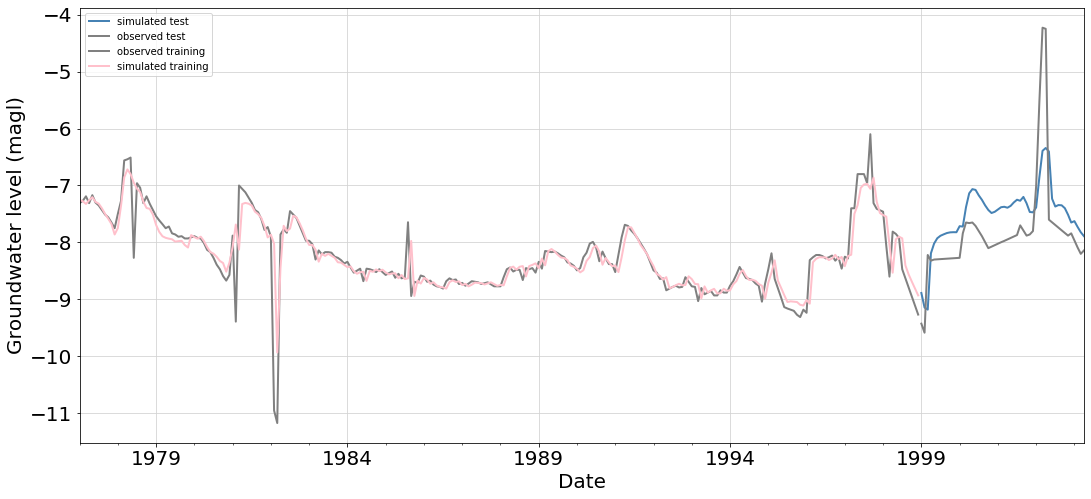

In [65]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))
print(round(stdv_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [66]:
y_gru = out_df['simulated test']

### FFNN

In [67]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(52, 6)

    #running function
    gwl = -1.77741521
    test_forecast = X_test
    steps_ahead = 52
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(264, 6)
Train on 264 samples, validate on 52 samples
Epoch 1/1000
 96/264 [=========>....................] - ETA: 3s - loss: 0.6261 - mean_squared_error: 0.6261
Epoch 00001: val_loss improved from inf to 1.91182, saving model to model.h5
264/264 [==============================] - 8s 28ms/sample - loss: 0.7593 - mean_squared_error: 0.7593 - val_loss: 1.9118 - val_mean_squared_error: 1.9118
Epoch 2/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6808 - mean_squared_error: 0.6808
Epoch 00002: val_loss improved from 1.91182 to 1.76950, saving model to model.h5
264/264 [==============================] - 0s 284us/sample - loss: 0.6227 - mean_squared_error: 0.6227 - val_loss: 1.7695 - val_mean_squared_error: 1.7695
Epoch 3/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.6409 - mean_squared_error: 0.6409
Epoch 00003: val_loss improved from 1.76950 to 1.65193, saving model to model.h5
264/264 [==============================] - 0s 309us/sample 

Epoch 25/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.4745 - mean_squared_error: 0.4745
Epoch 00025: val_loss improved from 0.88107 to 0.87727, saving model to model.h5
264/264 [==============================] - 0s 269us/sample - loss: 0.2239 - mean_squared_error: 0.2239 - val_loss: 0.8773 - val_mean_squared_error: 0.8773
Epoch 26/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3531 - mean_squared_error: 0.3531
Epoch 00026: val_loss improved from 0.87727 to 0.87665, saving model to model.h5
264/264 [==============================] - 0s 255us/sample - loss: 0.2158 - mean_squared_error: 0.2158 - val_loss: 0.8767 - val_mean_squared_error: 0.8767
Epoch 27/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1417 - mean_squared_error: 0.1417
Epoch 00027: val_loss improved from 0.87665 to 0.86871, saving model to model.h5
264/264 [==============================] - 0s 302us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - val_loss: 0.868

 96/264 [=========>....................] - ETA: 0s - loss: 0.1361 - mean_squared_error: 0.1361
Epoch 00074: val_loss did not improve from 0.79336
264/264 [==============================] - 0s 135us/sample - loss: 0.2021 - mean_squared_error: 0.2021 - val_loss: 0.7984 - val_mean_squared_error: 0.7984
Epoch 75/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3798 - mean_squared_error: 0.3798
Epoch 00075: val_loss did not improve from 0.79336
264/264 [==============================] - 0s 107us/sample - loss: 0.1983 - mean_squared_error: 0.1983 - val_loss: 0.8035 - val_mean_squared_error: 0.8035
Epoch 76/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 00076: val_loss did not improve from 0.79336
264/264 [==============================] - 0s 113us/sample - loss: 0.1983 - mean_squared_error: 0.1983 - val_loss: 0.8034 - val_mean_squared_error: 0.8034
Epoch 77/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 100/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0891 - mean_squared_error: 0.0891
Epoch 00100: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 161us/sample - loss: 0.2127 - mean_squared_error: 0.2127 - val_loss: 0.7966 - val_mean_squared_error: 0.7966
Epoch 101/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00101: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 441us/sample - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.7963 - val_mean_squared_error: 0.7963
Epoch 102/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1757 - mean_squared_error: 0.1757
Epoch 00102: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 310us/sample - loss: 0.2031 - mean_squared_error: 0.2031 - val_loss: 0.7989 - val_mean_squared_error: 0.7989
Epoch 103/1000
 96/264 [=========>..................

Epoch 126/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1714 - mean_squared_error: 0.1714
Epoch 00126: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 120us/sample - loss: 0.2127 - mean_squared_error: 0.2127 - val_loss: 0.8148 - val_mean_squared_error: 0.8148
Epoch 127/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1677 - mean_squared_error: 0.1677
Epoch 00127: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 130us/sample - loss: 0.1862 - mean_squared_error: 0.1862 - val_loss: 0.8079 - val_mean_squared_error: 0.8079
Epoch 128/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 00128: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 104us/sample - loss: 0.1966 - mean_squared_error: 0.1966 - val_loss: 0.8100 - val_mean_squared_error: 0.8100
Epoch 129/1000
 96/264 [=========>..................

Epoch 152/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2661 - mean_squared_error: 0.2661
Epoch 00152: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 160us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 0.8322 - val_mean_squared_error: 0.8322
Epoch 153/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3195 - mean_squared_error: 0.3195
Epoch 00153: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 200us/sample - loss: 0.1923 - mean_squared_error: 0.1923 - val_loss: 0.8342 - val_mean_squared_error: 0.8342
Epoch 154/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0885 - mean_squared_error: 0.0885
Epoch 00154: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 162us/sample - loss: 0.1890 - mean_squared_error: 0.1890 - val_loss: 0.8340 - val_mean_squared_error: 0.8340
Epoch 155/1000
 96/264 [=========>..................

Epoch 178/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1449 - mean_squared_error: 0.1449
Epoch 00178: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 157us/sample - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.8532 - val_mean_squared_error: 0.8532
Epoch 179/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 00179: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 131us/sample - loss: 0.1918 - mean_squared_error: 0.1918 - val_loss: 0.8634 - val_mean_squared_error: 0.8634
Epoch 180/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2820 - mean_squared_error: 0.2820
Epoch 00180: val_loss did not improve from 0.78497
264/264 [==============================] - 0s 120us/sample - loss: 0.1942 - mean_squared_error: 0.1942 - val_loss: 0.8621 - val_mean_squared_error: 0.8621
Epoch 181/1000
 96/264 [=========>..................

Epoch 15/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0891 - mean_squared_error: 0.0891
Epoch 00015: val_loss did not improve from 0.86790
264/264 [==============================] - 0s 90us/sample - loss: 0.1961 - mean_squared_error: 0.1961 - val_loss: 0.8711 - val_mean_squared_error: 0.8711
Epoch 16/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3760 - mean_squared_error: 0.3760
Epoch 00016: val_loss did not improve from 0.86790
264/264 [==============================] - 0s 84us/sample - loss: 0.1986 - mean_squared_error: 0.1986 - val_loss: 0.8820 - val_mean_squared_error: 0.8820
Epoch 17/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1695 - mean_squared_error: 0.1695
Epoch 00017: val_loss did not improve from 0.86790
264/264 [==============================] - 0s 87us/sample - loss: 0.1974 - mean_squared_error: 0.1974 - val_loss: 0.8860 - val_mean_squared_error: 0.8860
Epoch 18/1000
 96/264 [=========>....................] - E

Epoch 41/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00041: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 91us/sample - loss: 0.2015 - mean_squared_error: 0.2015 - val_loss: 0.8717 - val_mean_squared_error: 0.8717
Epoch 42/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2327 - mean_squared_error: 0.2327
Epoch 00042: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 89us/sample - loss: 0.1974 - mean_squared_error: 0.1974 - val_loss: 0.8653 - val_mean_squared_error: 0.8653
Epoch 43/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0736 - mean_squared_error: 0.0736
Epoch 00043: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 90us/sample - loss: 0.1883 - mean_squared_error: 0.1883 - val_loss: 0.8764 - val_mean_squared_error: 0.8764
Epoch 44/1000
 96/264 [=========>....................] - E

 96/264 [=========>....................] - ETA: 0s - loss: 0.1097 - mean_squared_error: 0.1097
Epoch 00093: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 167us/sample - loss: 0.1880 - mean_squared_error: 0.1880 - val_loss: 0.8939 - val_mean_squared_error: 0.8939
Epoch 94/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2087 - mean_squared_error: 0.2087
Epoch 00094: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 165us/sample - loss: 0.1831 - mean_squared_error: 0.1831 - val_loss: 0.8844 - val_mean_squared_error: 0.8844
Epoch 95/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2291 - mean_squared_error: 0.2291
Epoch 00095: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 153us/sample - loss: 0.1849 - mean_squared_error: 0.1849 - val_loss: 0.8994 - val_mean_squared_error: 0.8994
Epoch 96/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 119/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2811 - mean_squared_error: 0.2811
Epoch 00119: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 108us/sample - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 0.9125 - val_mean_squared_error: 0.9125
Epoch 120/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 00120: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 100us/sample - loss: 0.1871 - mean_squared_error: 0.1871 - val_loss: 0.9373 - val_mean_squared_error: 0.9373
Epoch 121/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1314 - mean_squared_error: 0.1314
Epoch 00121: val_loss did not improve from 0.85511
264/264 [==============================] - 0s 102us/sample - loss: 0.1794 - mean_squared_error: 0.1794 - val_loss: 0.9445 - val_mean_squared_error: 0.9445
Epoch 122/1000
 96/264 [=========>..................

 96/264 [=========>....................] - ETA: 0s - loss: 0.2272 - mean_squared_error: 0.2272
Epoch 00046: val_loss did not improve from 0.85180
264/264 [==============================] - 0s 110us/sample - loss: 0.1882 - mean_squared_error: 0.1882 - val_loss: 0.9833 - val_mean_squared_error: 0.9833
Epoch 47/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2723 - mean_squared_error: 0.2723
Epoch 00047: val_loss did not improve from 0.85180
264/264 [==============================] - 0s 104us/sample - loss: 0.1839 - mean_squared_error: 0.1839 - val_loss: 0.9213 - val_mean_squared_error: 0.9213
Epoch 48/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 00048: val_loss did not improve from 0.85180
264/264 [==============================] - 0s 93us/sample - loss: 0.1907 - mean_squared_error: 0.1907 - val_loss: 0.9230 - val_mean_squared_error: 0.9230
Epoch 49/1000
 96/264 [=========>....................] - ETA: 0s - los

 96/264 [=========>....................] - ETA: 0s - loss: 0.3128 - mean_squared_error: 0.3128
Epoch 00098: val_loss did not improve from 0.85180
264/264 [==============================] - 0s 115us/sample - loss: 0.1779 - mean_squared_error: 0.1779 - val_loss: 1.0266 - val_mean_squared_error: 1.0266
Epoch 99/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 00099: val_loss did not improve from 0.85180
264/264 [==============================] - 0s 146us/sample - loss: 0.1780 - mean_squared_error: 0.1780 - val_loss: 1.0335 - val_mean_squared_error: 1.0335
Epoch 100/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2384 - mean_squared_error: 0.2384
Epoch 00100: val_loss did not improve from 0.85180
264/264 [==============================] - 0s 123us/sample - loss: 0.1669 - mean_squared_error: 0.1669 - val_loss: 1.0494 - val_mean_squared_error: 1.0494
Epoch 101/1000
 96/264 [=========>....................] - ETA: 0s - 

Epoch 17/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1124 - mean_squared_error: 0.1124
Epoch 00017: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 103us/sample - loss: 0.1889 - mean_squared_error: 0.1889 - val_loss: 1.0852 - val_mean_squared_error: 1.0852
Epoch 18/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3197 - mean_squared_error: 0.3197
Epoch 00018: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 100us/sample - loss: 0.1865 - mean_squared_error: 0.1865 - val_loss: 1.0811 - val_mean_squared_error: 1.0811
Epoch 19/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3073 - mean_squared_error: 0.3073
Epoch 00019: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 134us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 1.0058 - val_mean_squared_error: 1.0058
Epoch 20/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 00043: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 99us/sample - loss: 0.1737 - mean_squared_error: 0.1737 - val_loss: 0.9883 - val_mean_squared_error: 0.9883
Epoch 44/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 00044: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 99us/sample - loss: 0.1965 - mean_squared_error: 0.1965 - val_loss: 1.0258 - val_mean_squared_error: 1.0258
Epoch 45/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1531 - mean_squared_error: 0.1531
Epoch 00045: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 108us/sample - loss: 0.1841 - mean_squared_error: 0.1841 - val_loss: 1.1394 - val_mean_squared_error: 1.1394
Epoch 46/1000
 96/264 [=========>....................] - ETA: 0s - loss

 96/264 [=========>....................] - ETA: 0s - loss: 0.3600 - mean_squared_error: 0.3600
Epoch 00095: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 108us/sample - loss: 0.1807 - mean_squared_error: 0.1807 - val_loss: 1.0337 - val_mean_squared_error: 1.0337
Epoch 96/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3143 - mean_squared_error: 0.3143
Epoch 00096: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 107us/sample - loss: 0.1774 - mean_squared_error: 0.1774 - val_loss: 1.0328 - val_mean_squared_error: 1.0328
Epoch 97/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1255 - mean_squared_error: 0.1255
Epoch 00097: val_loss did not improve from 0.93808
264/264 [==============================] - 0s 106us/sample - loss: 0.1857 - mean_squared_error: 0.1857 - val_loss: 0.9824 - val_mean_squared_error: 0.9824
Epoch 98/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 13/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2715 - mean_squared_error: 0.2715
Epoch 00013: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 122us/sample - loss: 0.1987 - mean_squared_error: 0.1987 - val_loss: 1.0555 - val_mean_squared_error: 1.0555
Epoch 14/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1693 - mean_squared_error: 0.1693
Epoch 00014: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 182us/sample - loss: 0.1931 - mean_squared_error: 0.1931 - val_loss: 1.0062 - val_mean_squared_error: 1.0062
Epoch 15/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2466 - mean_squared_error: 0.2466
Epoch 00015: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 161us/sample - loss: 0.1785 - mean_squared_error: 0.1785 - val_loss: 0.9795 - val_mean_squared_error: 0.9795
Epoch 16/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.2935 - mean_squared_error: 0.2935
Epoch 00039: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 135us/sample - loss: 0.1744 - mean_squared_error: 0.1744 - val_loss: 1.0906 - val_mean_squared_error: 1.0906
Epoch 40/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1407 - mean_squared_error: 0.1407
Epoch 00040: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 141us/sample - loss: 0.1958 - mean_squared_error: 0.1958 - val_loss: 1.0435 - val_mean_squared_error: 1.0435
Epoch 41/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 00041: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 137us/sample - loss: 0.1814 - mean_squared_error: 0.1814 - val_loss: 1.0207 - val_mean_squared_error: 1.0207
Epoch 42/1000
 96/264 [=========>....................] - ETA: 0s - lo

 96/264 [=========>....................] - ETA: 0s - loss: 0.0916 - mean_squared_error: 0.0916
Epoch 00091: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 152us/sample - loss: 0.1712 - mean_squared_error: 0.1712 - val_loss: 1.0217 - val_mean_squared_error: 1.0217
Epoch 92/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1982 - mean_squared_error: 0.1982
Epoch 00092: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 156us/sample - loss: 0.1695 - mean_squared_error: 0.1695 - val_loss: 1.2047 - val_mean_squared_error: 1.2047
Epoch 93/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 00093: val_loss did not improve from 0.89401
264/264 [==============================] - 0s 153us/sample - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 1.0021 - val_mean_squared_error: 1.0021
Epoch 94/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 14/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2973 - mean_squared_error: 0.2973
Epoch 00014: val_loss improved from 1.14791 to 1.10671, saving model to model.h5
264/264 [==============================] - 0s 686us/sample - loss: 0.2123 - mean_squared_error: 0.2123 - val_loss: 1.1067 - val_mean_squared_error: 1.1067
Epoch 15/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0878 - mean_squared_error: 0.0878
Epoch 00015: val_loss did not improve from 1.10671
264/264 [==============================] - 0s 152us/sample - loss: 0.1772 - mean_squared_error: 0.1772 - val_loss: 1.1575 - val_mean_squared_error: 1.1575
Epoch 16/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00016: val_loss improved from 1.10671 to 1.05155, saving model to model.h5
264/264 [==============================] - 0s 496us/sample - loss: 0.1767 - mean_squared_error: 0.1767 - val_loss: 1.0516 - val_mean_squared_error: 1.

Epoch 40/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 00040: val_loss did not improve from 0.96203
264/264 [==============================] - 0s 197us/sample - loss: 0.1828 - mean_squared_error: 0.1828 - val_loss: 1.0478 - val_mean_squared_error: 1.0478
Epoch 41/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1382 - mean_squared_error: 0.1382
Epoch 00041: val_loss did not improve from 0.96203
264/264 [==============================] - 0s 150us/sample - loss: 0.1675 - mean_squared_error: 0.1675 - val_loss: 1.2019 - val_mean_squared_error: 1.2019
Epoch 42/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1358 - mean_squared_error: 0.1358
Epoch 00042: val_loss did not improve from 0.96203
264/264 [==============================] - 0s 153us/sample - loss: 0.1732 - mean_squared_error: 0.1732 - val_loss: 1.0169 - val_mean_squared_error: 1.0169
Epoch 43/1000
 96/264 [=========>....................] 

Epoch 66/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1279 - mean_squared_error: 0.1279
Epoch 00066: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 209us/sample - loss: 0.1887 - mean_squared_error: 0.1887 - val_loss: 1.1198 - val_mean_squared_error: 1.1198
Epoch 67/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 00067: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 157us/sample - loss: 0.1875 - mean_squared_error: 0.1875 - val_loss: 1.1589 - val_mean_squared_error: 1.1589
Epoch 68/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1220 - mean_squared_error: 0.1220
Epoch 00068: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 149us/sample - loss: 0.1729 - mean_squared_error: 0.1729 - val_loss: 1.1955 - val_mean_squared_error: 1.1955
Epoch 69/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.2435 - mean_squared_error: 0.2435
Epoch 00092: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 145us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 1.0417 - val_mean_squared_error: 1.0417
Epoch 93/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0756 - mean_squared_error: 0.0756
Epoch 00093: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 143us/sample - loss: 0.1738 - mean_squared_error: 0.1738 - val_loss: 1.2188 - val_mean_squared_error: 1.2188
Epoch 94/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2341 - mean_squared_error: 0.2341
Epoch 00094: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 146us/sample - loss: 0.1950 - mean_squared_error: 0.1950 - val_loss: 1.0547 - val_mean_squared_error: 1.0547
Epoch 95/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 118/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2134 - mean_squared_error: 0.2134
Epoch 00118: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 157us/sample - loss: 0.1714 - mean_squared_error: 0.1714 - val_loss: 1.0662 - val_mean_squared_error: 1.0662
Epoch 119/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2434 - mean_squared_error: 0.2434
Epoch 00119: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 184us/sample - loss: 0.1755 - mean_squared_error: 0.1755 - val_loss: 1.0758 - val_mean_squared_error: 1.0758
Epoch 120/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1547 - mean_squared_error: 0.1547
Epoch 00120: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 194us/sample - loss: 0.1819 - mean_squared_error: 0.1819 - val_loss: 1.3178 - val_mean_squared_error: 1.3178
Epoch 121/1000
 96/264 [=========>..................

Epoch 144/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 00144: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 154us/sample - loss: 0.1766 - mean_squared_error: 0.1766 - val_loss: 1.1709 - val_mean_squared_error: 1.1709
Epoch 145/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0615 - mean_squared_error: 0.0615
Epoch 00145: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 162us/sample - loss: 0.1571 - mean_squared_error: 0.1571 - val_loss: 1.2118 - val_mean_squared_error: 1.2118
Epoch 146/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0698 - mean_squared_error: 0.0698
Epoch 00146: val_loss did not improve from 0.93138
264/264 [==============================] - 0s 153us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 1.0912 - val_mean_squared_error: 1.0912
Epoch 147/1000
 96/264 [=========>..................

Epoch 11/1000
192/264 [====================>.........] - ETA: 0s - loss: 0.2178 - mean_squared_error: 0.2178
Epoch 00011: val_loss did not improve from 1.04199
264/264 [==============================] - 0s 657us/sample - loss: 0.1763 - mean_squared_error: 0.1763 - val_loss: 1.1758 - val_mean_squared_error: 1.1758
Epoch 12/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 00012: val_loss did not improve from 1.04199
264/264 [==============================] - 0s 681us/sample - loss: 0.1617 - mean_squared_error: 0.1617 - val_loss: 1.1445 - val_mean_squared_error: 1.1445
Epoch 13/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1374 - mean_squared_error: 0.1374
Epoch 00013: val_loss did not improve from 1.04199
264/264 [==============================] - 0s 351us/sample - loss: 0.2207 - mean_squared_error: 0.2207 - val_loss: 1.0895 - val_mean_squared_error: 1.0895
Epoch 14/1000
 96/264 [=========>....................] 

Epoch 37/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 00037: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 196us/sample - loss: 0.1722 - mean_squared_error: 0.1722 - val_loss: 1.2789 - val_mean_squared_error: 1.2789
Epoch 38/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 00038: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 197us/sample - loss: 0.1729 - mean_squared_error: 0.1729 - val_loss: 1.2418 - val_mean_squared_error: 1.2418
Epoch 39/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1395 - mean_squared_error: 0.1395
Epoch 00039: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 253us/sample - loss: 0.1752 - mean_squared_error: 0.1752 - val_loss: 1.2063 - val_mean_squared_error: 1.2063
Epoch 40/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 00063: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 199us/sample - loss: 0.1810 - mean_squared_error: 0.1810 - val_loss: 1.3292 - val_mean_squared_error: 1.3292
Epoch 64/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1777 - mean_squared_error: 0.1777
Epoch 00064: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 237us/sample - loss: 0.1715 - mean_squared_error: 0.1715 - val_loss: 1.4624 - val_mean_squared_error: 1.4624
Epoch 65/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1409 - mean_squared_error: 0.1409
Epoch 00065: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 234us/sample - loss: 0.1620 - mean_squared_error: 0.1620 - val_loss: 1.1757 - val_mean_squared_error: 1.1757
Epoch 66/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 115/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 00115: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 256us/sample - loss: 0.1660 - mean_squared_error: 0.1660 - val_loss: 1.2466 - val_mean_squared_error: 1.2466
Epoch 116/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1481 - mean_squared_error: 0.1481
Epoch 00116: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 245us/sample - loss: 0.1698 - mean_squared_error: 0.1698 - val_loss: 1.5672 - val_mean_squared_error: 1.5672
Epoch 117/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2088 - mean_squared_error: 0.2088
Epoch 00117: val_loss did not improve from 1.00367
264/264 [==============================] - 0s 439us/sample - loss: 0.2101 - mean_squared_error: 0.2101 - val_loss: 1.4000 - val_mean_squared_error: 1.4000
Epoch 118/1000
192/264 [====================>.......

Epoch 14/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1303 - mean_squared_error: 0.1303
Epoch 00014: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 190us/sample - loss: 0.1920 - mean_squared_error: 0.1920 - val_loss: 1.2866 - val_mean_squared_error: 1.2866
Epoch 15/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1244 - mean_squared_error: 0.1244
Epoch 00015: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 181us/sample - loss: 0.1828 - mean_squared_error: 0.1828 - val_loss: 1.0036 - val_mean_squared_error: 1.0036
Epoch 16/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1833 - mean_squared_error: 0.1833
Epoch 00016: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 247us/sample - loss: 0.1820 - mean_squared_error: 0.1820 - val_loss: 1.3962 - val_mean_squared_error: 1.3962
Epoch 17/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.2478 - mean_squared_error: 0.2478
Epoch 00040: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 176us/sample - loss: 0.1646 - mean_squared_error: 0.1646 - val_loss: 1.2202 - val_mean_squared_error: 1.2202
Epoch 41/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3176 - mean_squared_error: 0.3176
Epoch 00041: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 196us/sample - loss: 0.1689 - mean_squared_error: 0.1689 - val_loss: 1.2734 - val_mean_squared_error: 1.2734
Epoch 42/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 00042: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 178us/sample - loss: 0.1789 - mean_squared_error: 0.1789 - val_loss: 1.3997 - val_mean_squared_error: 1.3997
Epoch 43/1000
 96/264 [=========>....................] - ETA: 0s - lo

 96/264 [=========>....................] - ETA: 0s - loss: 0.2430 - mean_squared_error: 0.2430
Epoch 00092: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 176us/sample - loss: 0.1745 - mean_squared_error: 0.1745 - val_loss: 1.1902 - val_mean_squared_error: 1.1902
Epoch 93/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2198 - mean_squared_error: 0.2198
Epoch 00093: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 169us/sample - loss: 0.1704 - mean_squared_error: 0.1704 - val_loss: 1.4387 - val_mean_squared_error: 1.4387
Epoch 94/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2577 - mean_squared_error: 0.2577
Epoch 00094: val_loss did not improve from 0.97109
264/264 [==============================] - 0s 202us/sample - loss: 0.1709 - mean_squared_error: 0.1709 - val_loss: 1.2952 - val_mean_squared_error: 1.2952
Epoch 95/1000
 96/264 [=========>....................] - ETA: 0s - lo

Epoch 5/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1937 - mean_squared_error: 0.1937
Epoch 00005: val_loss improved from 1.19983 to 1.13975, saving model to model.h5
264/264 [==============================] - 0s 658us/sample - loss: 0.2028 - mean_squared_error: 0.2028 - val_loss: 1.1397 - val_mean_squared_error: 1.1397
Epoch 6/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1522 - mean_squared_error: 0.1522
Epoch 00006: val_loss did not improve from 1.13975
264/264 [==============================] - 0s 180us/sample - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 1.6868 - val_mean_squared_error: 1.6868
Epoch 7/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1846 - mean_squared_error: 0.1846
Epoch 00007: val_loss did not improve from 1.13975
264/264 [==============================] - 0s 186us/sample - loss: 0.1935 - mean_squared_error: 0.1935 - val_loss: 1.4042 - val_mean_squared_error: 1.4042
Epoch 8/1000
 96/264 [======

Epoch 31/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1640 - mean_squared_error: 0.1640
Epoch 00031: val_loss did not improve from 1.06526
264/264 [==============================] - 0s 219us/sample - loss: 0.1793 - mean_squared_error: 0.1793 - val_loss: 1.3723 - val_mean_squared_error: 1.3723
Epoch 32/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1433 - mean_squared_error: 0.1433
Epoch 00032: val_loss did not improve from 1.06526
264/264 [==============================] - 0s 354us/sample - loss: 0.1600 - mean_squared_error: 0.1600 - val_loss: 1.1419 - val_mean_squared_error: 1.1419
Epoch 33/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2470 - mean_squared_error: 0.2470
Epoch 00033: val_loss improved from 1.06526 to 1.06296, saving model to model.h5
264/264 [==============================] - 0s 836us/sample - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 1.0630 - val_mean_squared_error: 1.0630
Epoch 34/1000
 96/264 [==

Epoch 57/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3250 - mean_squared_error: 0.3250
Epoch 00057: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 252us/sample - loss: 0.1742 - mean_squared_error: 0.1742 - val_loss: 1.3608 - val_mean_squared_error: 1.3608
Epoch 58/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1587 - mean_squared_error: 0.1587
Epoch 00058: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 212us/sample - loss: 0.1974 - mean_squared_error: 0.1974 - val_loss: 1.3564 - val_mean_squared_error: 1.3564
Epoch 59/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2374 - mean_squared_error: 0.2374
Epoch 00059: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 199us/sample - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 1.1766 - val_mean_squared_error: 1.1766
Epoch 60/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.1547 - mean_squared_error: 0.1547
Epoch 00083: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 199us/sample - loss: 0.1696 - mean_squared_error: 0.1696 - val_loss: 1.3108 - val_mean_squared_error: 1.3108
Epoch 84/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1538 - mean_squared_error: 0.1538
Epoch 00084: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 184us/sample - loss: 0.1818 - mean_squared_error: 0.1818 - val_loss: 1.8884 - val_mean_squared_error: 1.8884
Epoch 85/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1271 - mean_squared_error: 0.1271
Epoch 00085: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 187us/sample - loss: 0.1651 - mean_squared_error: 0.1651 - val_loss: 1.3082 - val_mean_squared_error: 1.3082
Epoch 86/1000
 96/264 [=========>....................] - ETA: 0s - lo

 96/264 [=========>....................] - ETA: 0s - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 00109: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 177us/sample - loss: 0.1606 - mean_squared_error: 0.1606 - val_loss: 1.4452 - val_mean_squared_error: 1.4452
Epoch 110/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 00110: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 199us/sample - loss: 0.1745 - mean_squared_error: 0.1745 - val_loss: 1.2259 - val_mean_squared_error: 1.2259
Epoch 111/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1785 - mean_squared_error: 0.1785
Epoch 00111: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 185us/sample - loss: 0.1733 - mean_squared_error: 0.1733 - val_loss: 1.2807 - val_mean_squared_error: 1.2807
Epoch 112/1000
 96/264 [=========>....................] - ETA: 0s -

Epoch 135/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 00135: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 180us/sample - loss: 0.1795 - mean_squared_error: 0.1795 - val_loss: 1.7527 - val_mean_squared_error: 1.7527
Epoch 136/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00136: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 187us/sample - loss: 0.1538 - mean_squared_error: 0.1538 - val_loss: 1.4407 - val_mean_squared_error: 1.4407
Epoch 137/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3335 - mean_squared_error: 0.3335
Epoch 00137: val_loss did not improve from 1.00853
264/264 [==============================] - 0s 234us/sample - loss: 0.1870 - mean_squared_error: 0.1870 - val_loss: 1.6718 - val_mean_squared_error: 1.6718
Epoch 138/1000
 96/264 [=========>..................

Epoch 18/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3100 - mean_squared_error: 0.3100
Epoch 00018: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 259us/sample - loss: 0.1667 - mean_squared_error: 0.1667 - val_loss: 1.2295 - val_mean_squared_error: 1.2295
Epoch 19/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0786 - mean_squared_error: 0.0786
Epoch 00019: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 290us/sample - loss: 0.1691 - mean_squared_error: 0.1691 - val_loss: 1.5676 - val_mean_squared_error: 1.5676
Epoch 20/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 00020: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 259us/sample - loss: 0.1813 - mean_squared_error: 0.1813 - val_loss: 1.6930 - val_mean_squared_error: 1.6930
Epoch 21/1000
 96/264 [=========>....................] 

 96/264 [=========>....................] - ETA: 0s - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 00044: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 384us/sample - loss: 0.2110 - mean_squared_error: 0.2110 - val_loss: 1.1335 - val_mean_squared_error: 1.1335
Epoch 45/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.2845 - mean_squared_error: 0.2845
Epoch 00045: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 311us/sample - loss: 0.1748 - mean_squared_error: 0.1748 - val_loss: 1.4438 - val_mean_squared_error: 1.4438
Epoch 46/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.1679 - mean_squared_error: 0.1679
Epoch 00046: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 274us/sample - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 1.4666 - val_mean_squared_error: 1.4666
Epoch 47/1000
 96/264 [=========>....................] - ETA: 0s - lo

 96/264 [=========>....................] - ETA: 0s - loss: 0.1479 - mean_squared_error: 0.1479
Epoch 00096: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 248us/sample - loss: 0.1919 - mean_squared_error: 0.1919 - val_loss: 1.0898 - val_mean_squared_error: 1.0898
Epoch 97/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.3311 - mean_squared_error: 0.3311
Epoch 00097: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 226us/sample - loss: 0.2013 - mean_squared_error: 0.2013 - val_loss: 1.2170 - val_mean_squared_error: 1.2170
Epoch 98/1000
 96/264 [=========>....................] - ETA: 0s - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 00098: val_loss did not improve from 0.98222
264/264 [==============================] - 0s 229us/sample - loss: 0.1601 - mean_squared_error: 0.1601 - val_loss: 1.3258 - val_mean_squared_error: 1.3258
Epoch 99/1000
 96/264 [=========>....................] - ETA: 0s - lo

In [68]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   1.581    1.257 -0.004   1.108
1   Iteration_2   1.861    1.364 -0.182   1.201
2   Iteration_3   2.371    1.540 -0.505   1.381
3   Iteration_4   2.912    1.706 -0.849   1.551
4   Iteration_5   2.964    1.722 -0.882   1.552
5   Iteration_6   2.335    1.528 -0.483   1.349
6   Iteration_7   4.200    2.049 -1.667   1.847
7   Iteration_8   3.886    1.971 -1.467   1.775
8   Iteration_9   4.032    2.008 -1.560   1.808
9  Iteration_10   3.718    1.928 -1.361   1.775

In [69]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values
train_iterations

Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0      1.344692    1.260832    1.270426    1.312490    1.260053    1.040810   
1      1.330334    1.239455    1.177541    1.335182    1.289060    1.067556   
2      1.359020    1.269601    1.256620    1.305095    1.289239    1.097783   
3      1.447367    1.334421    1.341182    1.381526    1.360340    1.151169   
4      1.533575    1.416723    1.432650    1.480982    1.459142    1.236827   
..          ...         ...         ...         ...         ...         ...   
259   -0.298507   -0.385687   -0.291393   -0.306127   -0.334002   -0.277128   
260   -0.542055   -0.633259   -0.497517   -0.535063   -0.561292   -0.478882   
261   -0.763135   -0.876313   -0.727091   -0.789299   -0.833856   -0.721348   
262   -0.982268   -1.158012   -0.981236   -1.070956   -1.110328   -0.966528   
263   -1.246820   -1.460838   -1.251335   -1.371006   -1.414093   -1.234637   

     Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0      1.365566    1.199303    1.118006  1.241353  0.099968  1.341321   
1      1.408618    1.241054    1.148139  1.248549  0.099710  1.348259   
2      1.355898    1.325760    1.195550  1.272730  0.078406  1.351136   
3      1.418972    1.379957    1.250780  1.340635  0.085078  1.425713   
4      1.529710    1.482472    1.346251  1.435370  0.088898  1.524268   
..          ...         ...         ...       ...       ...       ...   
259   -0.336061   -0.325708   -0.338646 -0.321473  0.030624 -0.290850   
260   -0.563702   -0.573744   -0.633279 -0.557644  0.049798 -0.507845   
261   -0.838546   -0.851784   -0.950895 -0.816918  0.070163 -0.746755   
262   -1.111991   -1.127237   -1.261289 -1.085538  0.091356 -0.994182   
263   -1.405748   -1.430321   -1.616322 -1.381236  0.116538 -1.264698   

          Min    actual  
0    1.141385  1.233686  
1    1.148839  1.290626  
2    1.194323  1.404507  
3    1.255556  1.233686  
4    1.346473  1.432977  
..        ...       ...  
259 -0.352097 -0.644853  
260 -0.607442 -0.871366  
261 -0.887081 -1.097878  
262 -1.176895 -1.324390  
263 -1.497773 -1.550903  

[264 rows x 14 columns]

In [70]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[264:316, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -1.141226   -1.375906   -1.205862   -1.384589   -1.452737   -1.376848   
1    -1.872995   -2.142390   -2.027180   -2.271040   -2.373192   -2.285230   
2    -1.857192   -2.148753   -2.052354   -2.261938   -2.337920   -2.357094   
3    -0.402250   -0.740360   -0.730573   -1.026951   -1.182265   -1.245172   
4    -0.058751   -0.271989   -0.253601   -0.547356   -0.727653   -0.825580   
5     0.140156   -0.079484   -0.116612   -0.170976   -0.343598   -0.484786   
6     0.310869    0.205433    0.262994    0.190520   -0.144980   -0.180646   
7     0.443282    0.483905    0.620104    0.610077    0.236585    0.003541   
8     0.555926    0.727624    0.953491    1.025031    0.678566    0.393046   
9     0.668316    0.964667    1.267164    1.421864    1.187872    0.813618   
10    0.760723    1.157891    1.491819    1.719875    1.622761    1.202463   
11    0.826843    1.276364    1.625112    1.903178    1.895971    1.489620   
12    1.063186    1.462136    1.833602    2.121069    2.162333    1.787902   
13    1.156878    1.502139    1.868841    2.146951    2.198767    1.865157   
14    1.646037    1.923825    2.274288    2.538304    2.585050    2.245854   
15    2.019669    2.193681    2.508506    2.775708    2.836489    2.488390   
16    2.164788    2.288287    2.570233    2.830125    2.887913    2.544379   
17    2.154062    2.243605    2.516664    2.786148    2.842563    2.498458   
18    2.002113    2.089487    2.343163    2.602867    2.648350    2.314920   
19    1.891615    1.993575    2.256503    2.520470    2.566432    2.240023   
20    1.757796    1.872500    2.148646    2.414765    2.458731    2.141445   
21    1.682639    1.832233    2.143999    2.396075    2.434570    2.127855   
22    1.659099    1.817426    2.129353    2.376870    2.426620    2.119640   
23    1.694299    1.856681    2.169339    2.418229    2.469225    2.156869   
24    1.755115    1.909068    2.217909    2.466044    2.517811    2.201397   
25    1.810516    1.957686    2.259762    2.506332    2.559172    2.239940   
26    1.821051    1.964250    2.264212    2.505559    2.561034    2.243230   
27    1.780927    1.934625    2.237573    2.477436    2.523908    2.212474   
28    1.824654    1.980615    2.280823    2.518266    2.565931    2.250641   
29    1.904993    2.045816    2.338284    2.585565    2.641587    2.316502   
30    1.959372    2.090441    2.370933    2.628914    2.689590    2.358003   
31    1.923953    2.048366    2.340074    2.594856    2.650681    2.329019   
32    1.963511    2.070351    2.351821    2.610674    2.656446    2.322459   
33    1.761244    1.847188    2.102609    2.351705    2.376919    2.050025   
34    1.479928    1.546127    1.780830    2.006787    2.006629    1.714066   
35    1.432050    1.502958    1.747185    1.977607    1.977696    1.694375   
36    1.561916    1.620056    1.859436    2.100007    2.114057    1.834735   
37    2.206742    2.221732    2.458376    2.706259    2.740904    2.374655   
38    2.647806    2.579543    2.791275    3.005041    3.020723    2.579707   
39    2.508239    2.347151    2.492743    2.653598    2.622842    2.180122   
40    2.331385    2.128087    2.212366    2.317706    2.244509    1.830979   
41    1.560713    1.443112    1.495543    1.603293    1.558041    1.301631   
42    1.413961    1.355395    1.437164    1.564961    1.548313    1.320430   
43    1.528871    1.522611    1.678227    1.858052    1.857991    1.612502   
44    1.573048    1.592725    1.787491    2.000176    2.001097    1.745085   
45    1.511425    1.536287    1.733542    1.941536    1.941357    1.690912   
46    1.291226    1.295014    1.436715    1.607671    1.603678    1.366596   
47    0.955384    0.914442    0.993916    1.115496    1.086883    0.925773   
48    0.942525    0.897825    0.981023    1.084791    1.065568    0.948244   
49    0.765002    0.728510    0.816283    0.911738    0.886148    0.815485   
50    0.638935    0.634008

In [71]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:264]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[264:316]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.153
Root mean squared error is: 0.391
Mean absolute error is: 0.213
R^2 score is:  0.815

The model performance for the test set
--------------------------------------
R^2 score is:  -0.896
Mean squared error is: 2.986
Root mean squared error is: 1.707
Mean absolute error is: 1.535
Stdv    0.123
dtype: float32


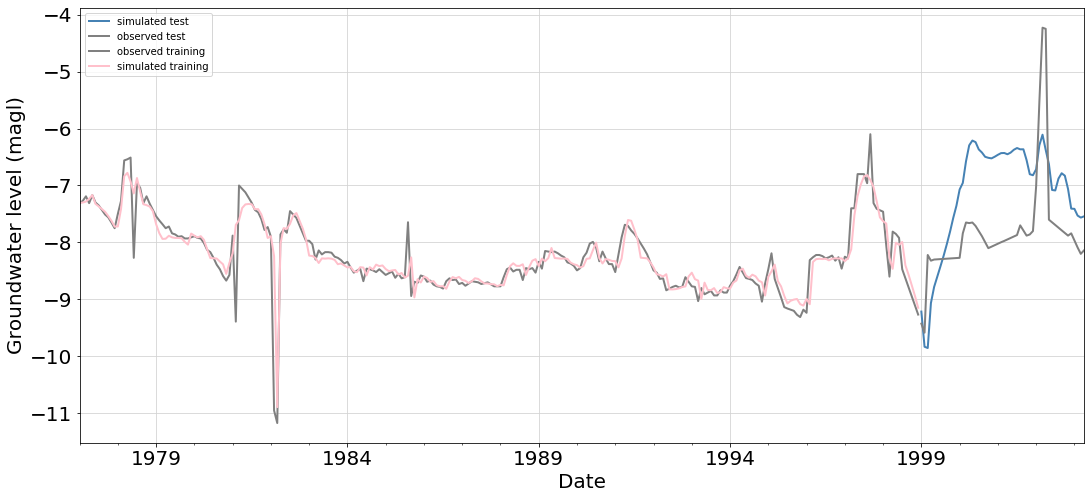

In [72]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))
print(round(stdv_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [73]:
y_ff = out_df['simulated test']

## Static Models

In [74]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0146']]

In [75]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0146'].values
y = y.reshape(-1,1)

In [76]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(264, 6) (264, 1)
(52, 6) (52, 1)


In [77]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [78]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(264, 6)
Running fold 2
(264, 6)
Running fold 3
(264, 6)
Running fold 4
(264, 6)
Running fold 5
(264, 6)
Running fold 6
(264, 6)
Running fold 7
(264, 6)
Running fold 8
(264, 6)
Running fold 9
(264, 6)
Running fold 10
(264, 6)


In [79]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   0.473    0.688  0.391   0.310
1   Iteration_2   0.556    0.746  0.284   0.410
2   Iteration_3   0.470    0.686  0.395   0.306
3   Iteration_4   0.477    0.691  0.386   0.312
4   Iteration_5   0.514    0.717  0.339   0.380
5   Iteration_6   0.523    0.723  0.327   0.388
6   Iteration_7   0.520    0.721  0.331   0.385
7   Iteration_8   0.476    0.690  0.388   0.307
8   Iteration_9   0.509    0.714  0.345   0.331
9  Iteration_10   0.505    0.711  0.350   0.322

In [80]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values

In [81]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[264:316, 6].values

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.354
Mean squared error is: 0.502
Root mean squared error is: 0.709
Mean absolute error is: 0.345


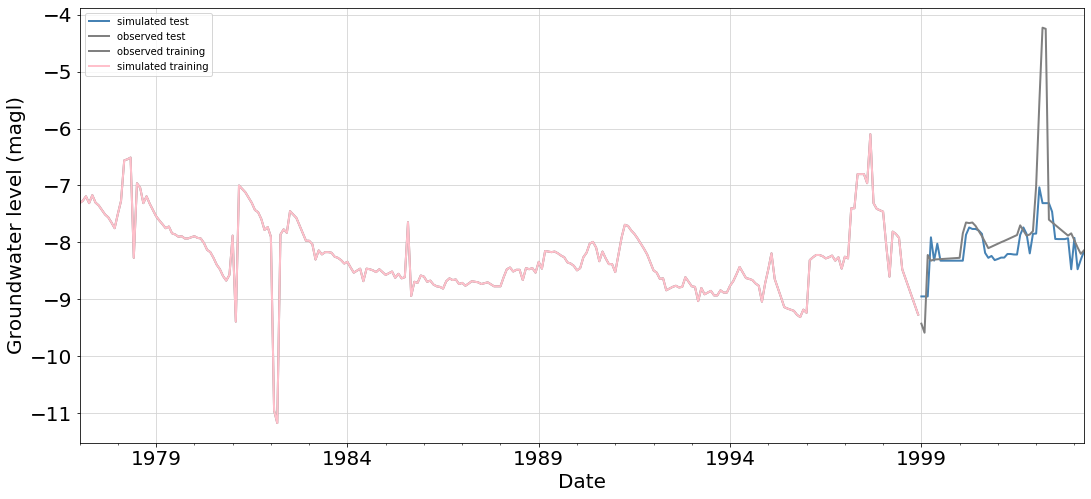

In [82]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [83]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(264, 6)
Running fold 2
(264, 6)
Running fold 3
(264, 6)
Running fold 4
(264, 6)
Running fold 5
(264, 6)
Running fold 6
(264, 6)
Running fold 7
(264, 6)
Running fold 8
(264, 6)
Running fold 9
(264, 6)
Running fold 10
(264, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [84]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1     0.45     0.671   0.422    0.319
1   Iteration_2     0.45     0.671   0.422    0.319
2   Iteration_3     0.45     0.671   0.422    0.319
3   Iteration_4     0.45     0.671   0.422    0.319
4   Iteration_5     0.45     0.671   0.422    0.319
5   Iteration_6     0.45     0.671   0.422    0.319
6   Iteration_7     0.45     0.671   0.422    0.319
7   Iteration_8     0.45     0.671   0.422    0.319
8   Iteration_9     0.45     0.671   0.422    0.319
9  Iteration_10     0.45     0.671   0.422    0.319

In [85]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values

In [86]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.121
Root mean squared error is: 0.348
Mean absolute error is: 0.154
R^2 score is:  0.702

The model performance for the test set
--------------------------------------
R^2 score is:  0.422
Mean squared error is: 0.45
Root mean squared error is: 0.671
Mean absolute error is: 0.319


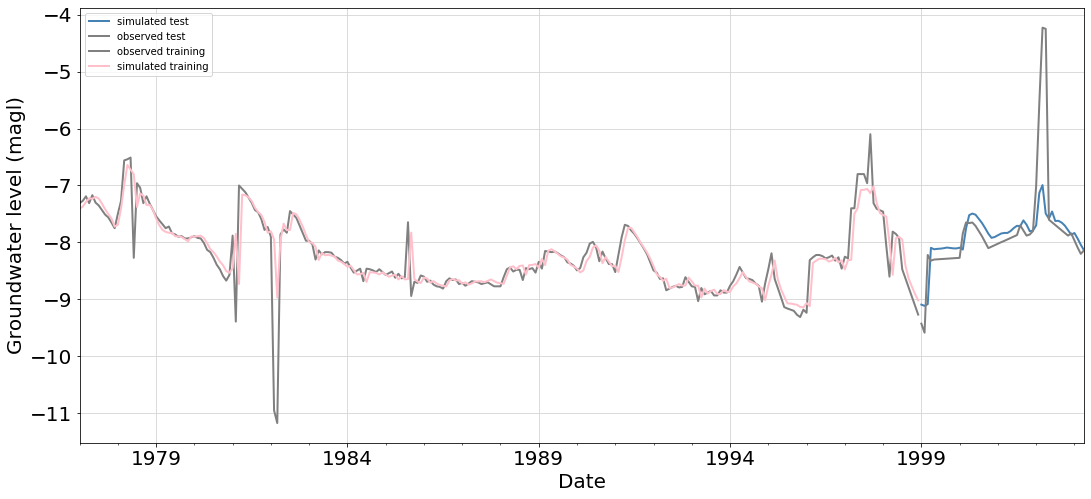

In [87]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(264, 6)
Running fold 2
(264, 6)
Running fold 3
(264, 6)
Running fold 4
(264, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(264, 6)
Running fold 6
(264, 6)
Running fold 7
(264, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 8
(264, 6)
Running fold 9
(264, 6)
Running fold 10
(264, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [89]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.401    0.633  0.484   0.322
1   Iteration_2   0.383    0.619  0.507   0.316
2   Iteration_3   0.376    0.614  0.516   0.301
3   Iteration_4   0.375    0.613  0.517   0.309
4   Iteration_5   0.386    0.621  0.503   0.315
5   Iteration_6   0.380    0.616  0.512   0.315
6   Iteration_7   0.391    0.626  0.496   0.315
7   Iteration_8   0.402    0.634  0.483   0.322
8   Iteration_9   0.392    0.626  0.496   0.311
9  Iteration_10   0.381    0.618  0.509   0.303

In [90]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values

In [91]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.013
Root mean squared error is: 0.112
Mean absolute error is: 0.078
R^2 score is:  0.969

The model performance for the test set
--------------------------------------
R^2 score is:  0.502
Mean squared error is: 0.387
Root mean squared error is: 0.622
Mean absolute error is: 0.313


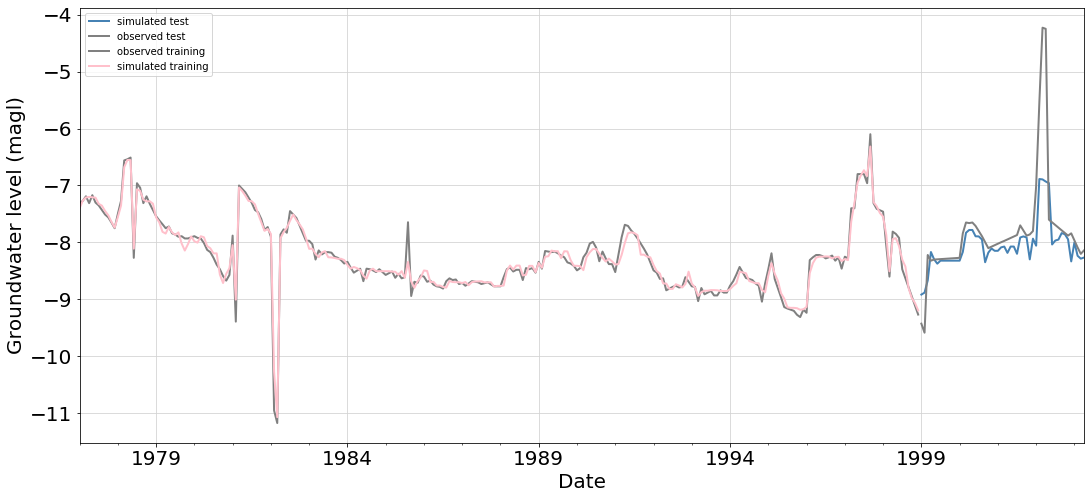

In [92]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(264, 6)
Running fold 2
(264, 6)
Running fold 3
(264, 6)
Running fold 4
(264, 6)
Running fold 5
(264, 6)
Running fold 6
(264, 6)
Running fold 7
(264, 6)
Running fold 8
(264, 6)
Running fold 9
(264, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 10
(264, 6)


In [94]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.410    0.640  0.473   0.283
1   Iteration_2   0.493    0.702  0.366   0.327
2   Iteration_3   0.441    0.664  0.433   0.326
3   Iteration_4   0.404    0.635  0.481   0.292
4   Iteration_5   0.425    0.652  0.453   0.327
5   Iteration_6   0.478    0.692  0.384   0.358
6   Iteration_7   0.450    0.671  0.421   0.323
7   Iteration_8   0.444    0.666  0.429   0.344
8   Iteration_9   0.459    0.677  0.410   0.351
9  Iteration_10   0.426    0.653  0.452   0.299

In [95]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:264, 6].values

In [96]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.013
Root mean squared error is: 0.112
Mean absolute error is: 0.078
R^2 score is:  0.969

The model performance for the test set
--------------------------------------
R^2 score is:  0.43
Mean squared error is: 0.443
Root mean squared error is: 0.665
Mean absolute error is: 0.323


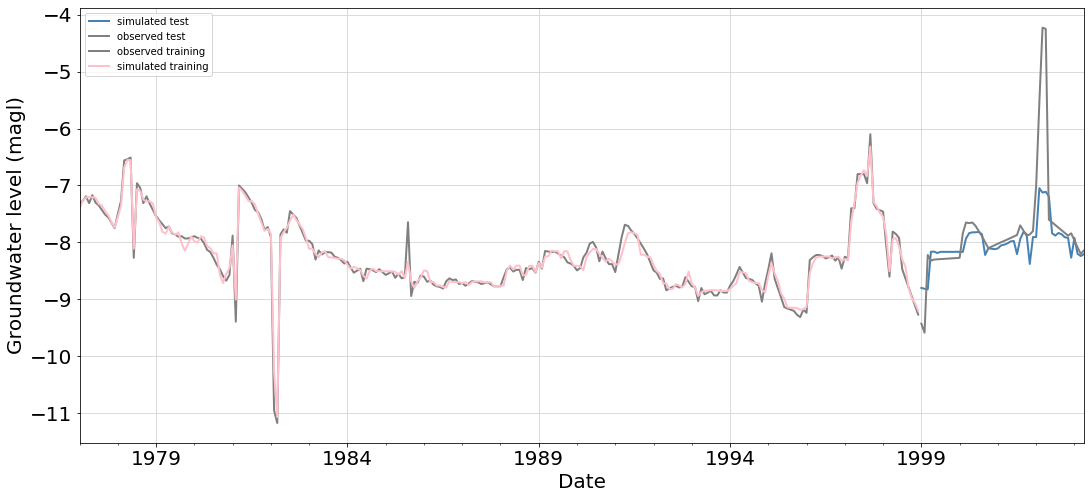

In [97]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[264:316].index)
df1['observed test']      = pima.iloc[264:316, 0].values

df2 = pd.DataFrame(pima.iloc[0:264, 0].values, columns = ['observed training'],index =pima.iloc[0:264].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [98]:
vs = pd.DataFrame(pima.iloc[264:316, 0].values, columns = ['Observed'],index =pima.iloc[264:316].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

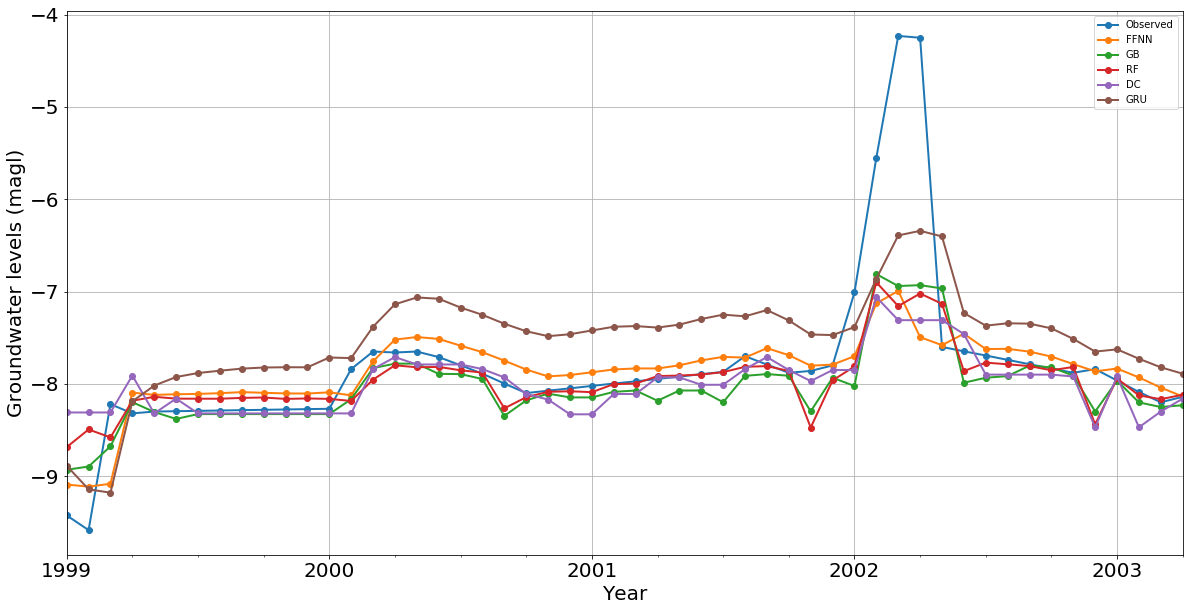

In [99]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)